# Question 2

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pickle
import missingno as msno
import scorecardpy as sc
from scipy.stats import zscore
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd

# Q2 Part 1: Binning and WoE

In [2]:
df = pickle.load(open('Q1.pkl', 'rb'))
df.loan_status = (df.loan_status == "Charged Off") | (df.loan_status == "Default")

In [15]:
train, test = sc.split_df(df,y = 'loan_status', ratio = 0.8, seed=251316935).values()

In [16]:
pickle.dump(train, open('Q2_train.pkl', 'wb'))
pickle.dump(test, open('Q2_test.pkl', 'wb'))

In [11]:
bins = sc.woebin(
    train, y = 'loan_status',
    min_perc_fine_bin=0.01,     # How many bins to cut initially into
    min_perc_coarse_bin=0.05,   # Minimum percentage per final bin
    stop_limit=0.02,            # Minimum information value 
    max_num_bin=8,              # Maximum number of bins
    method='tree'
)

[INFO] creating woe binning ...
Binning on 1024492 rows and 59 columns in 00:01:14


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scorecardpy/woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


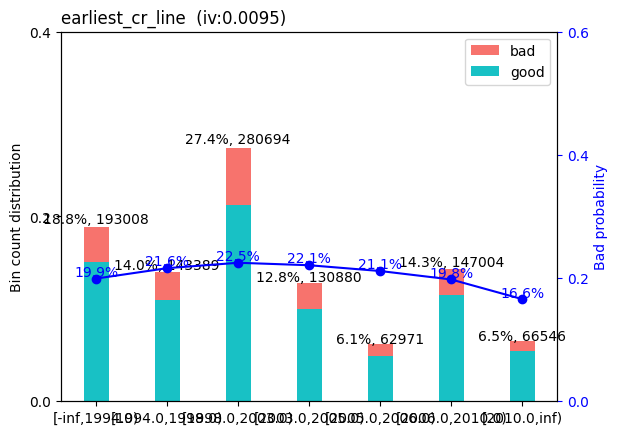

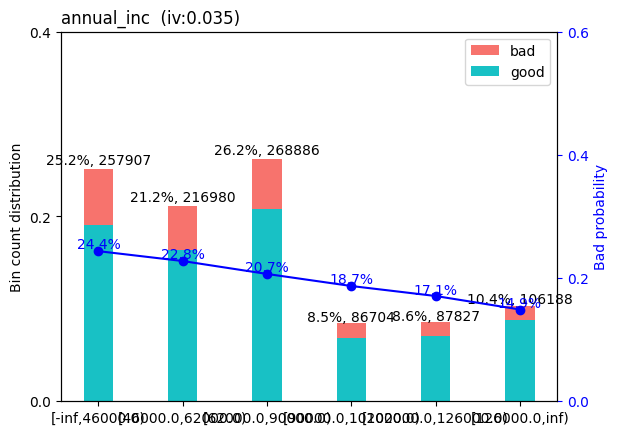

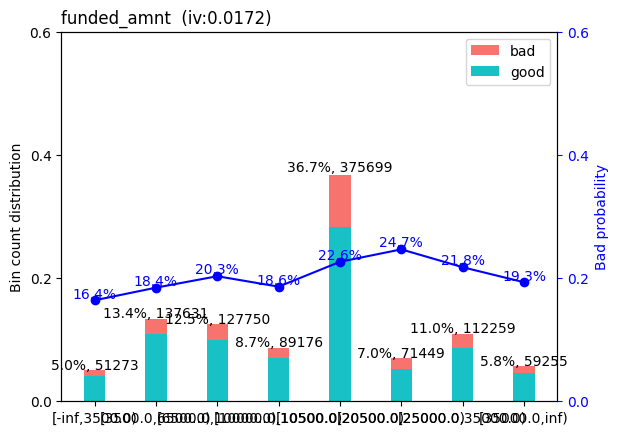

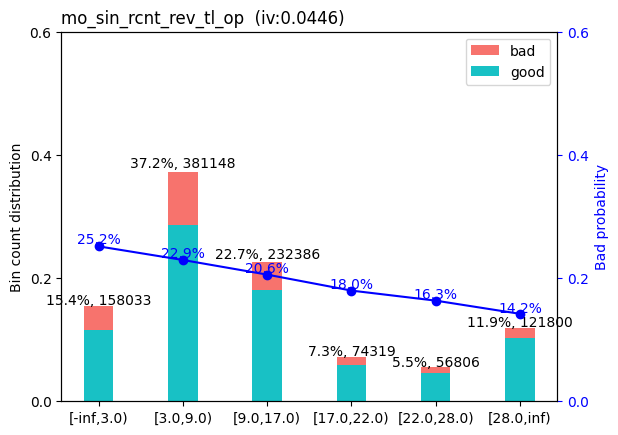

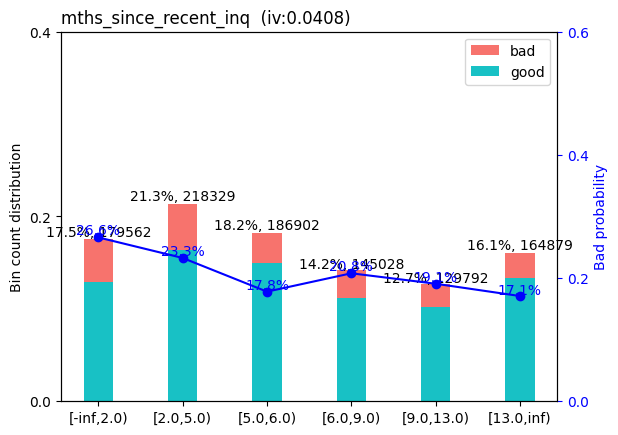

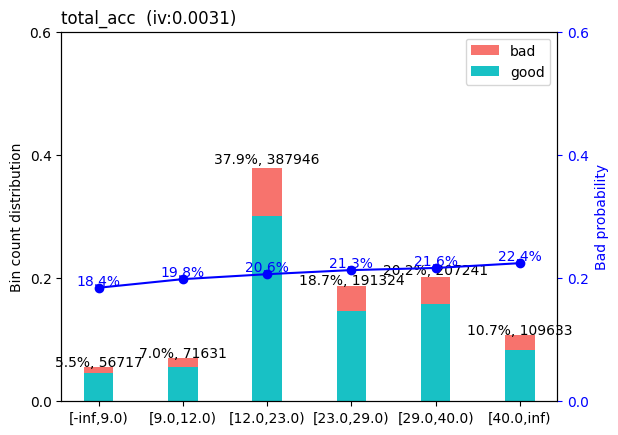

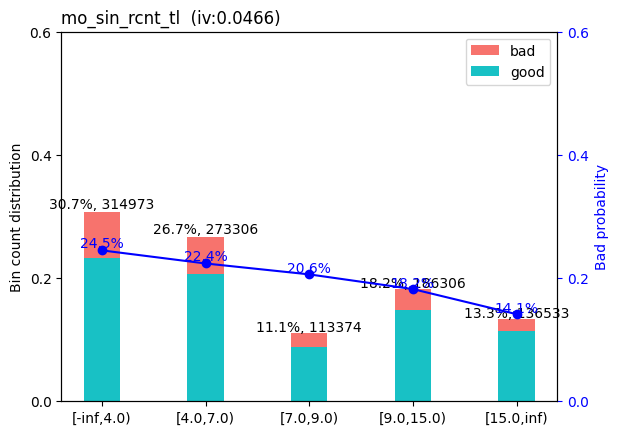

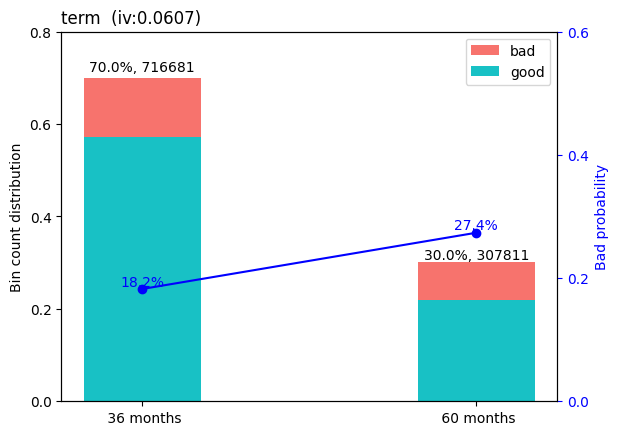

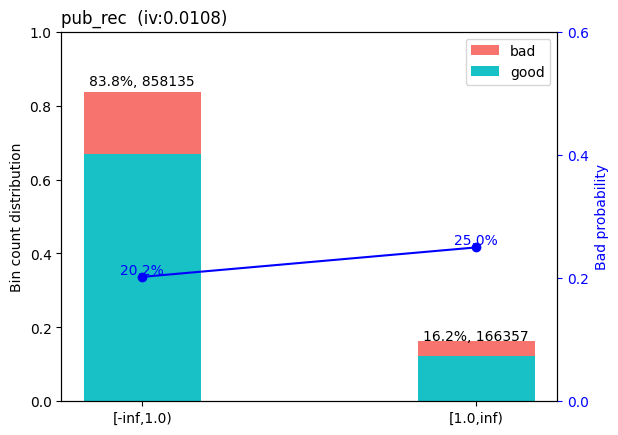

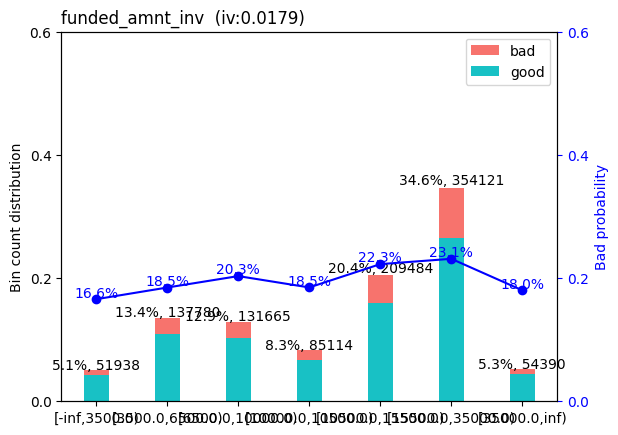

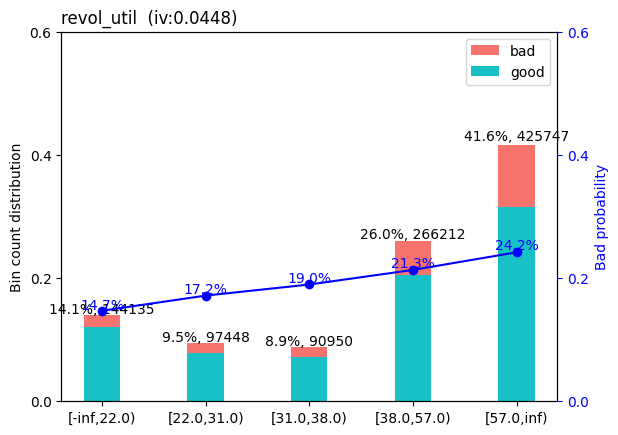

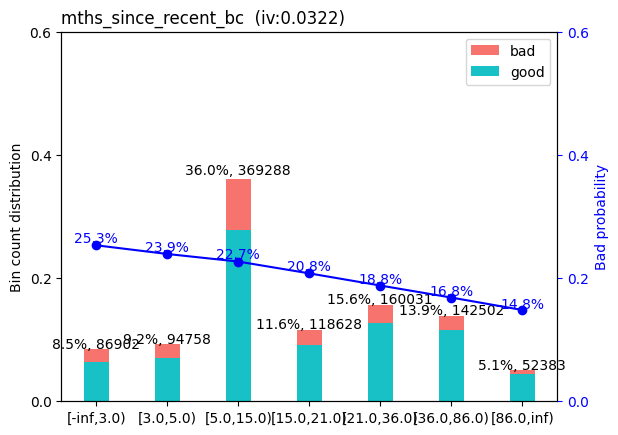

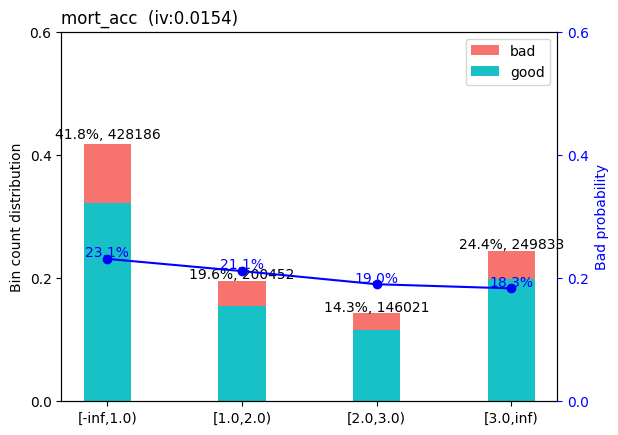

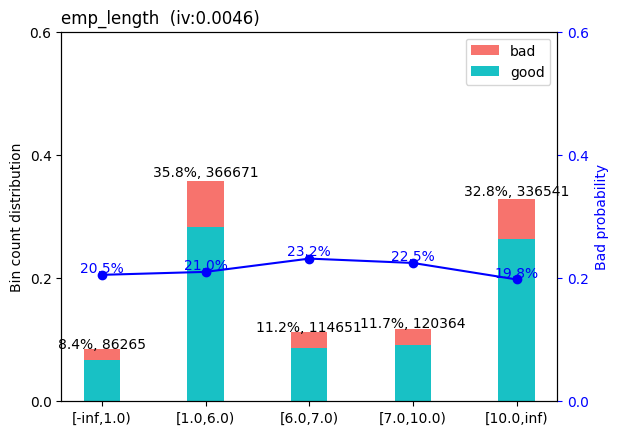

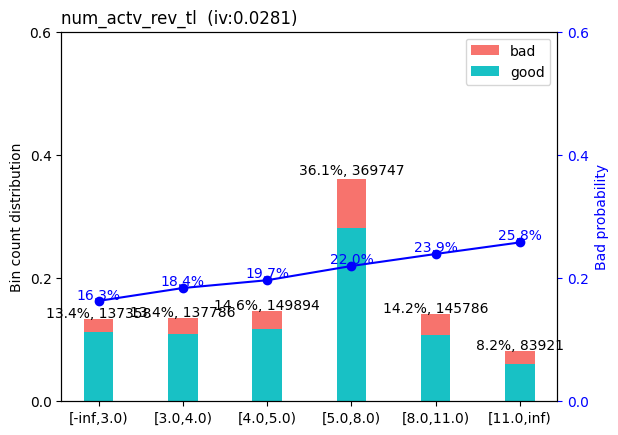

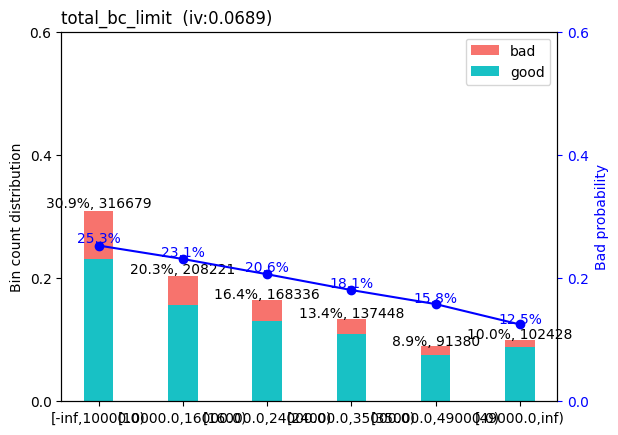

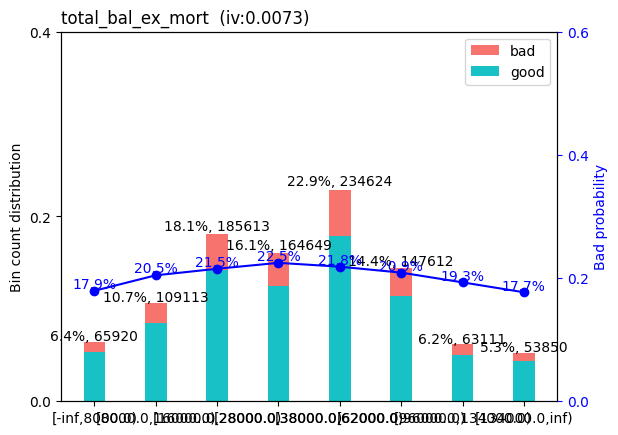

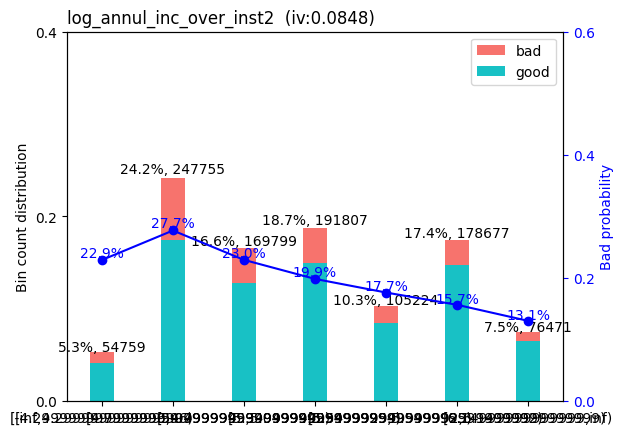

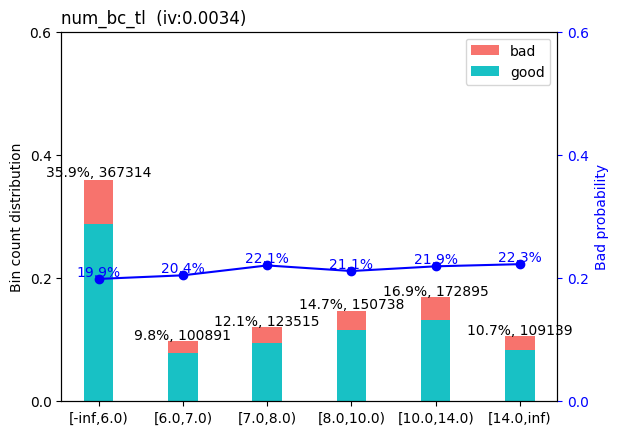

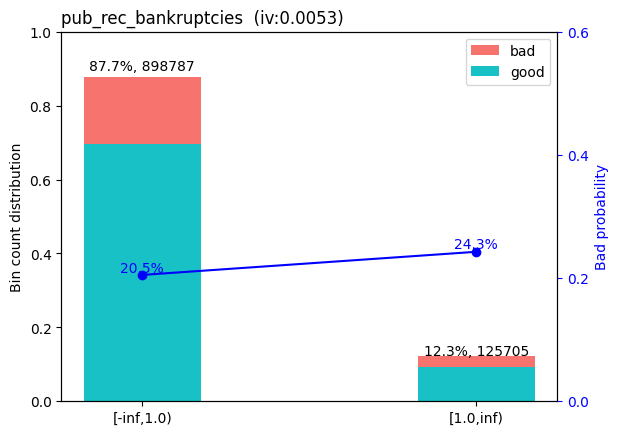

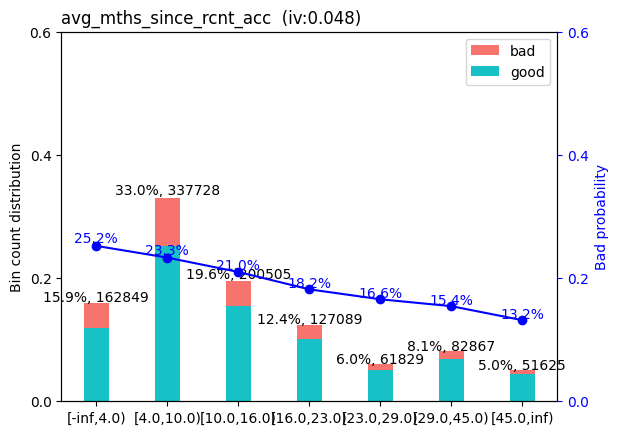

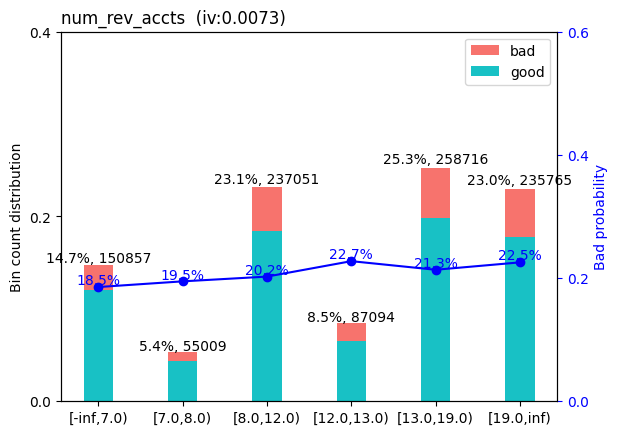

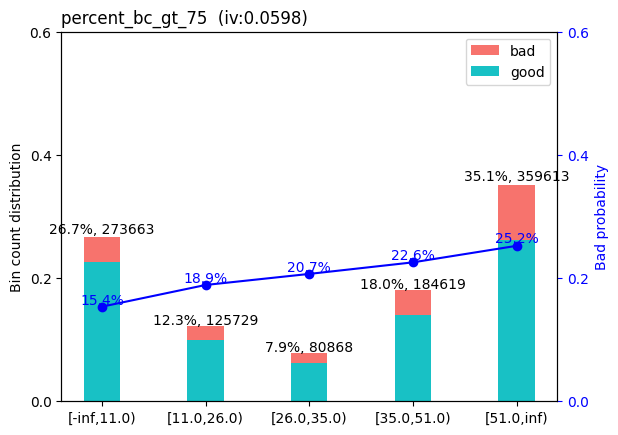

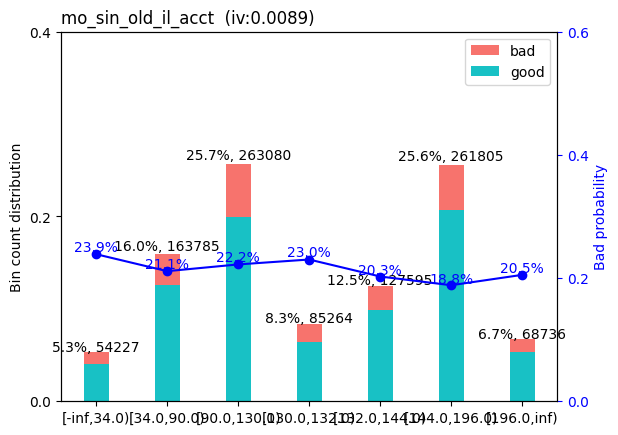

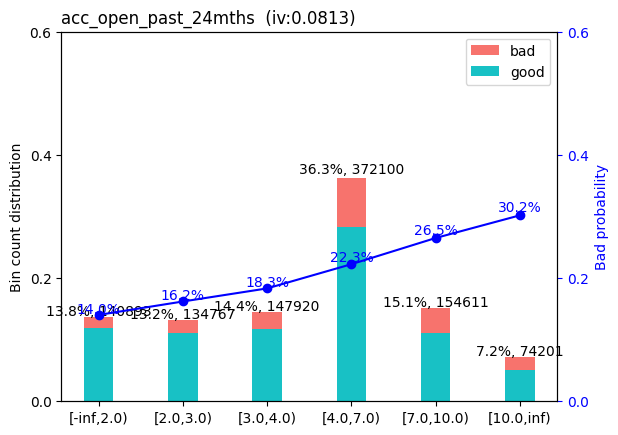

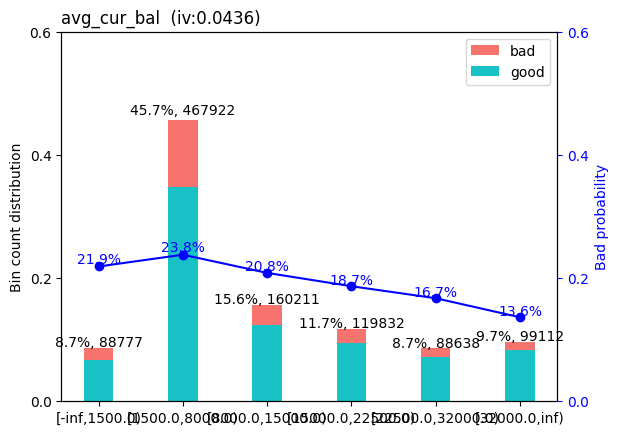

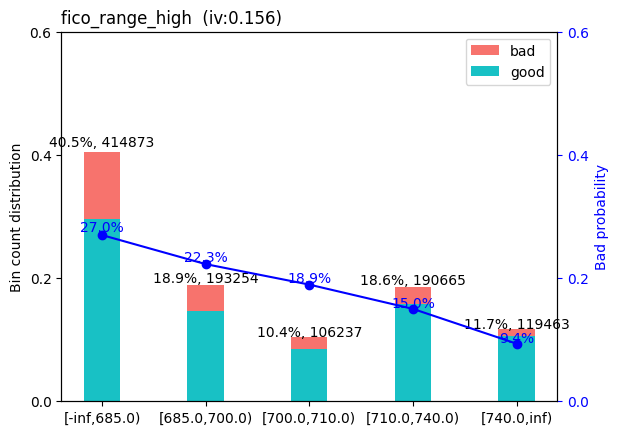

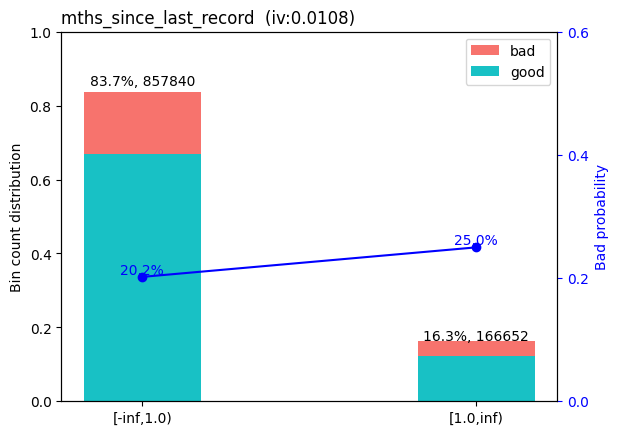

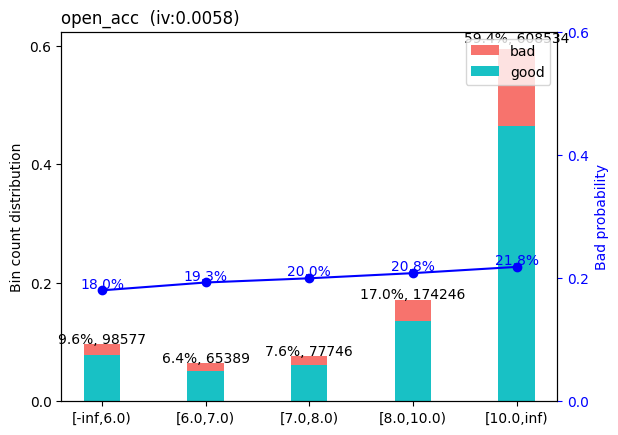

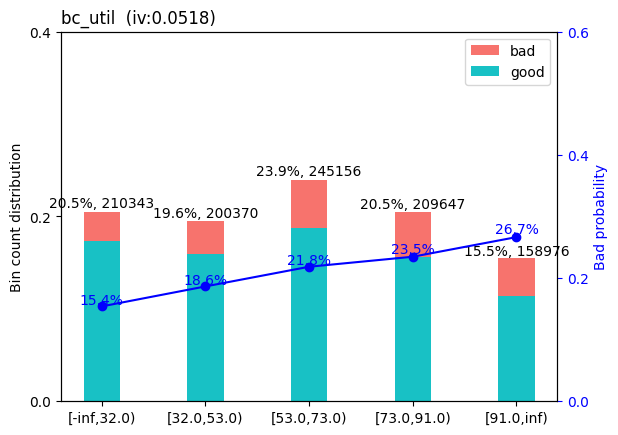

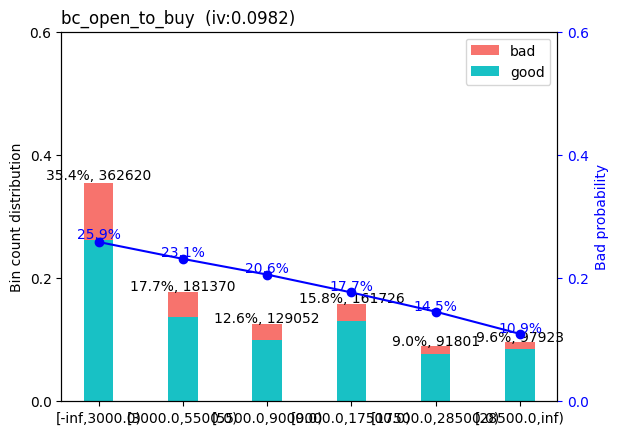

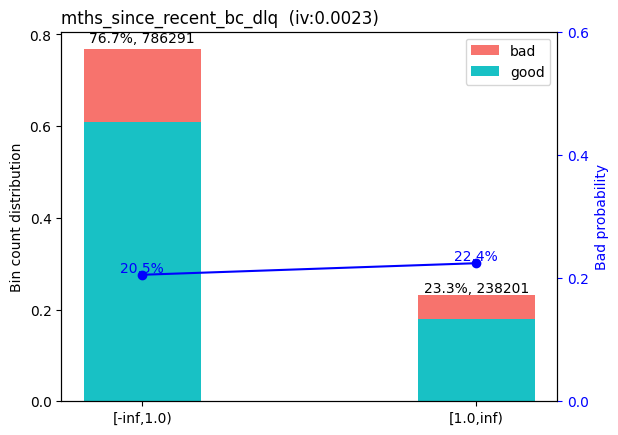

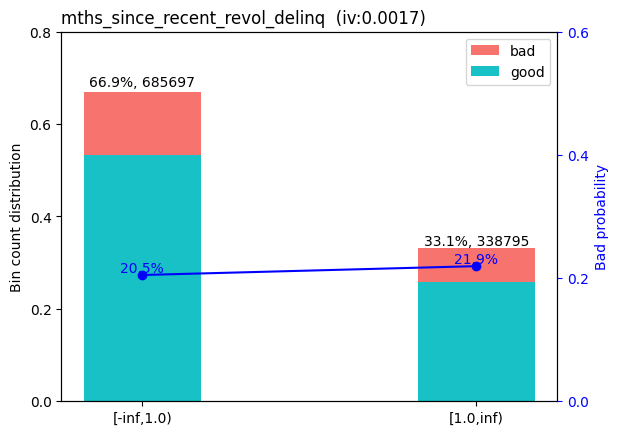

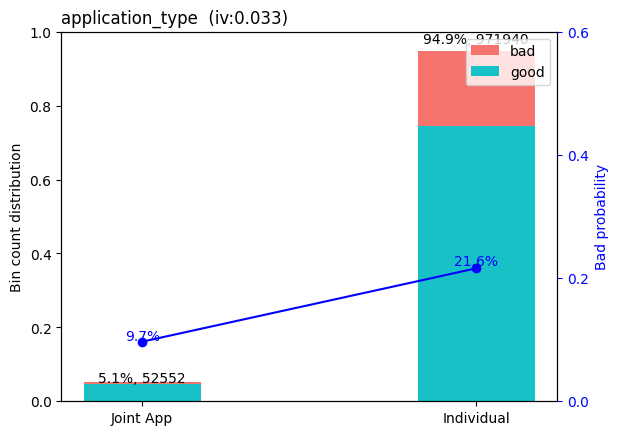

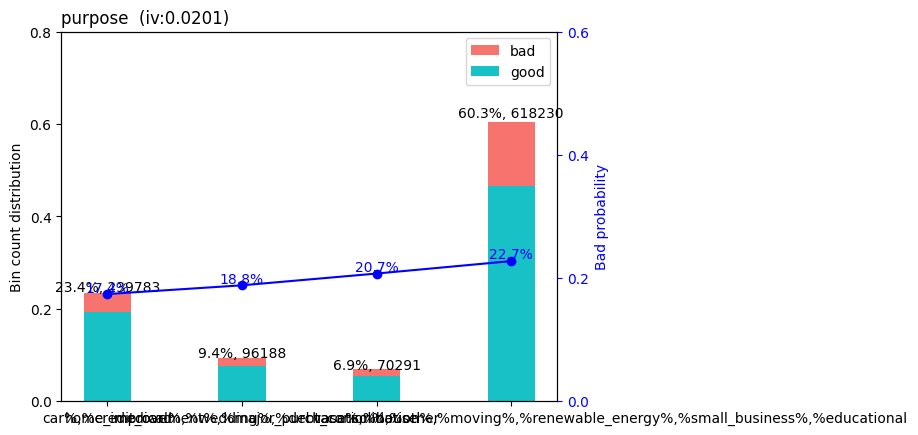

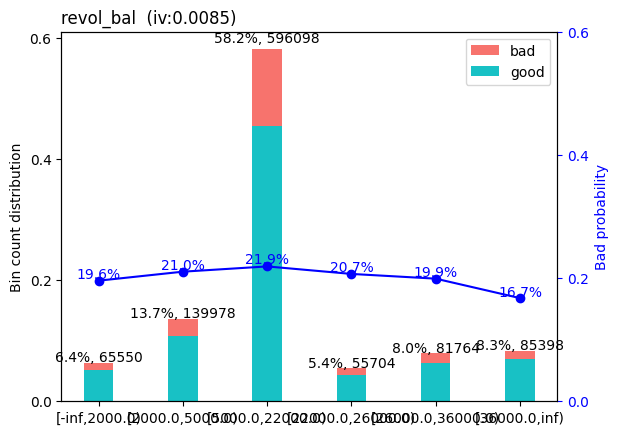

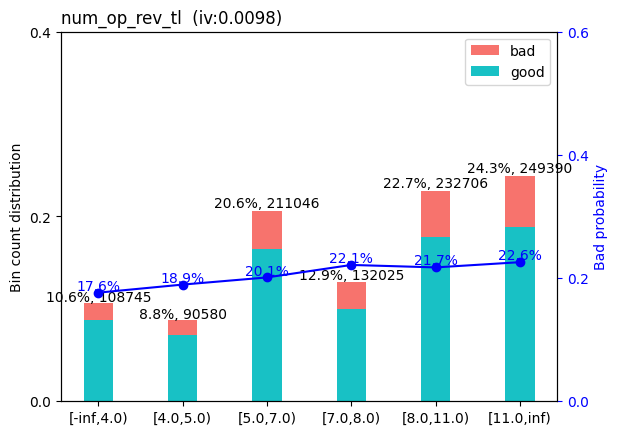

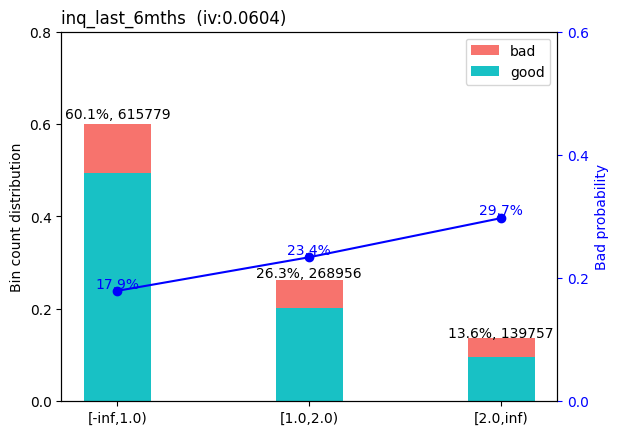

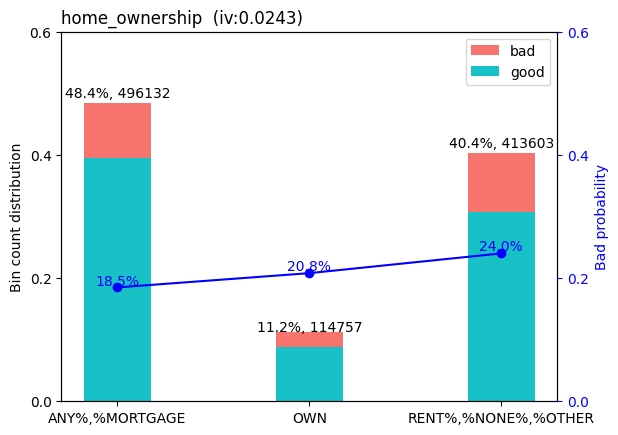

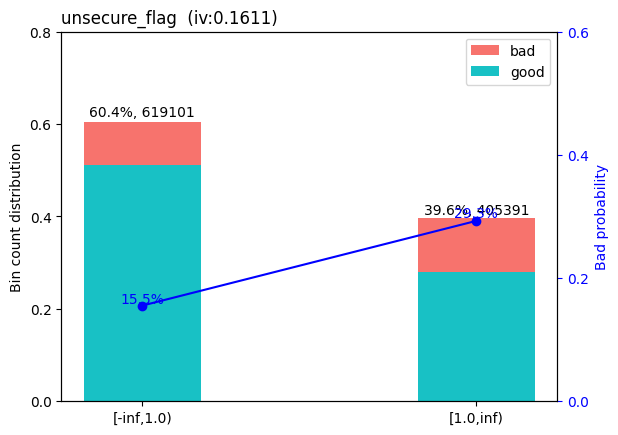

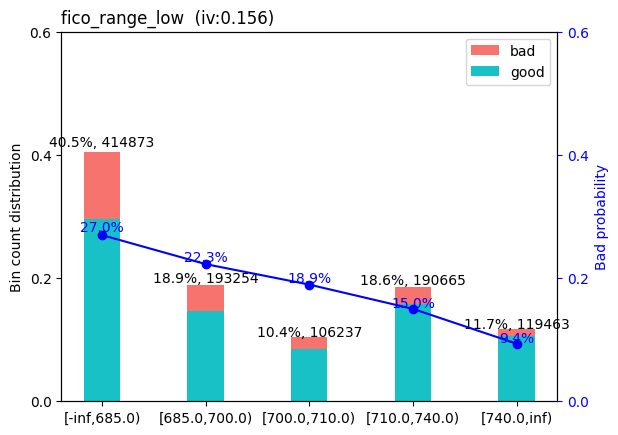

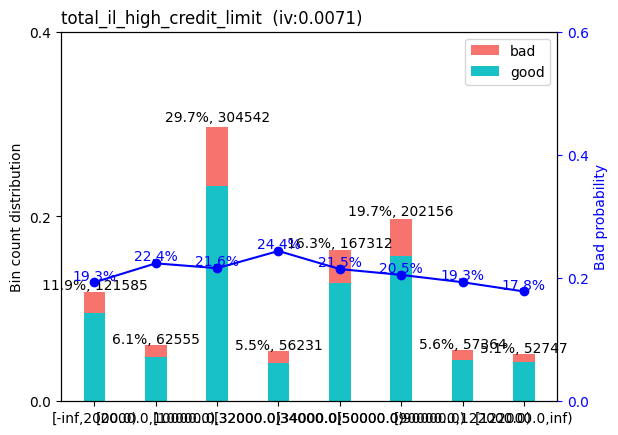

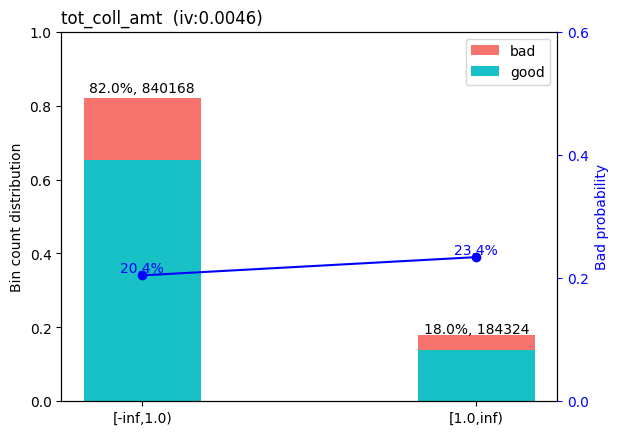

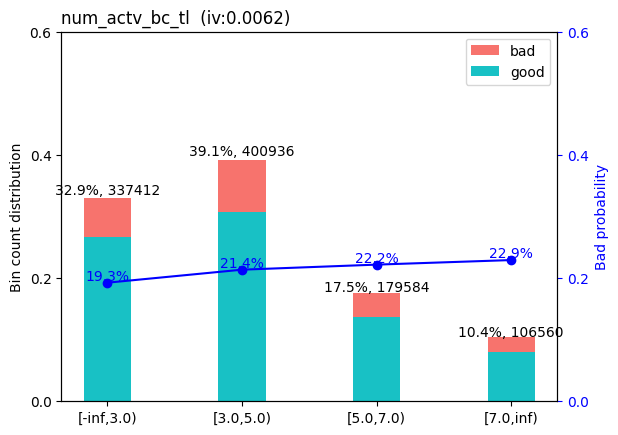

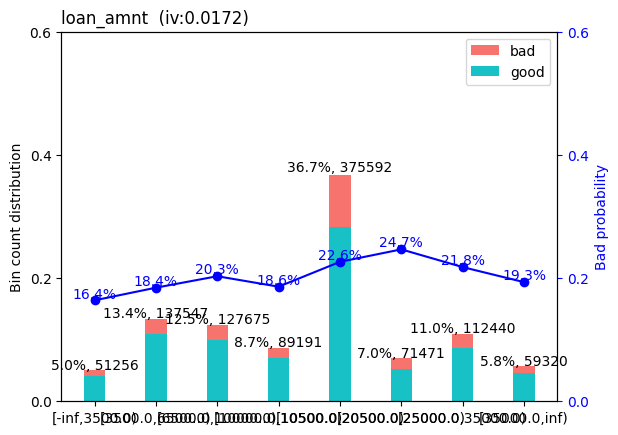

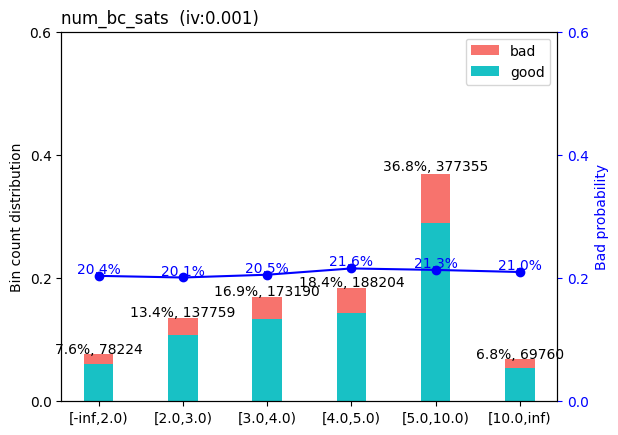

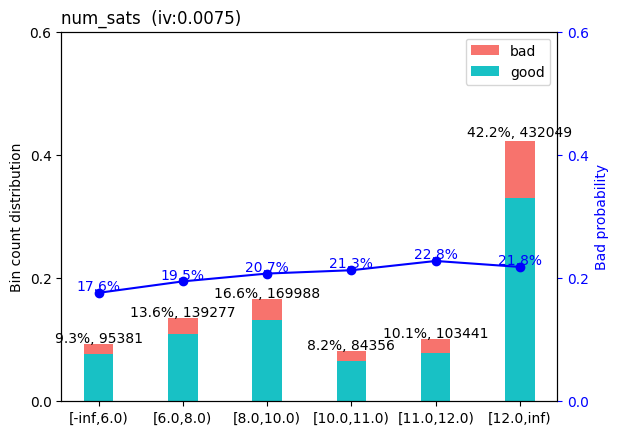

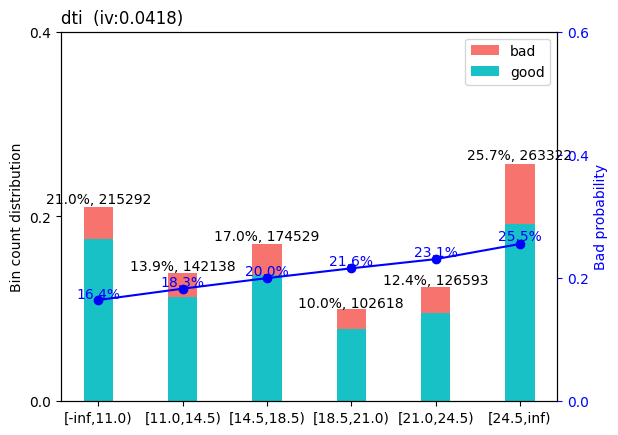

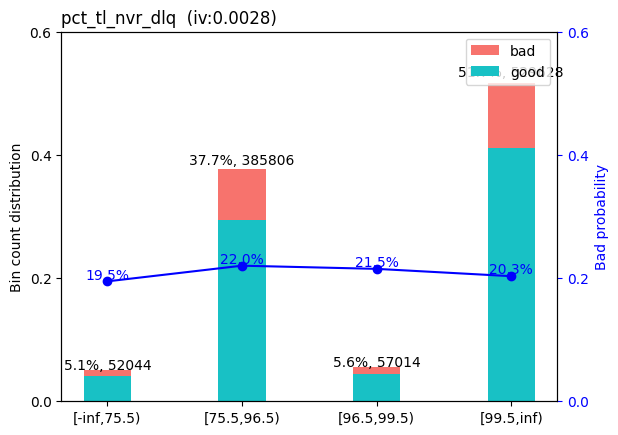

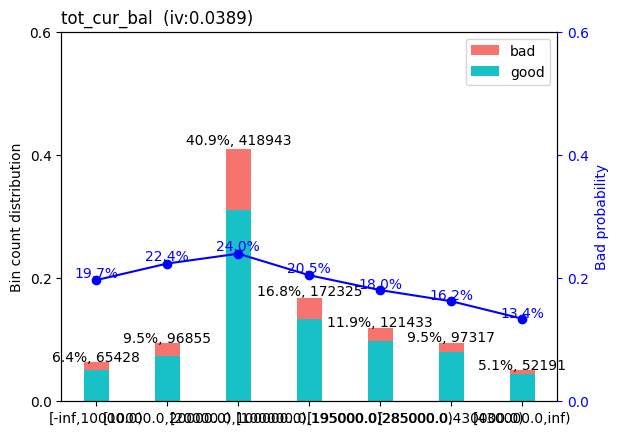

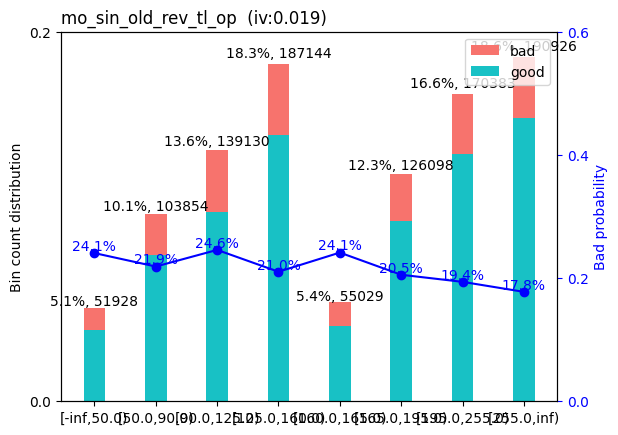

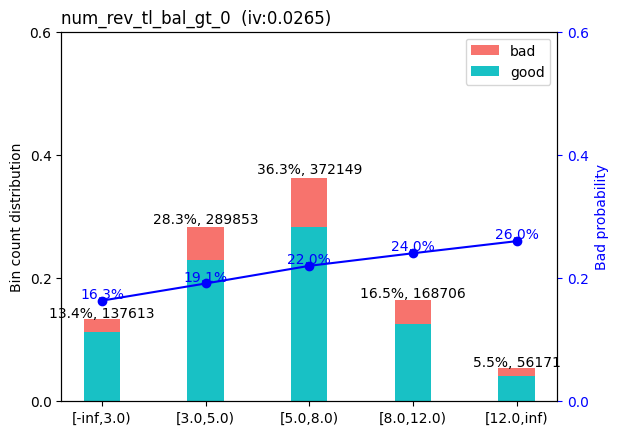

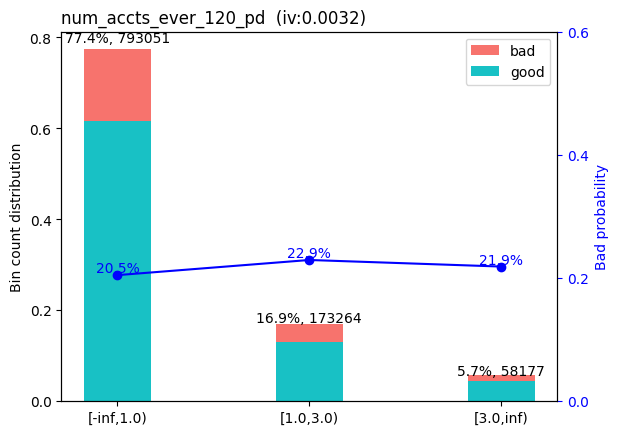

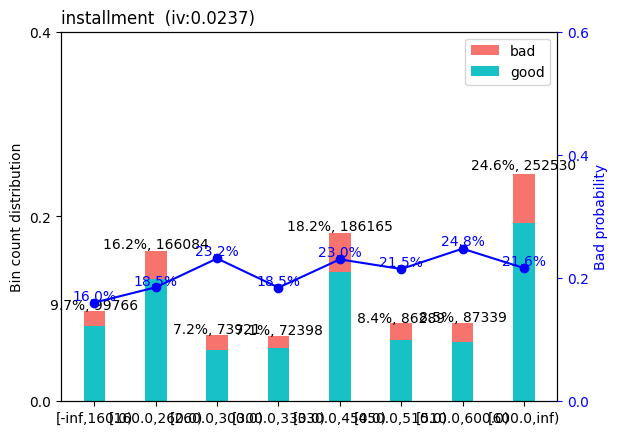

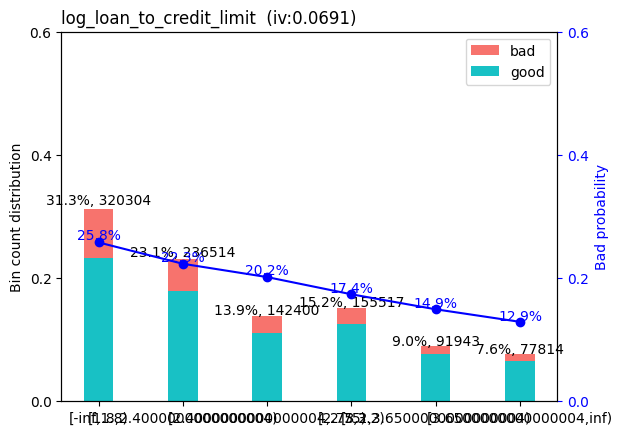

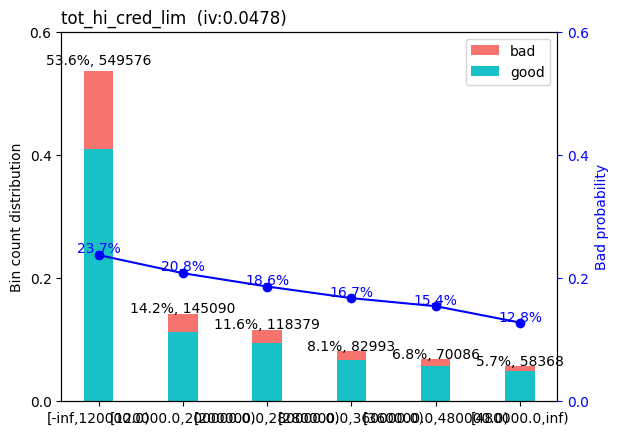

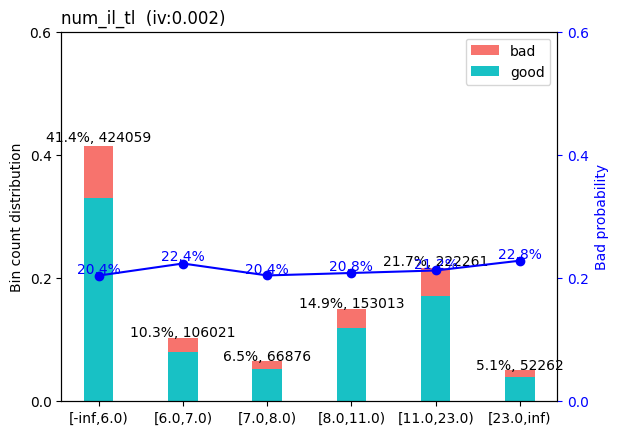

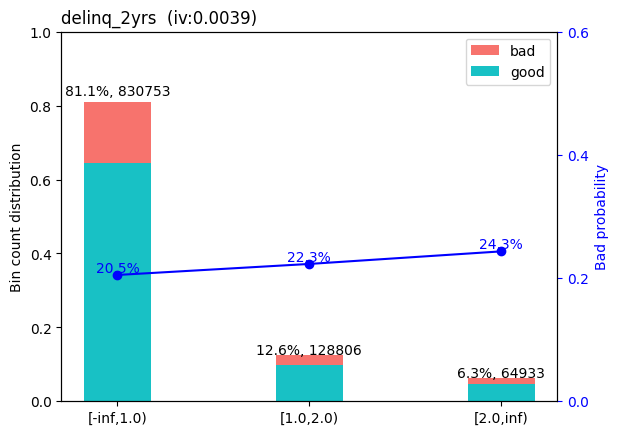

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sc.woebin_plot(bins)
plt.show()

# Q2.1.4 Bin Adjustment

-------- 1/58 earliest_cr_line --------
>>> dt[earliest_cr_line].describe(): 
count    1.024492e+06
mean     1.999535e+03
std      7.630122e+00
min      1.976031e+03
25%      1.995000e+03
50%      2.001000e+03
75%      2.005000e+03
max      2.015000e+03
Name: earliest_cr_line, dtype: float64 



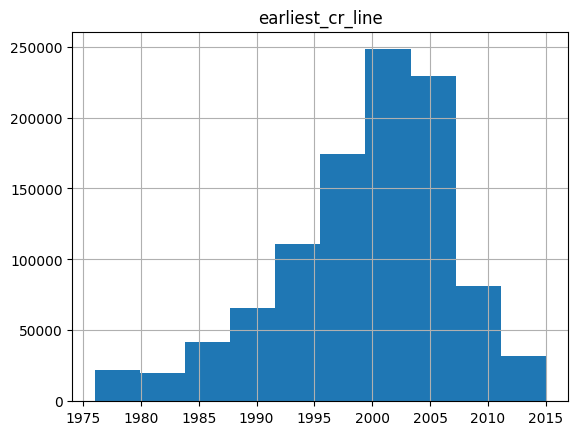

>>> Current breaks:
1994.0,1998.0,2003.0,2005.0,2006.0,2010.0 



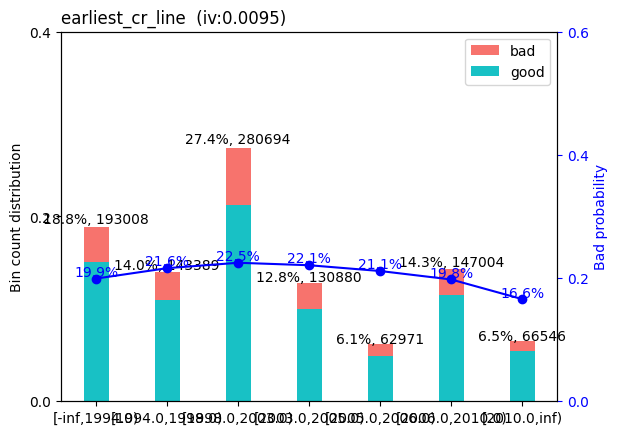

>>> Adjust breaks for (1/58) earliest_cr_line?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
2010.0, 2005.0, 2006.0 



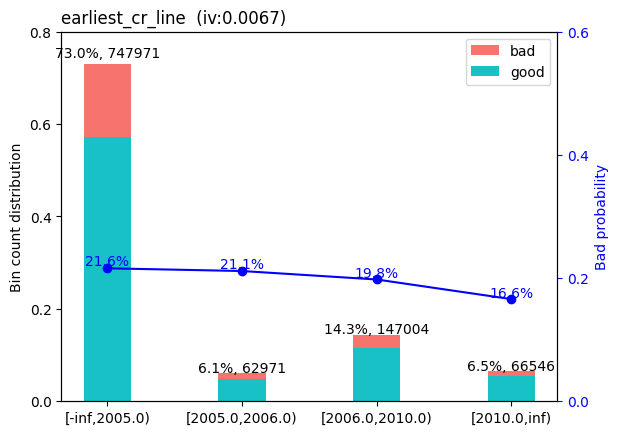

>>> Adjust breaks for (1/58) earliest_cr_line?
1: next 
2: yes 
3: back
-------- 2/58 annual_inc --------
>>> dt[annual_inc].describe(): 
count    1.024492e+06
mean     7.568689e+04
std      4.545719e+04
min      0.000000e+00
25%      4.541750e+04
50%      6.500000e+04
75%      9.200000e+04
max      3.049456e+05
Name: annual_inc, dtype: float64 



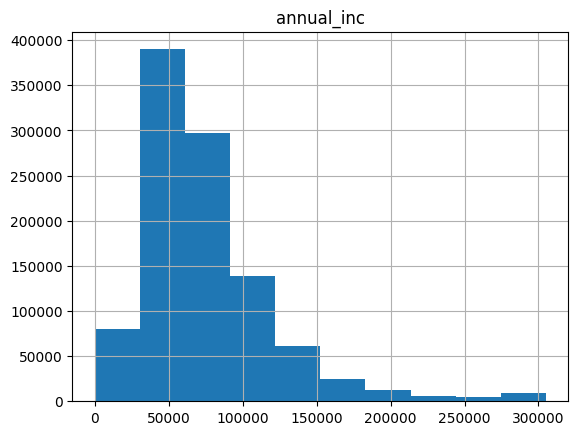

>>> Current breaks:
46000.0,62000.0,90000.0,102000.0,126000.0 



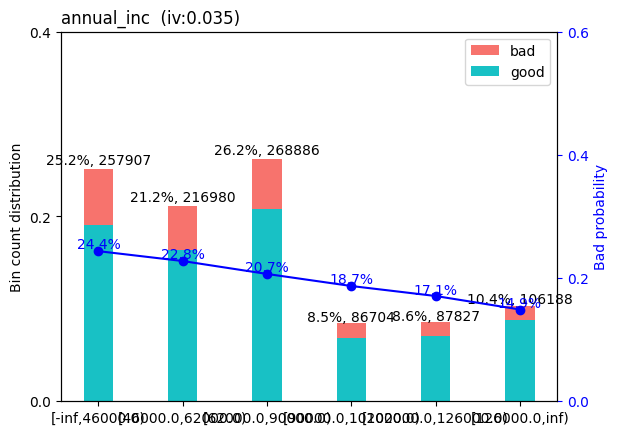

>>> Adjust breaks for (2/58) annual_inc?
1: next 
2: yes 
3: back
-------- 3/58 funded_amnt --------
>>> dt[funded_amnt].describe(): 
count    1.024492e+06
mean     1.512544e+04
std      9.161467e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt, dtype: float64 



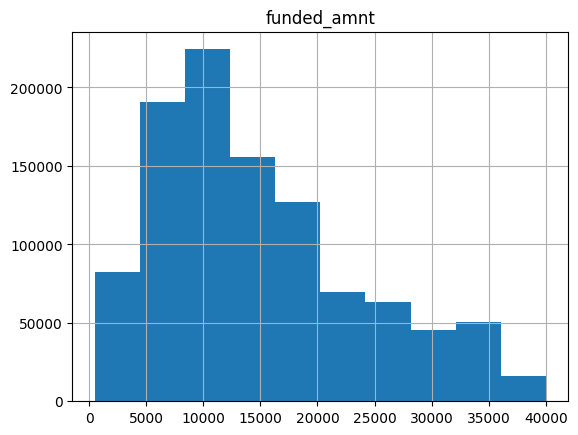

>>> Current breaks:
3500.0,6500.0,10000.0,10500.0,20500.0,25000.0,35000.0 



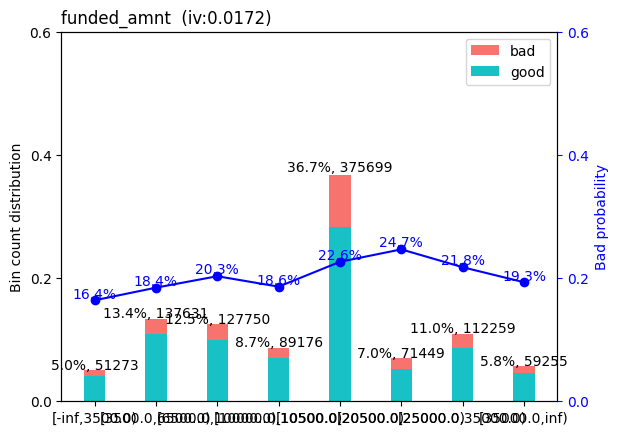

>>> Adjust breaks for (3/58) funded_amnt?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
6500.0, 20500.0, 3500.0, 10000.0 



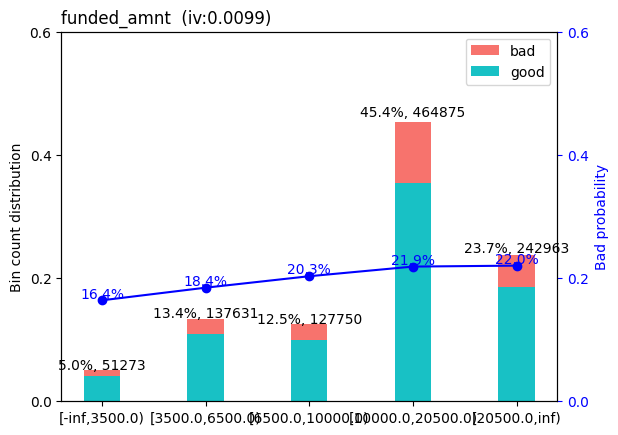

>>> Adjust breaks for (3/58) funded_amnt?
1: next 
2: yes 
3: back
-------- 4/58 mo_sin_rcnt_rev_tl_op --------
>>> dt[mo_sin_rcnt_rev_tl_op].describe(): 
count    1.024492e+06
mean     1.295452e+01
std      1.391388e+01
min      0.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.600000e+01
max      6.553007e+01
Name: mo_sin_rcnt_rev_tl_op, dtype: float64 



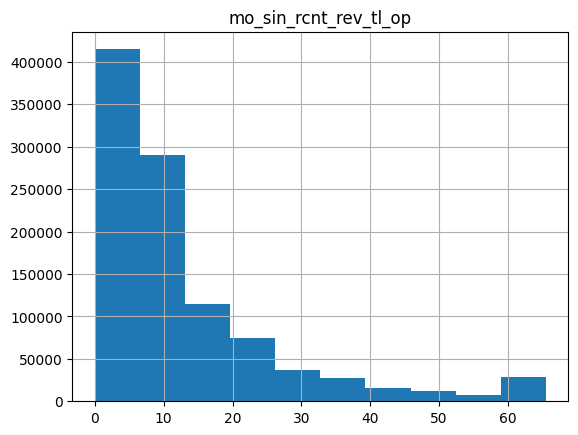

>>> Current breaks:
3.0,9.0,17.0,22.0,28.0 



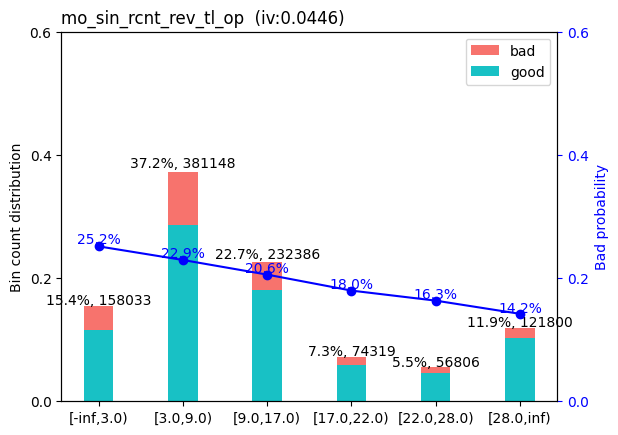

>>> Adjust breaks for (4/58) mo_sin_rcnt_rev_tl_op?
1: next 
2: yes 
3: back
-------- 5/58 mths_since_recent_inq --------
>>> dt[mths_since_recent_inq].describe(): 
count    1.024492e+06
mean     6.676788e+00
std      5.593521e+00
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.000000e+01
max      2.500000e+01
Name: mths_since_recent_inq, dtype: float64 



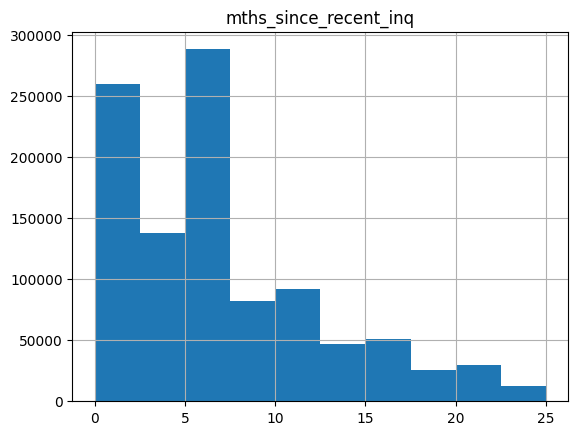

>>> Current breaks:
2.0,5.0,6.0,9.0,13.0 



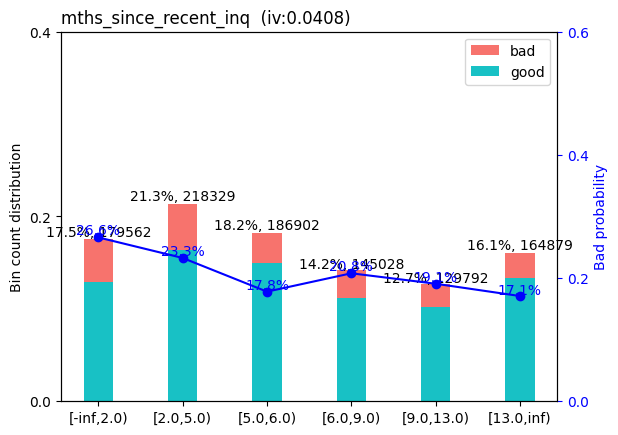

>>> Adjust breaks for (5/58) mths_since_recent_inq?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
13.0, 2.0, 9.0, 5.0 



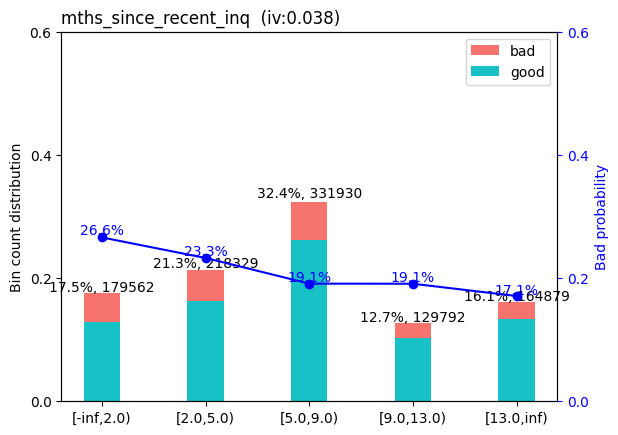

>>> Adjust breaks for (5/58) mths_since_recent_inq?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
13.0, 2.0, 5.0 



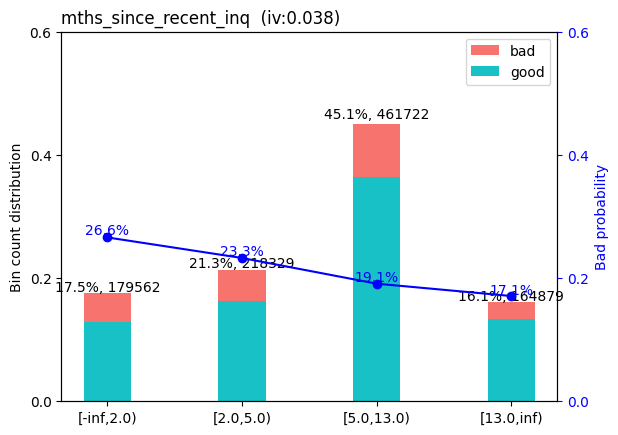

>>> Adjust breaks for (5/58) mths_since_recent_inq?
1: next 
2: yes 
3: back
-------- 6/58 total_acc --------
>>> dt[total_acc].describe(): 
count    1.024492e+06
mean     2.412023e+01
std      1.167633e+01
min      2.000000e+00
25%      1.500000e+01
50%      2.200000e+01
75%      3.100000e+01
max      6.022351e+01
Name: total_acc, dtype: float64 



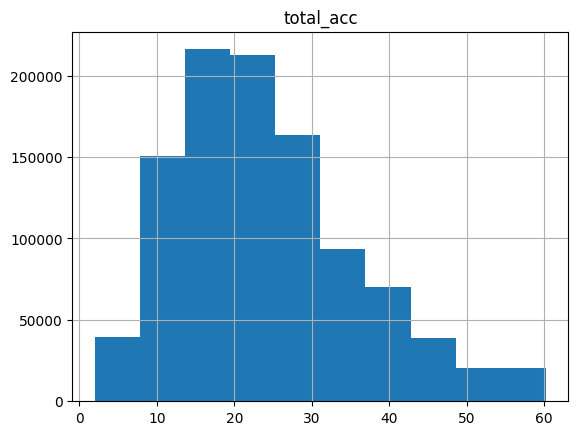

>>> Current breaks:
9.0,12.0,23.0,29.0,40.0 



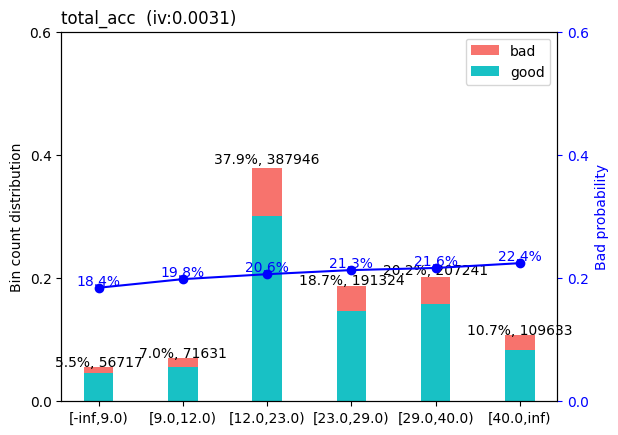

>>> Adjust breaks for (6/58) total_acc?
1: next 
2: yes 
3: back
-------- 7/58 mo_sin_rcnt_tl --------
>>> dt[mo_sin_rcnt_tl].describe(): 
count    1.024492e+06
mean     7.779088e+00
std      7.097636e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      3.535741e+01
Name: mo_sin_rcnt_tl, dtype: float64 



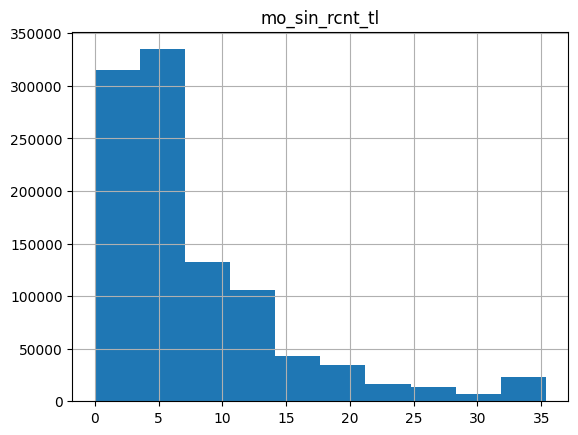

>>> Current breaks:
4.0,7.0,9.0,15.0 



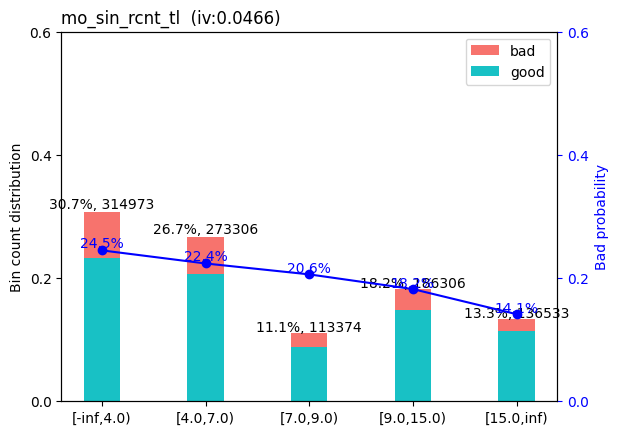

>>> Adjust breaks for (7/58) mo_sin_rcnt_tl?
1: next 
2: yes 
3: back
-------- 8/58 term --------
>>> dt[term].describe(): 
count        1024492
unique             2
top        36 months
freq          716681
Name: term, dtype: object 

>>> dt[term].value_counts(): 
 36 months    716681
 60 months    307811
Name: term, dtype: int64 

>>> Current breaks:
' 36 months',' 60 months' 



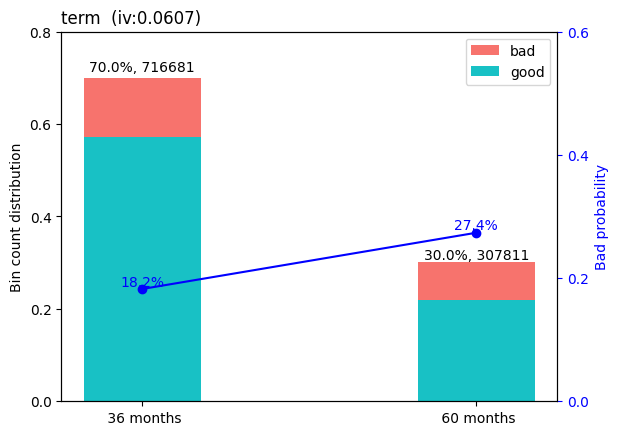

>>> Adjust breaks for (8/58) term?
1: next 
2: yes 
3: back
-------- 9/58 pub_rec --------
>>> dt[pub_rec].describe(): 
count    1.024492e+06
mean     1.852235e-01
std      4.418833e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.941242e+00
Name: pub_rec, dtype: float64 

>>> dt[pub_rec].value_counts(): 
0.000000    858135
1.000000    141493
1.941242     24864
Name: pub_rec, dtype: int64 

>>> Current breaks:
1.0 



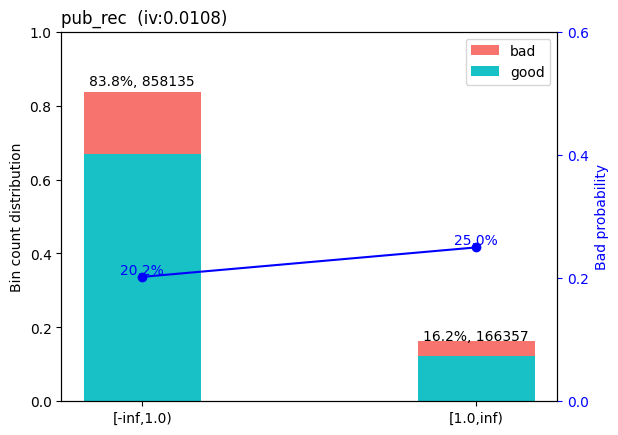

>>> Adjust breaks for (9/58) pub_rec?
1: next 
2: yes 
3: back
-------- 10/58 funded_amnt_inv --------
>>> dt[funded_amnt_inv].describe(): 
count    1.024492e+06
mean     1.510942e+04
std      9.163159e+03
min      0.000000e+00
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt_inv, dtype: float64 



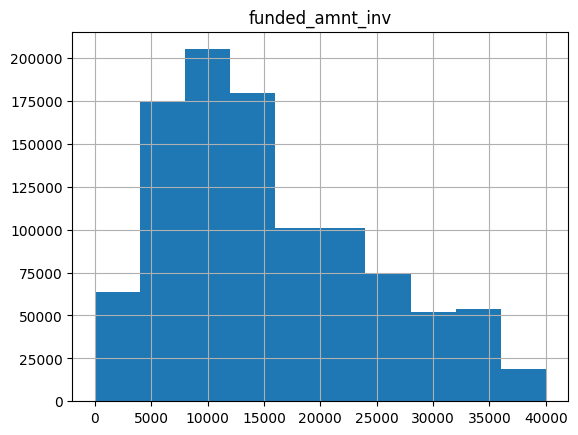

>>> Current breaks:
3500.0,6500.0,10000.0,10500.0,15500.0,35000.0 



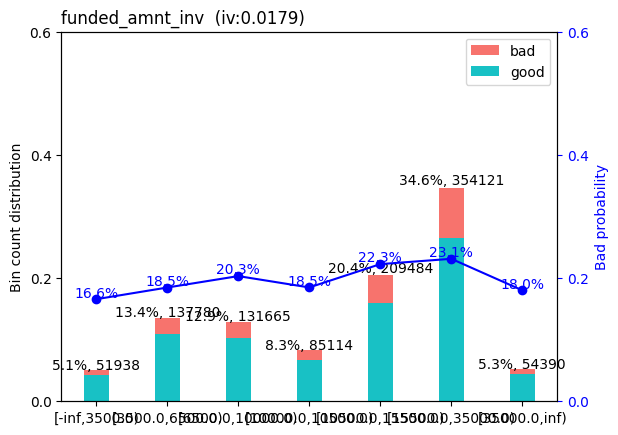

>>> Adjust breaks for (10/58) funded_amnt_inv?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
15500.0, 6500.0, 3500.0, 10000.0 



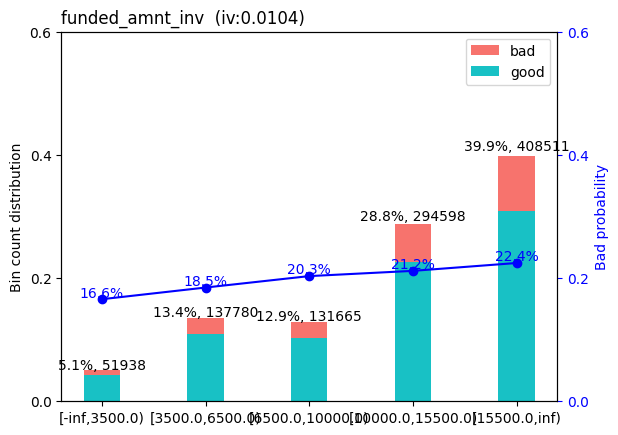

>>> Adjust breaks for (10/58) funded_amnt_inv?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
15500.0, 3500.0, 10500.0, 6500.0 



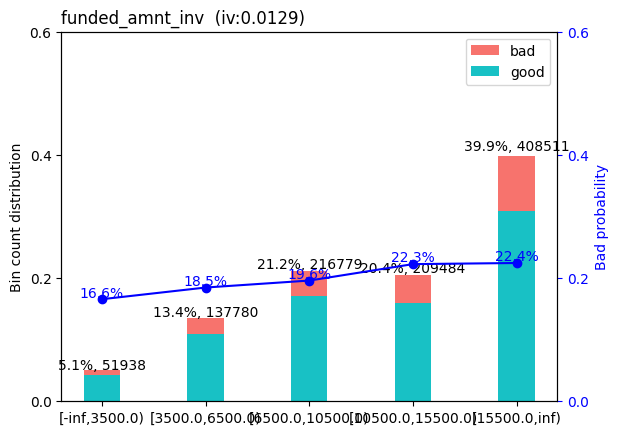

>>> Adjust breaks for (10/58) funded_amnt_inv?
1: next 
2: yes 
3: back
-------- 11/58 revol_util --------
>>> dt[revol_util].describe(): 
count    1.024492e+06
mean     5.078572e+01
std      2.464196e+01
min      0.000000e+00
25%      3.210000e+01
50%      5.090000e+01
75%      6.980000e+01
max      1.248029e+02
Name: revol_util, dtype: float64 



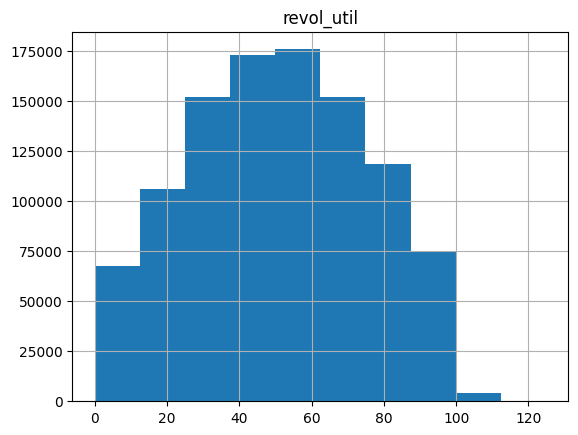

>>> Current breaks:
22.0,31.0,38.0,57.0 



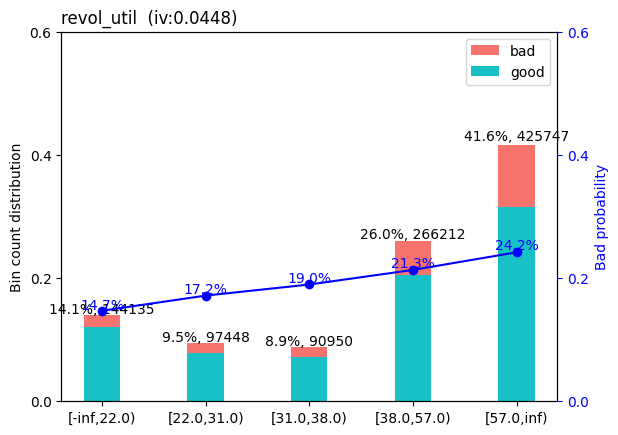

>>> Adjust breaks for (11/58) revol_util?
1: next 
2: yes 
3: back
-------- 12/58 mths_since_recent_bc --------
>>> dt[mths_since_recent_bc].describe(): 
count    1.024492e+06
mean     2.307220e+01
std      2.635823e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.400000e+01
75%      2.800000e+01
max      1.201979e+02
Name: mths_since_recent_bc, dtype: float64 



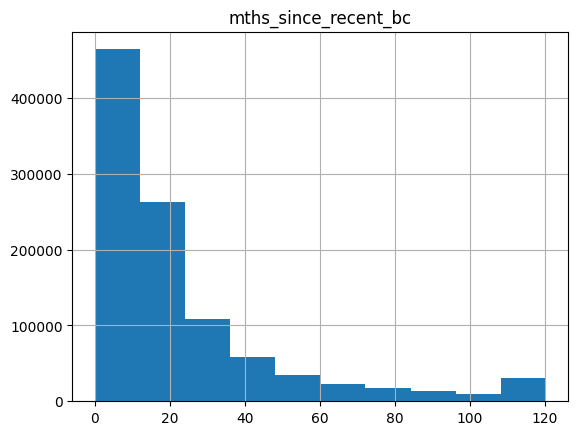

>>> Current breaks:
3.0,5.0,15.0,21.0,36.0,86.0 



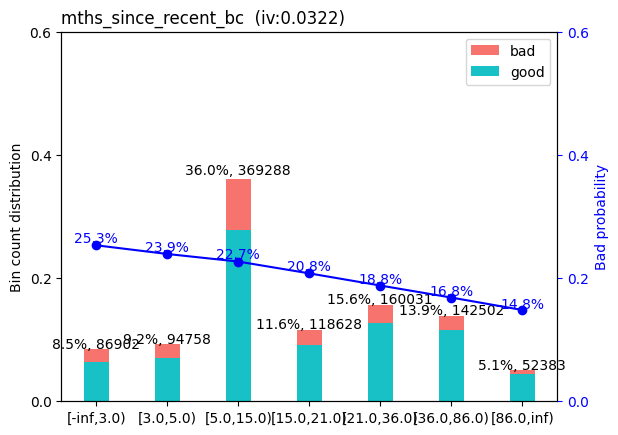

>>> Adjust breaks for (12/58) mths_since_recent_bc?
1: next 
2: yes 
3: back
-------- 13/58 mort_acc --------
>>> dt[mort_acc].describe(): 
count    1.024492e+06
mean     1.497880e+00
std      1.781774e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.207530e+00
Name: mort_acc, dtype: float64 

>>> dt[mort_acc].value_counts(): 
0.00000    428186
1.00000    200452
2.00000    146021
3.00000    102619
4.00000     66913
5.00000     38512
6.00000     20719
7.20753     10594
7.00000     10476
Name: mort_acc, dtype: int64 

>>> Current breaks:
1.0,2.0,3.0 



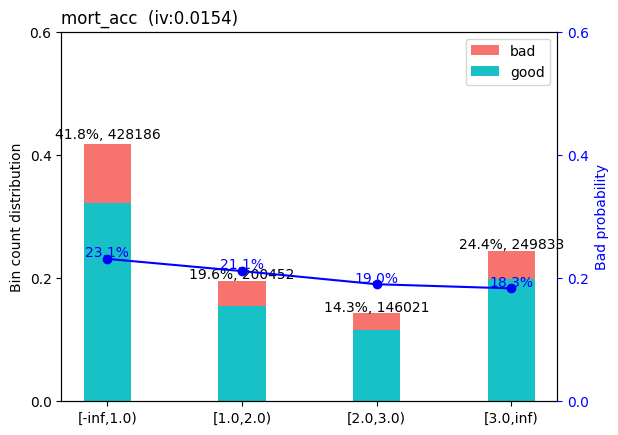

>>> Adjust breaks for (13/58) mort_acc?
1: next 
2: yes 
3: back
-------- 14/58 emp_length --------
>>> dt[emp_length].describe(): 
count    1.024492e+06
mean     5.925833e+00
std      3.594236e+00
min      0.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: emp_length, dtype: float64 



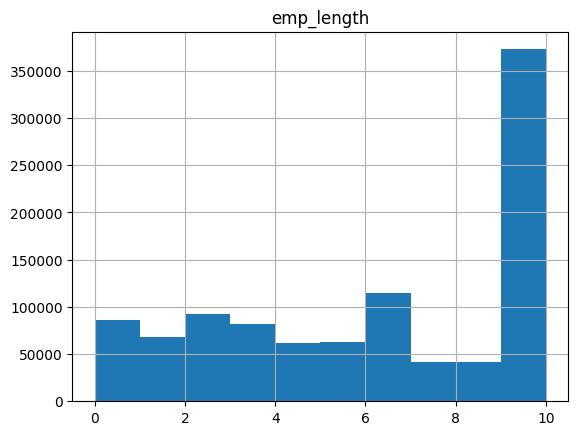

>>> Current breaks:
1.0,6.0,7.0,10.0 



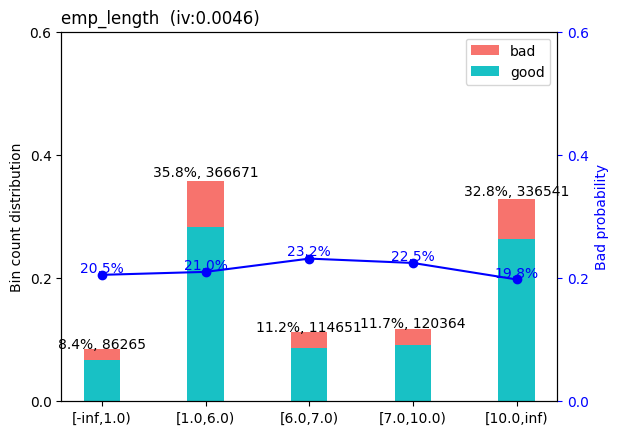

>>> Adjust breaks for (14/58) emp_length?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
6.0 



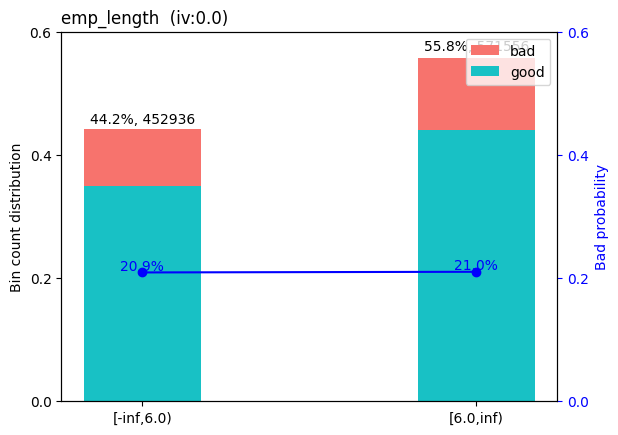

>>> Adjust breaks for (14/58) emp_length?
1: next 
2: yes 
3: back
-------- 15/58 num_actv_rev_tl --------
>>> dt[num_actv_rev_tl].describe(): 
count    1.024492e+06
mean     5.614796e+00
std      3.160601e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      1.589687e+01
Name: num_actv_rev_tl, dtype: float64 



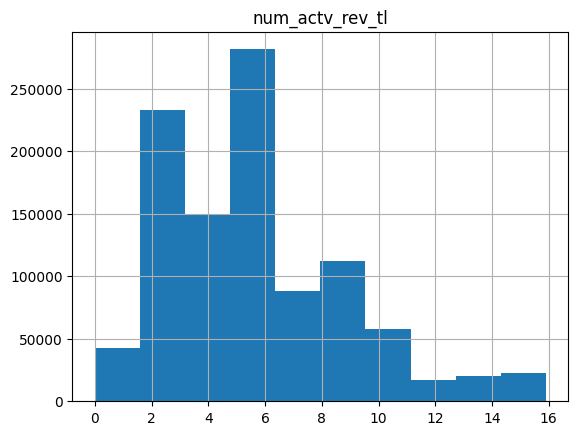

>>> Current breaks:
3.0,4.0,5.0,8.0,11.0 



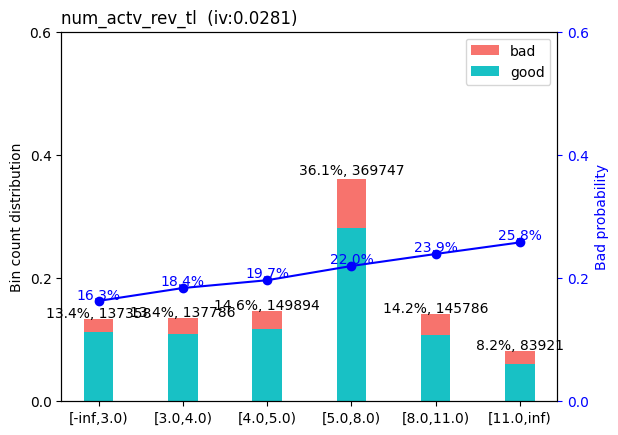

>>> Adjust breaks for (15/58) num_actv_rev_tl?
1: next 
2: yes 
3: back
-------- 16/58 total_bc_limit --------
>>> dt[total_bc_limit].describe(): 
count    1.024492e+06
mean     2.197154e+04
std      1.966198e+04
min      0.000000e+00
25%      8.200000e+03
50%      1.590000e+04
75%      2.910000e+04
max      9.042247e+04
Name: total_bc_limit, dtype: float64 



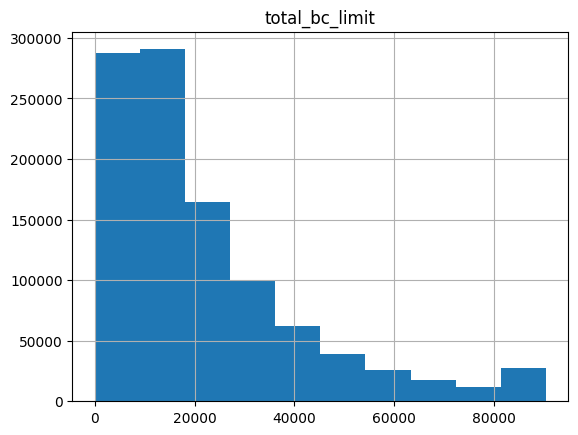

>>> Current breaks:
10000.0,16000.0,24000.0,35000.0,49000.0 



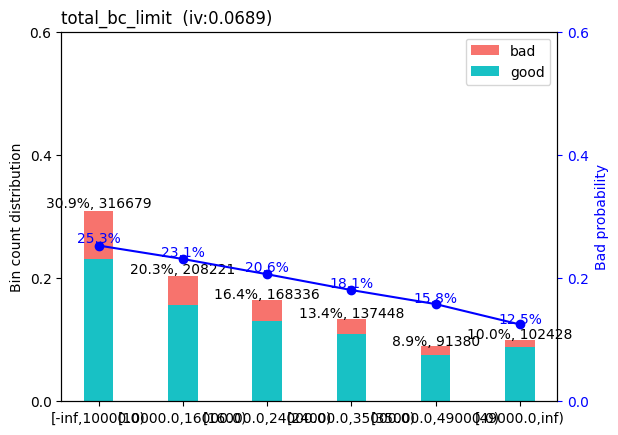

>>> Adjust breaks for (16/58) total_bc_limit?
1: next 
2: yes 
3: back
-------- 17/58 total_bal_ex_mort --------
>>> dt[total_bal_ex_mort].describe(): 
count    1.024492e+06
mean     4.912537e+04
std      4.088962e+04
min      0.000000e+00
25%      2.130200e+04
50%      3.784500e+04
75%      6.325900e+04
max      1.994795e+05
Name: total_bal_ex_mort, dtype: float64 



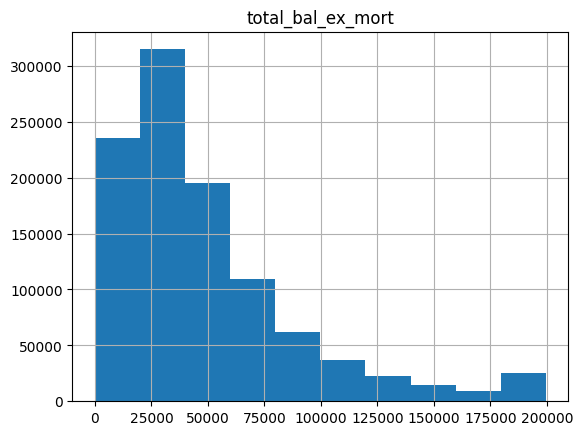

>>> Current breaks:
8000.0,16000.0,28000.0,38000.0,62000.0,96000.0,134000.0 



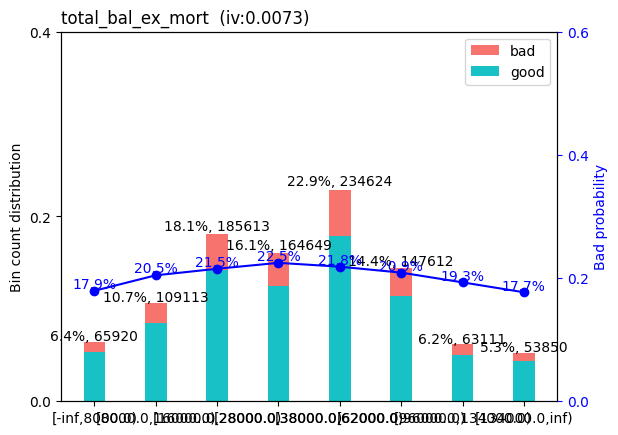

>>> Adjust breaks for (17/58) total_bal_ex_mort?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
62000.0, 96000.0, 134000.0, 38000.0 



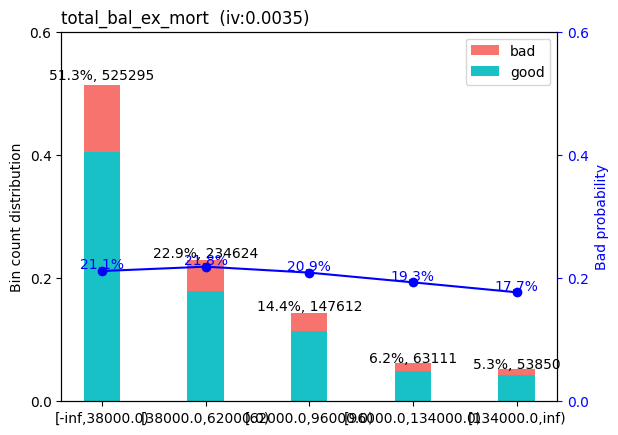

>>> Adjust breaks for (17/58) total_bal_ex_mort?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
62000.0, 96000.0, 134000.0 



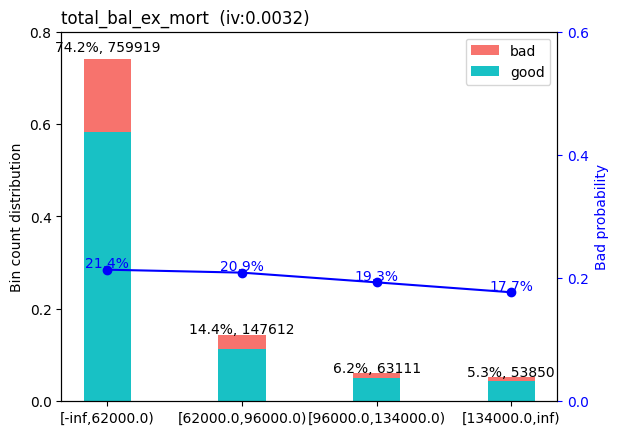

>>> Adjust breaks for (17/58) total_bal_ex_mort?
1: next 
2: yes 
3: back
-------- 18/58 log_annul_inc_over_inst2 --------
>>> dt[log_annul_inc_over_inst2].describe(): 
count    1.024492e+06
mean     5.174767e+00
std      6.325585e-01
min      3.205236e+00
25%      4.726777e+00
50%      5.108359e+00
75%      5.547950e+00
max      7.142616e+00
Name: log_annul_inc_over_inst2, dtype: float64 



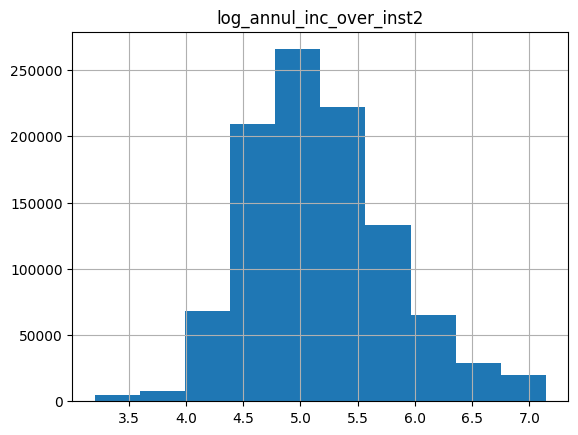

>>> Current breaks:
4.299999999999996,4.7999999999999945,5.049999999999994,5.3499999999999925,5.549999999999992,6.14999999999999 



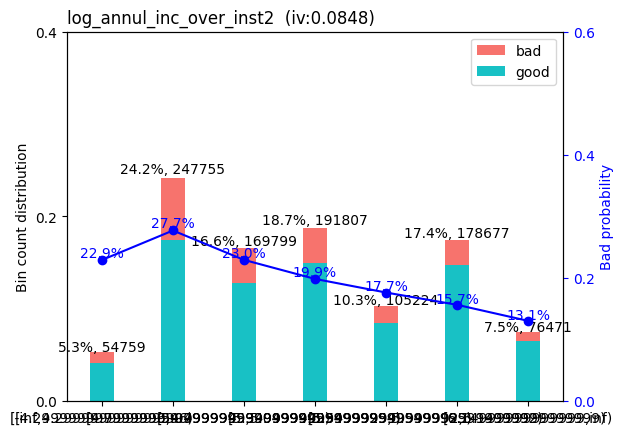

>>> Adjust breaks for (18/58) log_annul_inc_over_inst2?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
4.7999999999999945, 5.549999999999992, 5.049999999999994, 6.14999999999999, 5.3499999999999925 



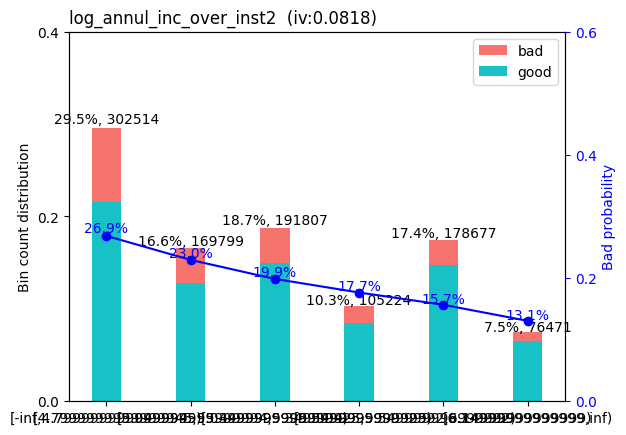

>>> Adjust breaks for (18/58) log_annul_inc_over_inst2?
1: next 
2: yes 
3: back
-------- 19/58 num_bc_tl --------
>>> dt[num_bc_tl].describe(): 
count    1.024492e+06
mean     7.662781e+00
std      4.416223e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.187696e+01
Name: num_bc_tl, dtype: float64 



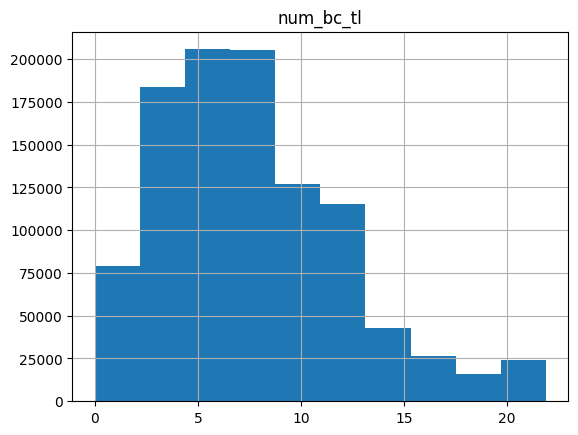

>>> Current breaks:
6.0,7.0,8.0,10.0,14.0 



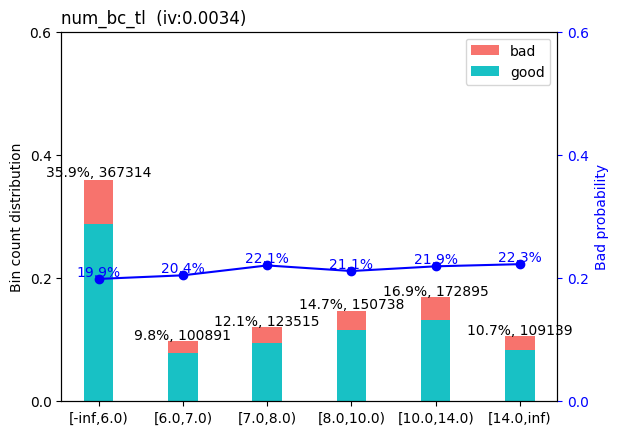

>>> Adjust breaks for (19/58) num_bc_tl?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
6.0, 10.0, 14.0, 7.0 



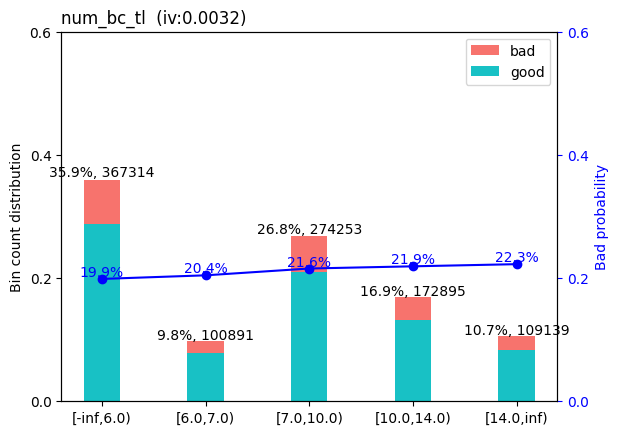

>>> Adjust breaks for (19/58) num_bc_tl?
1: next 
2: yes 
3: back
-------- 20/58 pub_rec_bankruptcies --------
>>> dt[pub_rec_bankruptcies].describe(): 
count    1.024492e+06
mean     1.242041e-01
std      3.326264e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.238306e+00
Name: pub_rec_bankruptcies, dtype: float64 

>>> dt[pub_rec_bankruptcies].value_counts(): 
0.000000    898787
1.000000    119238
1.238306      6467
Name: pub_rec_bankruptcies, dtype: int64 

>>> Current breaks:
1.0 



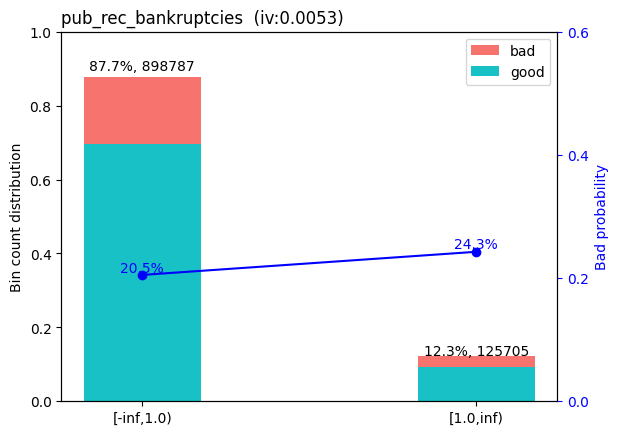

>>> Adjust breaks for (20/58) pub_rec_bankruptcies?
1: next 
2: yes 
3: back
-------- 21/58 avg_mths_since_rcnt_acc --------
>>> dt[avg_mths_since_rcnt_acc].describe(): 
count    1.024492e+06
mean     1.460193e+01
std      1.364267e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.000000e+01
75%      1.900000e+01
max      7.369513e+01
Name: avg_mths_since_rcnt_acc, dtype: float64 



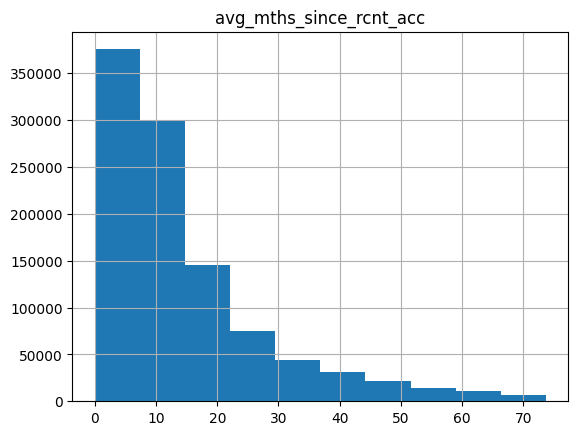

>>> Current breaks:
4.0,10.0,16.0,23.0,29.0,45.0 



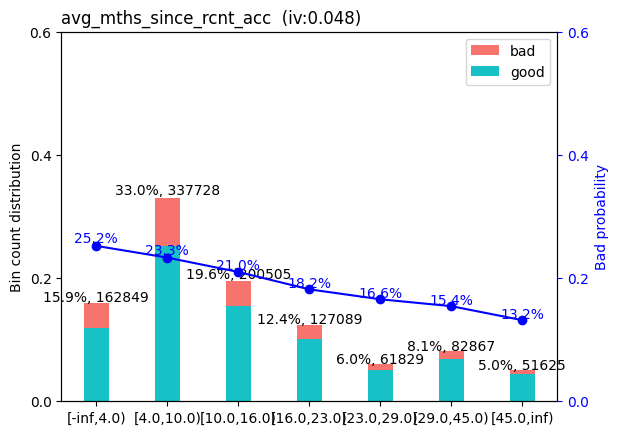

>>> Adjust breaks for (21/58) avg_mths_since_rcnt_acc?
1: next 
2: yes 
3: back
-------- 22/58 num_rev_accts --------
>>> dt[num_rev_accts].describe(): 
count    1.024492e+06
mean     1.390516e+01
std      7.588953e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.200000e+01
75%      1.800000e+01
max      3.822319e+01
Name: num_rev_accts, dtype: float64 



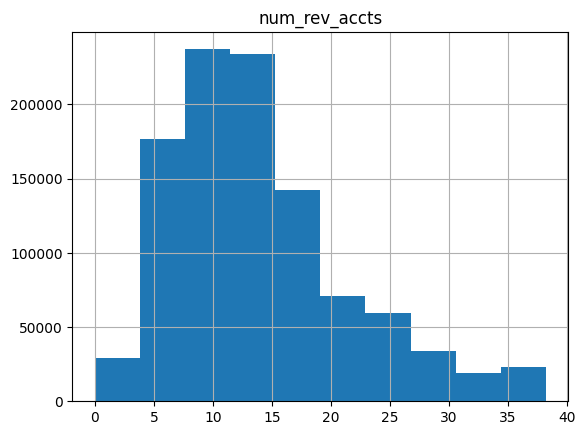

>>> Current breaks:
7.0,8.0,12.0,13.0,19.0 



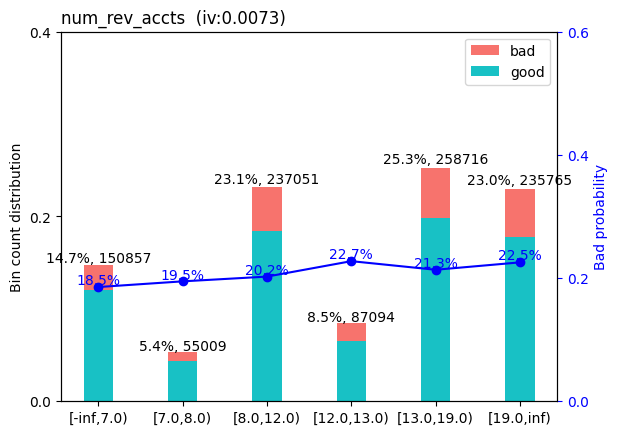

>>> Adjust breaks for (22/58) num_rev_accts?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
19.0, 12.0, 8.0, 7.0 



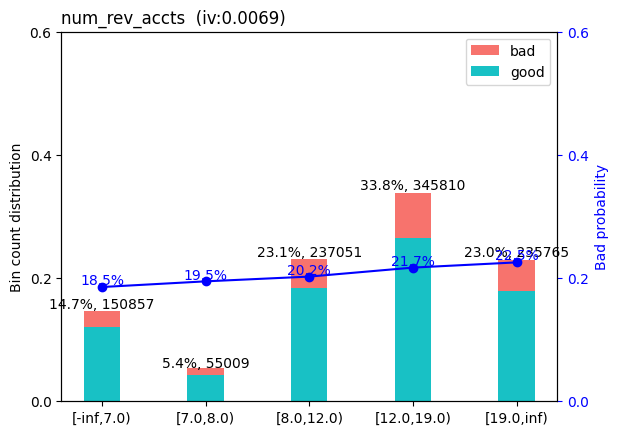

>>> Adjust breaks for (22/58) num_rev_accts?
1: next 
2: yes 
3: back
-------- 23/58 percent_bc_gt_75 --------
>>> dt[percent_bc_gt_75].describe(): 
count    1.024492e+06
mean     4.312233e+01
std      3.567130e+01
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+01
75%      7.140000e+01
max      1.000000e+02
Name: percent_bc_gt_75, dtype: float64 



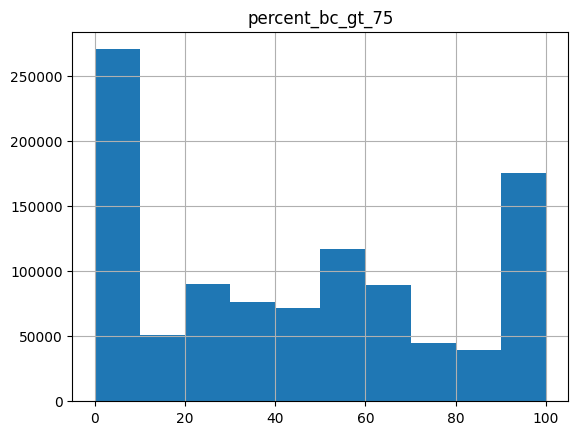

>>> Current breaks:
11.0,26.0,35.0,51.0 



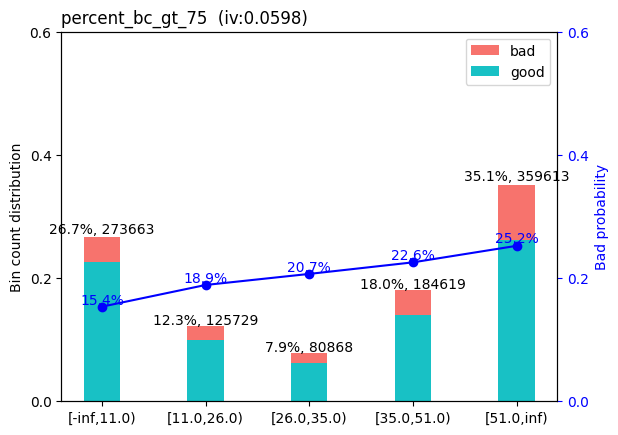

>>> Adjust breaks for (23/58) percent_bc_gt_75?
1: next 
2: yes 
3: back
-------- 24/58 mo_sin_old_il_acct --------
>>> dt[mo_sin_old_il_acct].describe(): 
count    1.024492e+06
mean     1.253787e+02
std      5.066919e+01
min      0.000000e+00
25%      9.900000e+01
50%      1.300000e+02
75%      1.510000e+02
max      2.859932e+02
Name: mo_sin_old_il_acct, dtype: float64 



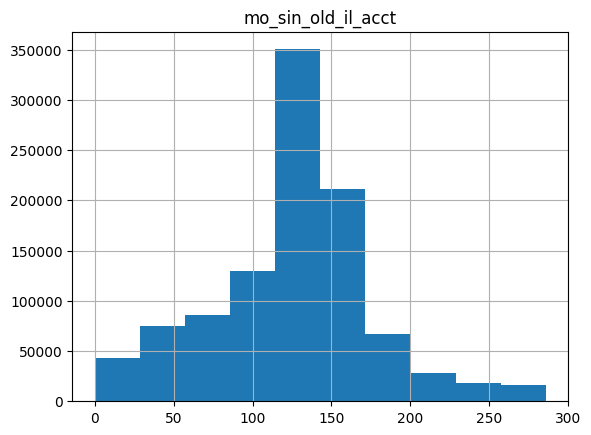

>>> Current breaks:
34.0,90.0,130.0,132.0,144.0,196.0 



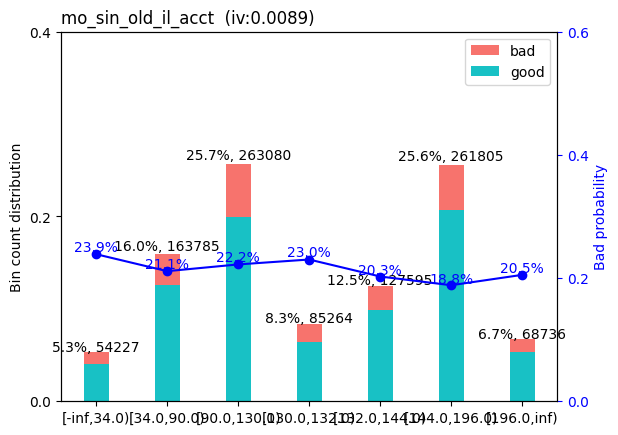

>>> Adjust breaks for (24/58) mo_sin_old_il_acct?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
34.0, 144.0, 130.0 



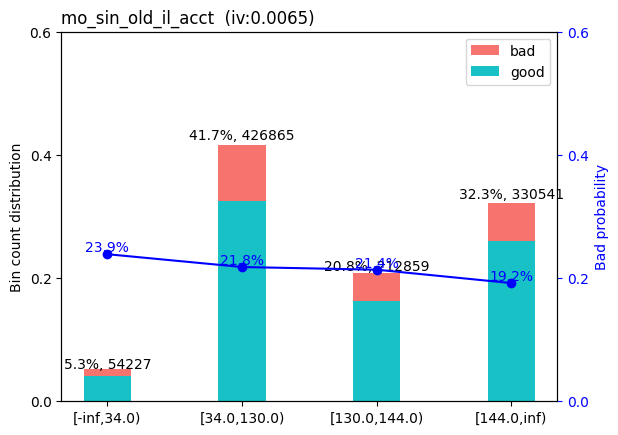

>>> Adjust breaks for (24/58) mo_sin_old_il_acct?
1: next 
2: yes 
3: back
-------- 25/58 acc_open_past_24mths --------
>>> dt[acc_open_past_24mths].describe(): 
count    1.024492e+06
mean     4.562509e+00
std      3.016010e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      1.423136e+01
Name: acc_open_past_24mths, dtype: float64 



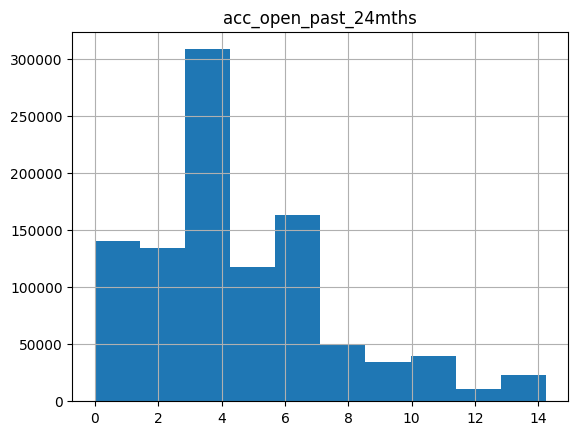

>>> Current breaks:
2.0,3.0,4.0,7.0,10.0 



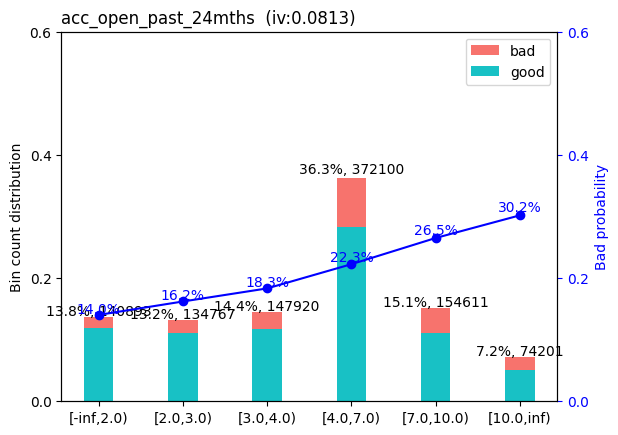

>>> Adjust breaks for (25/58) acc_open_past_24mths?
1: next 
2: yes 
3: back
-------- 26/58 avg_cur_bal --------
>>> dt[avg_cur_bal].describe(): 
count    1.024492e+06
mean     1.264357e+04
std      1.355939e+04
min      0.000000e+00
25%      3.118000e+03
50%      7.102000e+03
75%      1.786200e+04
max      6.176590e+04
Name: avg_cur_bal, dtype: float64 



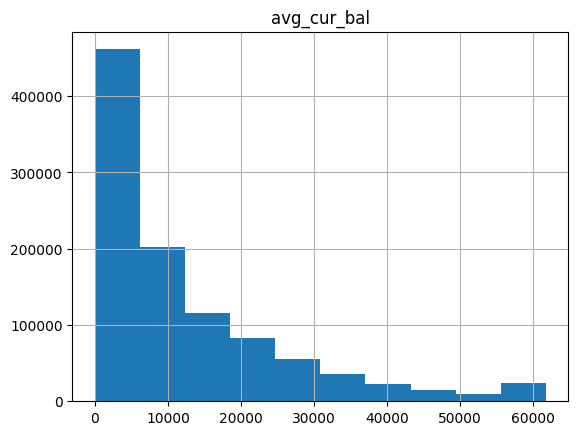

>>> Current breaks:
1500.0,8000.0,15000.0,22500.0,32000.0 



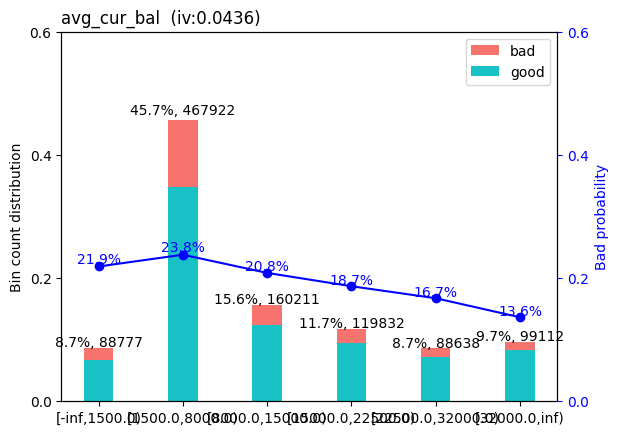

>>> Adjust breaks for (26/58) avg_cur_bal?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
15000.0, 32000.0, 22500.0, 8000.0 



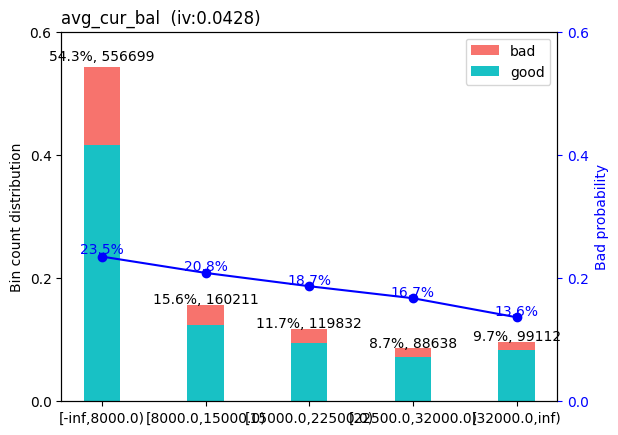

>>> Adjust breaks for (26/58) avg_cur_bal?
1: next 
2: yes 
3: back
-------- 27/58 fico_range_high --------
>>> dt[fico_range_high].describe(): 
count    1.024492e+06
mean     7.011544e+02
std      3.172582e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.190000e+02
max      7.987647e+02
Name: fico_range_high, dtype: float64 



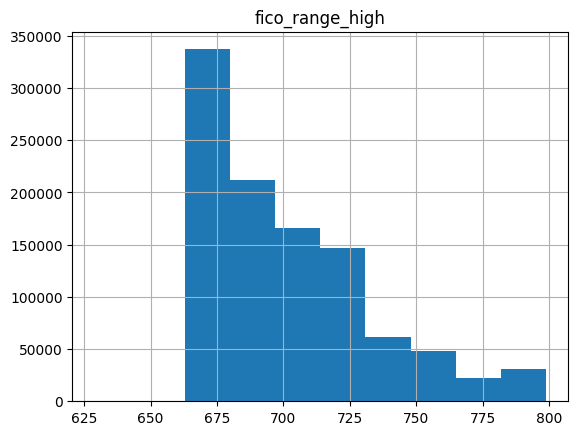

>>> Current breaks:
685.0,700.0,710.0,740.0 



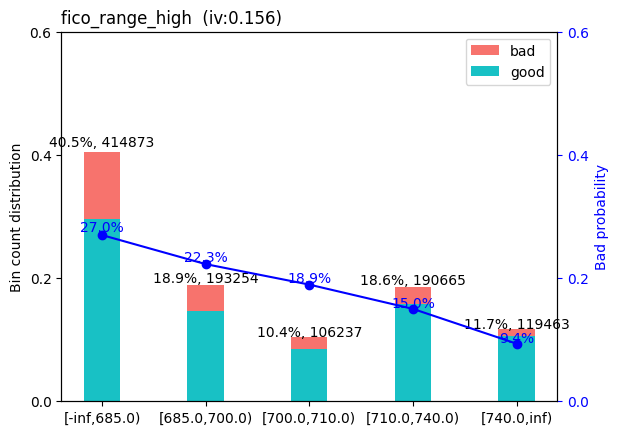

>>> Adjust breaks for (27/58) fico_range_high?
1: next 
2: yes 
3: back
-------- 28/58 mths_since_last_record --------
>>> dt[mths_since_last_record].describe(): 
count     1024492
unique          2
top         False
freq       857840
Name: mths_since_last_record, dtype: object 

>>> dt[mths_since_last_record].value_counts(): 
False    857840
True     166652
Name: mths_since_last_record, dtype: int64 

>>> Current breaks:
1.0 



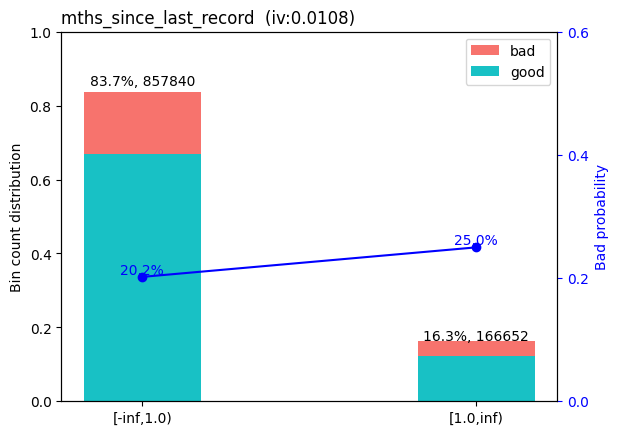

>>> Adjust breaks for (28/58) mths_since_last_record?
1: next 
2: yes 
3: back
-------- 29/58 open_acc --------
>>> dt[open_acc].describe(): 
count    1.024492e+06
mean     1.158074e+01
std      5.392123e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      2.858466e+01
Name: open_acc, dtype: float64 



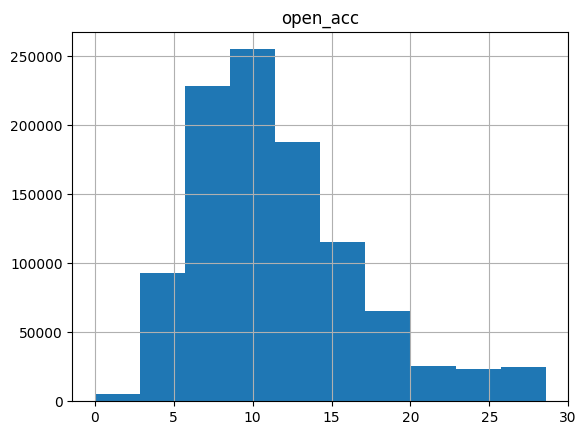

>>> Current breaks:
6.0,7.0,8.0,10.0 



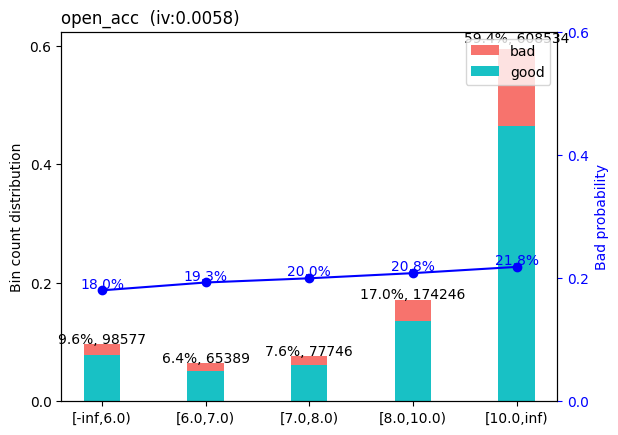

>>> Adjust breaks for (29/58) open_acc?
1: next 
2: yes 
3: back
-------- 30/58 bc_util --------
>>> dt[bc_util].describe(): 
count    1.024492e+06
mean     5.859213e+01
std      2.806567e+01
min      0.000000e+00
25%      3.710000e+01
50%      6.110000e+01
75%      8.300000e+01
max      1.441360e+02
Name: bc_util, dtype: float64 



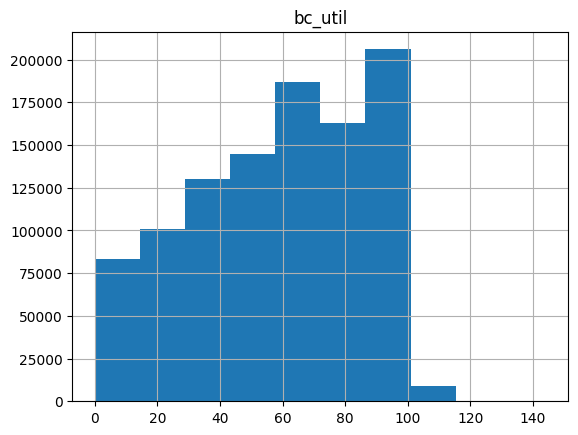

>>> Current breaks:
32.0,53.0,73.0,91.0 



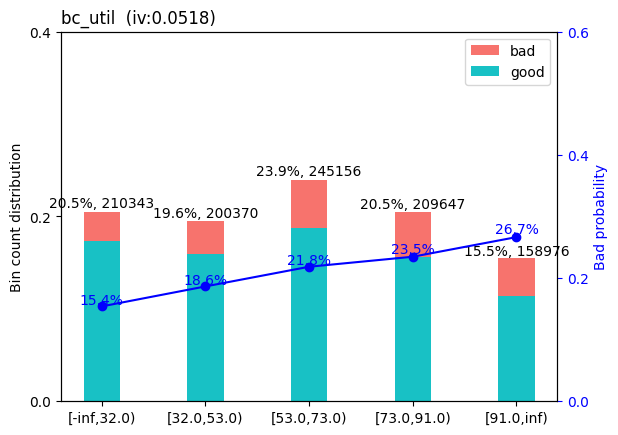

>>> Adjust breaks for (30/58) bc_util?
1: next 
2: yes 
3: back
-------- 31/58 bc_open_to_buy --------
>>> dt[bc_open_to_buy].describe(): 
count    1.024492e+06
mean     1.026994e+04
std      1.316477e+04
min      0.000000e+00
25%      1.721000e+03
50%      5.190000e+03
75%      1.311300e+04
max      5.961975e+04
Name: bc_open_to_buy, dtype: float64 



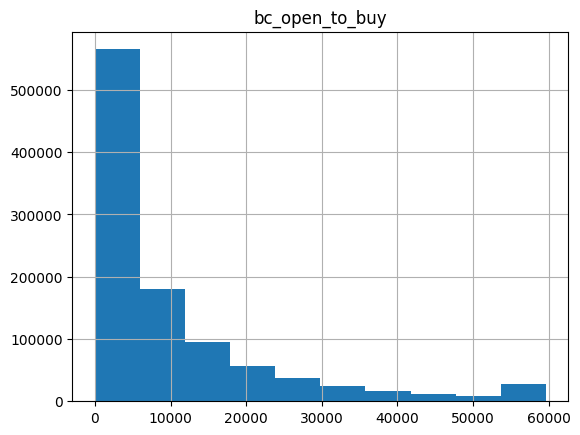

>>> Current breaks:
3000.0,5500.0,9000.0,17500.0,28500.0 



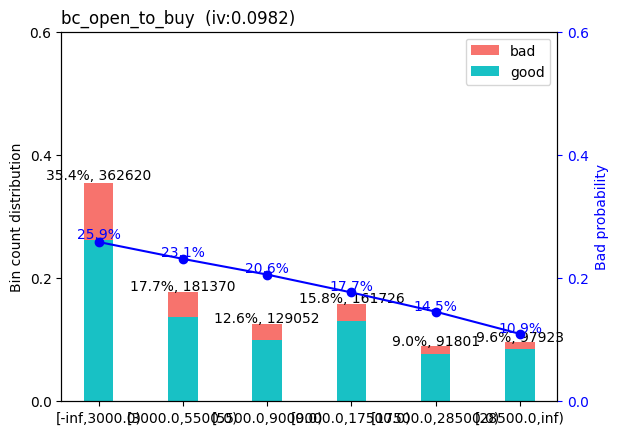

>>> Adjust breaks for (31/58) bc_open_to_buy?
1: next 
2: yes 
3: back
-------- 32/58 mths_since_recent_bc_dlq --------
>>> dt[mths_since_recent_bc_dlq].describe(): 
count     1024492
unique          2
top         False
freq       786291
Name: mths_since_recent_bc_dlq, dtype: object 

>>> dt[mths_since_recent_bc_dlq].value_counts(): 
False    786291
True     238201
Name: mths_since_recent_bc_dlq, dtype: int64 

>>> Current breaks:
1.0 



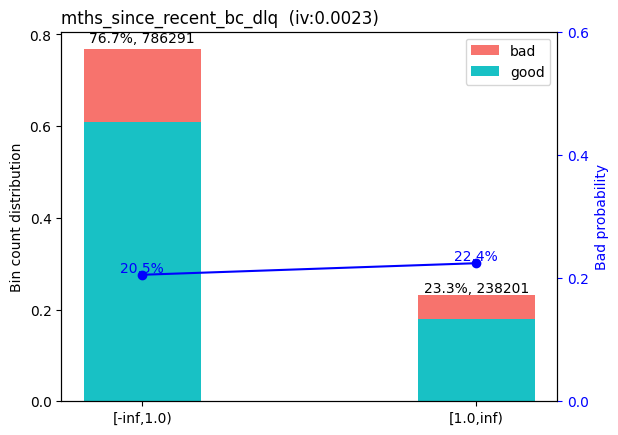

>>> Adjust breaks for (32/58) mths_since_recent_bc_dlq?
1: next 
2: yes 
3: back
-------- 33/58 mths_since_recent_revol_delinq --------
>>> dt[mths_since_recent_revol_delinq].describe(): 
count     1024492
unique          2
top         False
freq       685697
Name: mths_since_recent_revol_delinq, dtype: object 

>>> dt[mths_since_recent_revol_delinq].value_counts(): 
False    685697
True     338795
Name: mths_since_recent_revol_delinq, dtype: int64 

>>> Current breaks:
1.0 



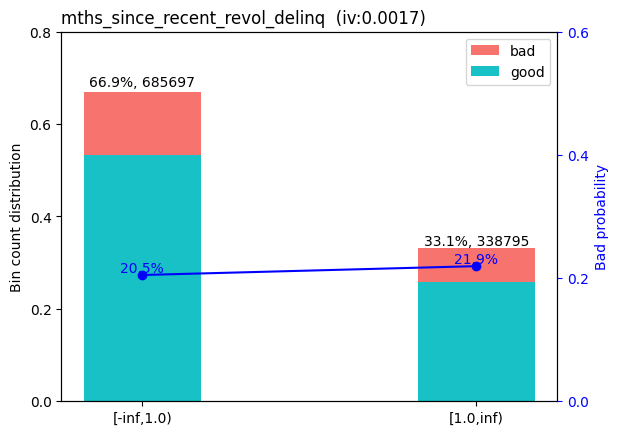

>>> Adjust breaks for (33/58) mths_since_recent_revol_delinq?
1: next 
2: yes 
3: back
-------- 34/58 application_type --------
>>> dt[application_type].describe(): 
count        1024492
unique             2
top       Individual
freq          971940
Name: application_type, dtype: object 

>>> dt[application_type].value_counts(): 
Individual    971940
Joint App      52552
Name: application_type, dtype: int64 

>>> Current breaks:
'Joint App','Individual' 



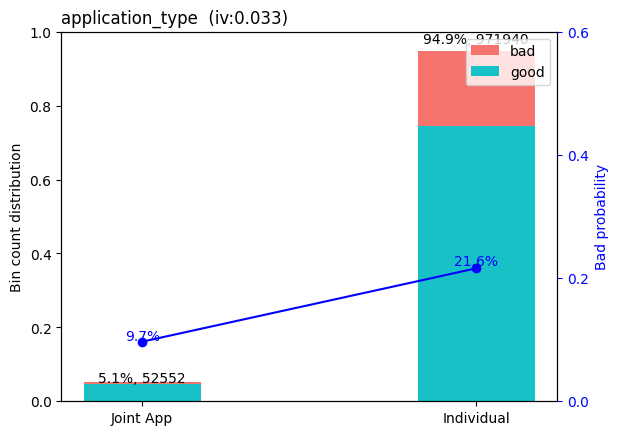

>>> Adjust breaks for (34/58) application_type?
1: next 
2: yes 
3: back
-------- 35/58 purpose --------
>>> dt[purpose].describe(): 
count                1024492
unique                    14
top       debt_consolidation
freq                  584897
Name: purpose, dtype: object 

>>> dt[purpose].value_counts(): 
debt_consolidation    584897
credit_card           229152
home_improvement       67319
other                  63344
major_purchase         22511
medical                12394
small_business         11912
car                    10631
moving                  7170
vacation                6947
house                   6358
wedding                 1025
renewable_energy         692
educational              140
Name: purpose, dtype: int64 

>>> Current breaks:
'car%,%credit_card','home_improvement%,%major_purchase%,%house','vacation%,%other','medical%,%wedding%,%debt_consolidation%,%moving%,%renewable_energy%,%small_business%,%educational' 



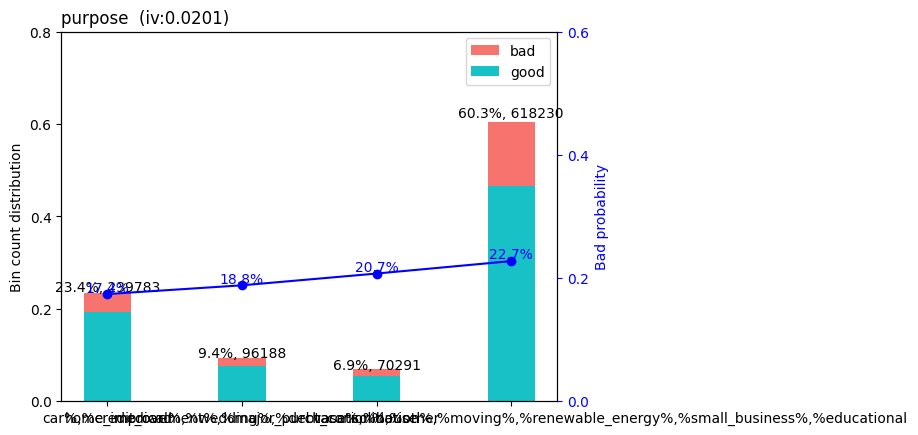

>>> Adjust breaks for (35/58) purpose?
1: next 
2: yes 
3: back
-------- 36/58 revol_bal --------
>>> dt[revol_bal].describe(): 
count    1.024492e+06
mean     1.566642e+04
std      1.499101e+04
min      0.000000e+00
25%      5.947000e+03
50%      1.127600e+04
75%      2.012000e+04
max      8.418141e+04
Name: revol_bal, dtype: float64 



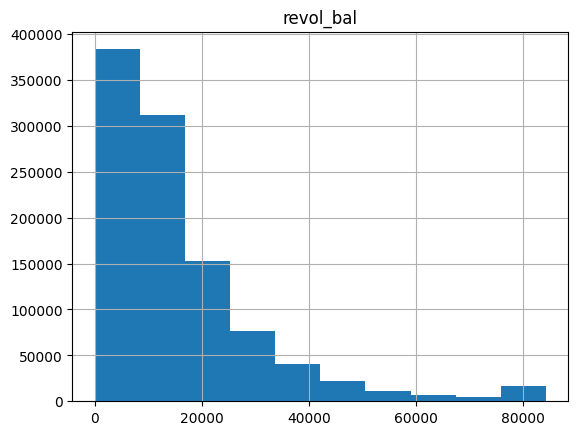

>>> Current breaks:
2000.0,5000.0,22000.0,26000.0,36000.0 



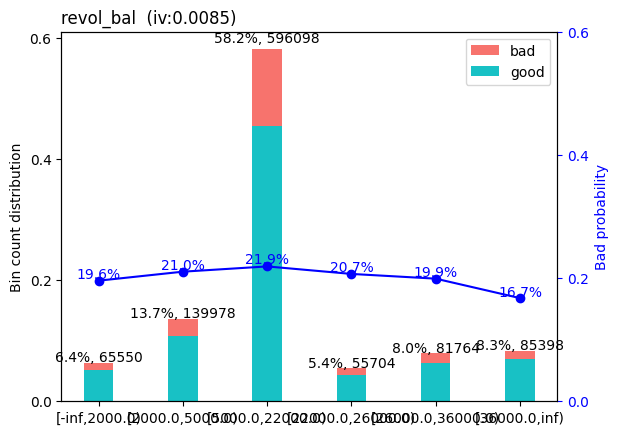

>>> Adjust breaks for (36/58) revol_bal?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
22000.0, 26000.0, 36000.0 



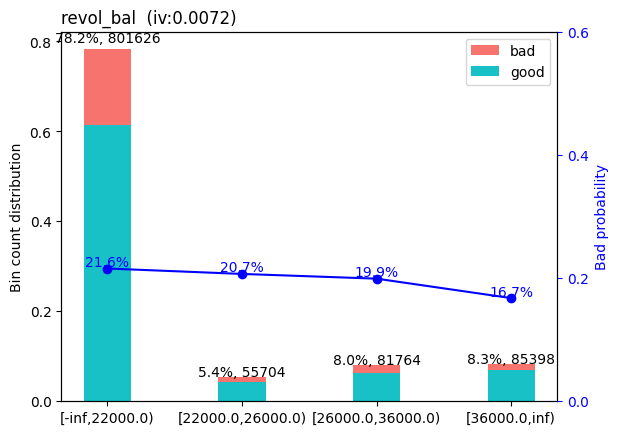

>>> Adjust breaks for (36/58) revol_bal?
1: next 
2: yes 
3: back
-------- 37/58 num_op_rev_tl --------
>>> dt[num_op_rev_tl].describe(): 
count    1.024492e+06
mean     8.183279e+00
std      4.370760e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.235578e+01
Name: num_op_rev_tl, dtype: float64 



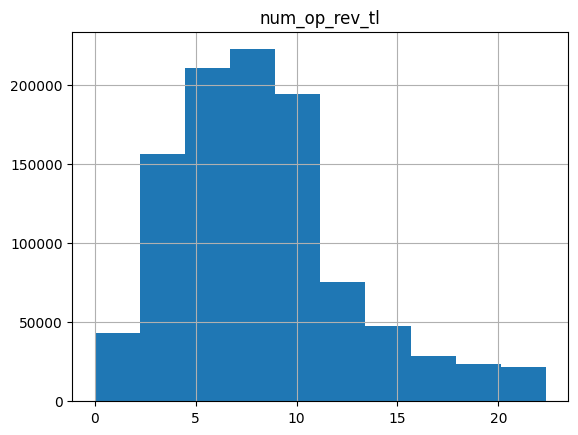

>>> Current breaks:
4.0,5.0,7.0,8.0,11.0 



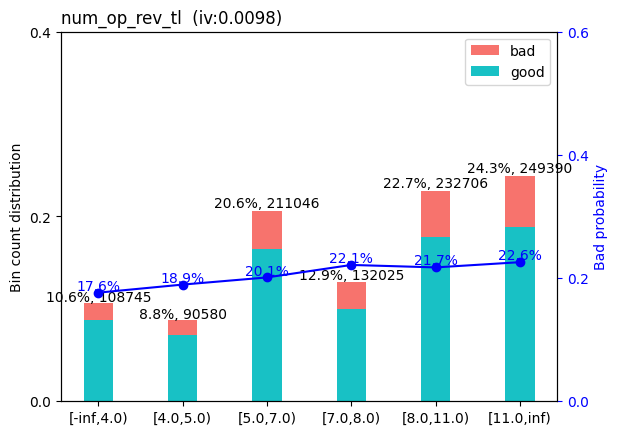

>>> Adjust breaks for (37/58) num_op_rev_tl?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
5.0, 7.0, 11.0, 4.0 



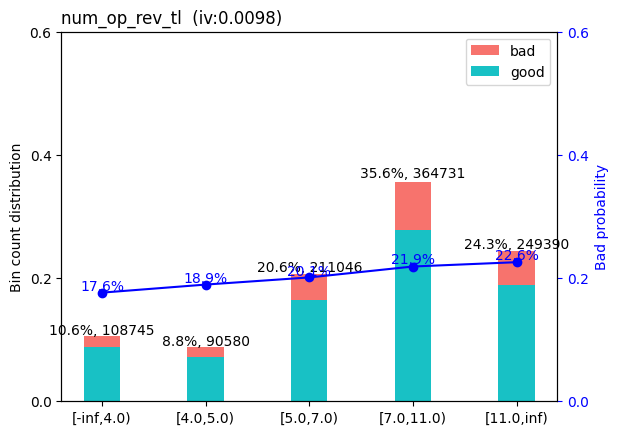

>>> Adjust breaks for (37/58) num_op_rev_tl?
1: next 
2: yes 
3: back
-------- 38/58 inq_last_6mths --------
>>> dt[inq_last_6mths].describe(): 
count    1.024492e+06
mean     5.822276e-01
std      8.410368e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.263241e+00
Name: inq_last_6mths, dtype: float64 

>>> dt[inq_last_6mths].value_counts(): 
0.000000    615779
1.000000    268956
2.000000     94816
3.000000     33254
3.263241     11687
Name: inq_last_6mths, dtype: int64 

>>> Current breaks:
1.0,2.0 



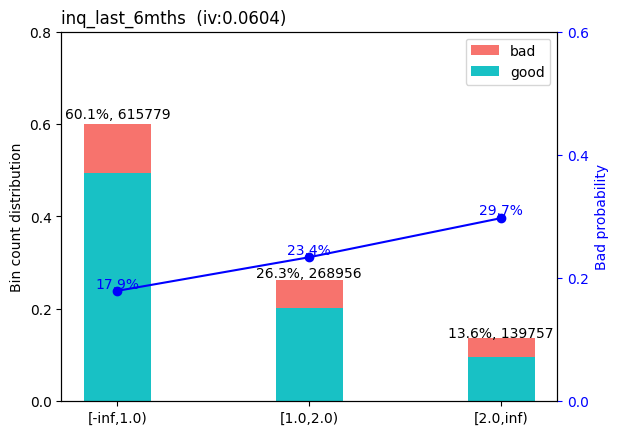

>>> Adjust breaks for (38/58) inq_last_6mths?
1: next 
2: yes 
3: back
-------- 39/58 home_ownership --------
>>> dt[home_ownership].describe(): 
count      1024492
unique           6
top       MORTGAGE
freq        495702
Name: home_ownership, dtype: object 

>>> dt[home_ownership].value_counts(): 
MORTGAGE    495702
RENT        413530
OWN         114757
ANY            430
OTHER           53
NONE            20
Name: home_ownership, dtype: int64 

>>> Current breaks:
'ANY%,%MORTGAGE','OWN','RENT%,%NONE%,%OTHER' 



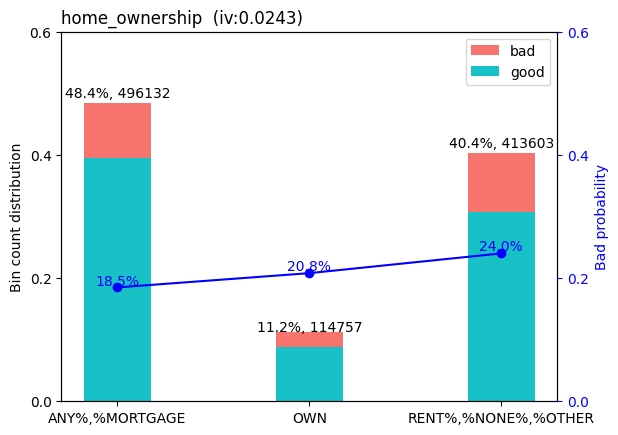

>>> Adjust breaks for (39/58) home_ownership?
1: next 
2: yes 
3: back
-------- 40/58 unsecure_flag --------
>>> dt[unsecure_flag].describe(): 
count     1024492
unique          2
top         False
freq       619101
Name: unsecure_flag, dtype: object 

>>> dt[unsecure_flag].value_counts(): 
False    619101
True     405391
Name: unsecure_flag, dtype: int64 

>>> Current breaks:
1.0 



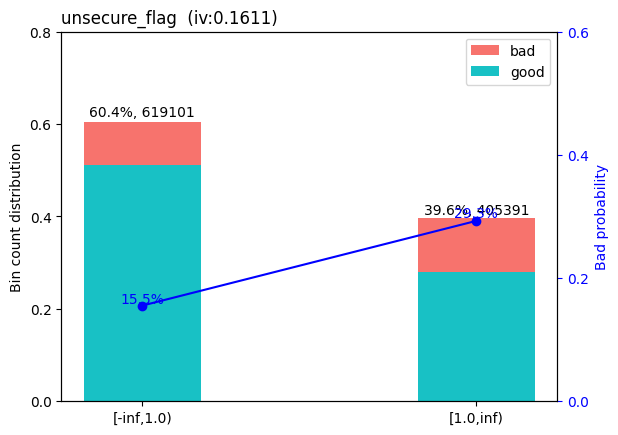

>>> Adjust breaks for (40/58) unsecure_flag?
1: next 
2: yes 
3: back
-------- 41/58 fico_range_low --------
>>> dt[fico_range_low].describe(): 
count    1.024492e+06
mean     6.971544e+02
std      3.172569e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.150000e+02
max      7.947621e+02
Name: fico_range_low, dtype: float64 



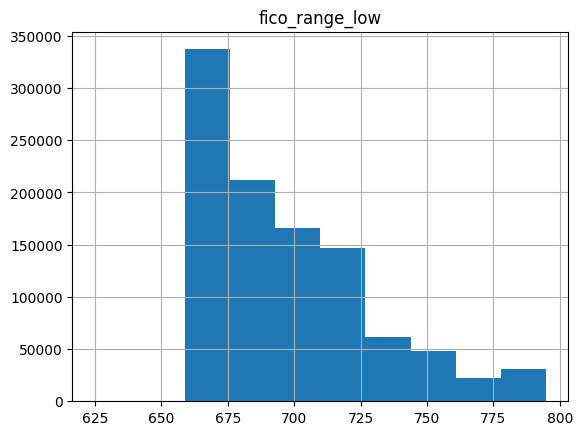

>>> Current breaks:
685.0,700.0,710.0,740.0 



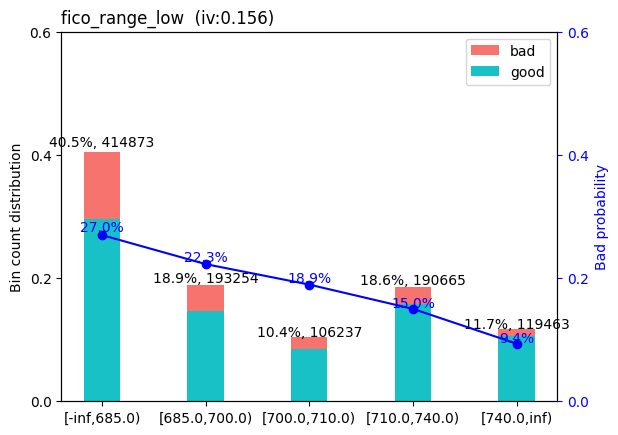

>>> Adjust breaks for (41/58) fico_range_low?
1: next 
2: yes 
3: back
-------- 42/58 total_il_high_credit_limit --------
>>> dt[total_il_high_credit_limit].describe(): 
count    1.024492e+06
mean     4.211757e+04
std      3.843355e+04
min      0.000000e+00
25%      1.545300e+04
50%      3.262600e+04
75%      5.736100e+04
max      1.778858e+05
Name: total_il_high_credit_limit, dtype: float64 



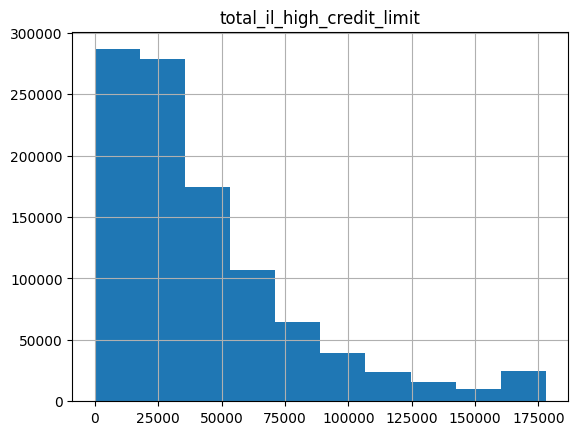

>>> Current breaks:
2000.0,10000.0,32000.0,34000.0,50000.0,90000.0,122000.0 



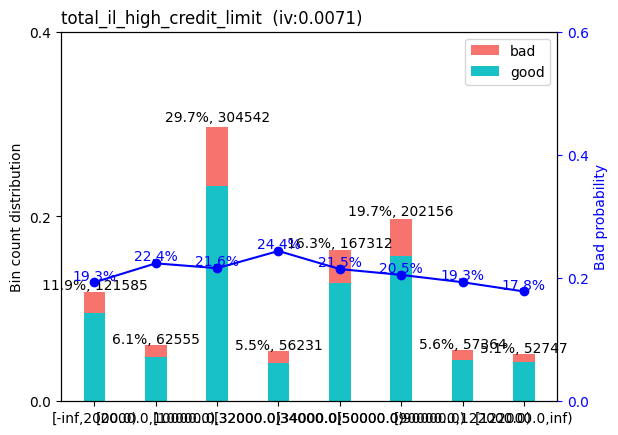

>>> Adjust breaks for (42/58) total_il_high_credit_limit?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
50000.0, 90000.0, 122000.0 



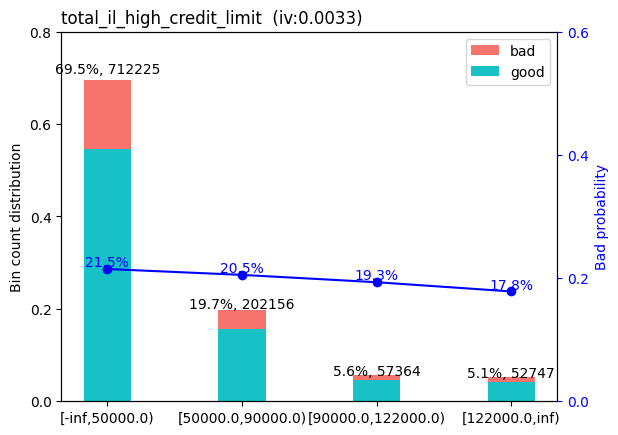

>>> Adjust breaks for (42/58) total_il_high_credit_limit?
1: next 
2: yes 
3: back
-------- 43/58 tot_coll_amt --------
>>> dt[tot_coll_amt].describe(): 
count     1024492
unique          2
top         False
freq       840168
Name: tot_coll_amt, dtype: object 

>>> dt[tot_coll_amt].value_counts(): 
False    840168
True     184324
Name: tot_coll_amt, dtype: int64 

>>> Current breaks:
1.0 



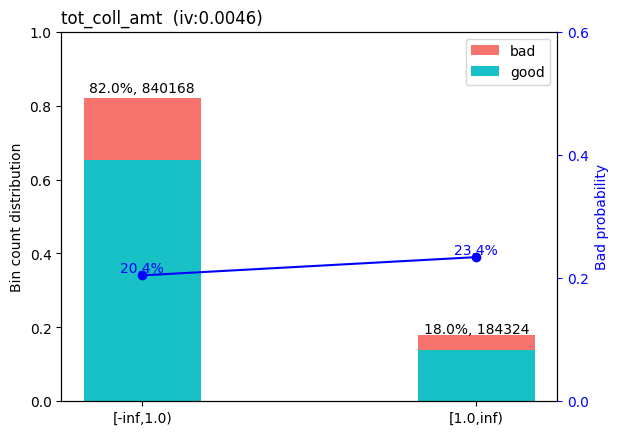

>>> Adjust breaks for (43/58) tot_coll_amt?
1: next 
2: yes 
3: back
-------- 44/58 num_actv_bc_tl --------
>>> dt[num_actv_bc_tl].describe(): 
count    1.024492e+06
mean     3.640662e+00
std      2.175767e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      1.068854e+01
Name: num_actv_bc_tl, dtype: float64 



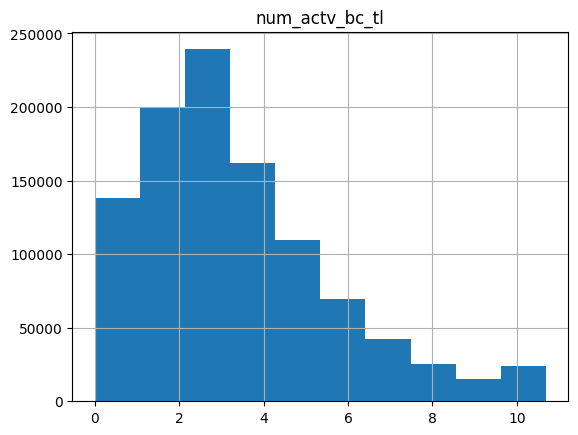

>>> Current breaks:
3.0,5.0,7.0 



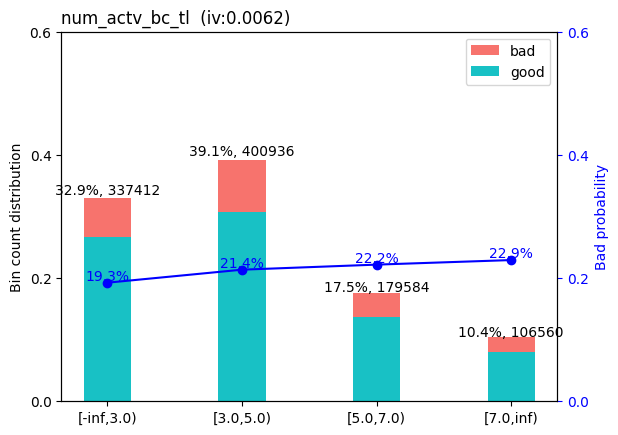

>>> Adjust breaks for (44/58) num_actv_bc_tl?
1: next 
2: yes 
3: back
-------- 45/58 loan_amnt --------
>>> dt[loan_amnt].describe(): 
count    1.024492e+06
mean     1.513076e+04
std      9.163514e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64 



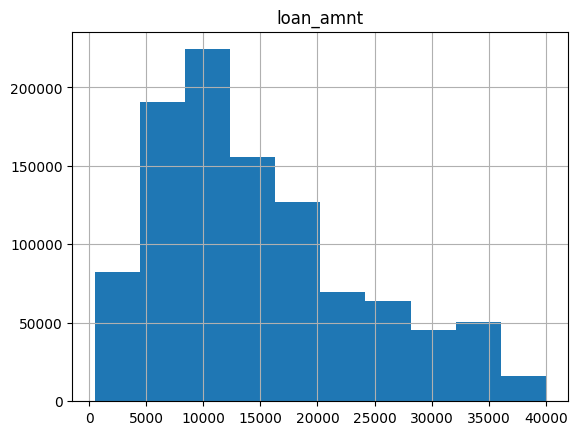

>>> Current breaks:
3500.0,6500.0,10000.0,10500.0,20500.0,25000.0,35000.0 



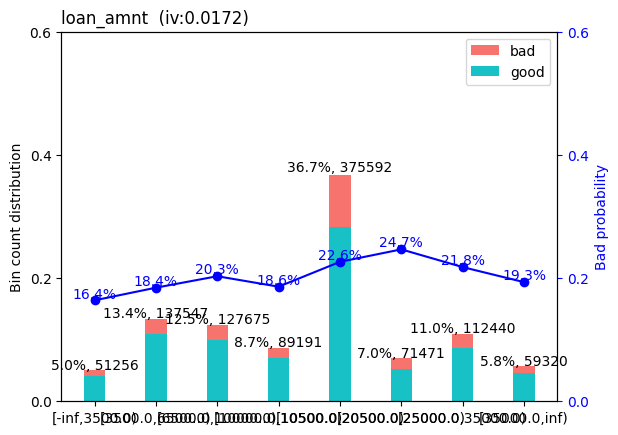

>>> Adjust breaks for (45/58) loan_amnt?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
6500.0, 20500.0, 3500.0, 10000.0 



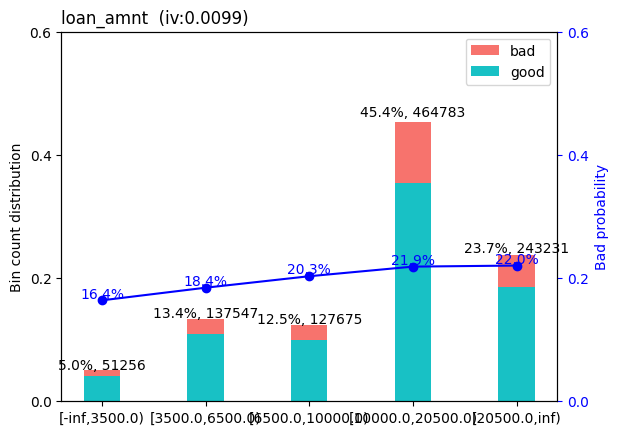

>>> Adjust breaks for (45/58) loan_amnt?
1: next 
2: yes 
3: back
-------- 46/58 num_bc_sats --------
>>> dt[num_bc_sats].describe(): 
count    1.024492e+06
mean     4.709445e+00
std      2.795223e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      1.389567e+01
Name: num_bc_sats, dtype: float64 



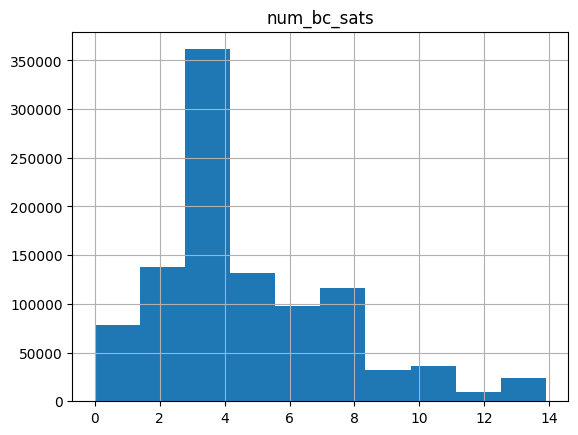

>>> Current breaks:
2.0,3.0,4.0,5.0,10.0 



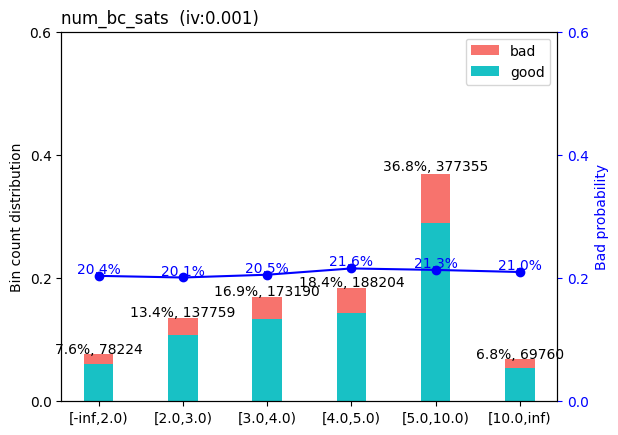

>>> Adjust breaks for (46/58) num_bc_sats?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
3.0, 4.0 



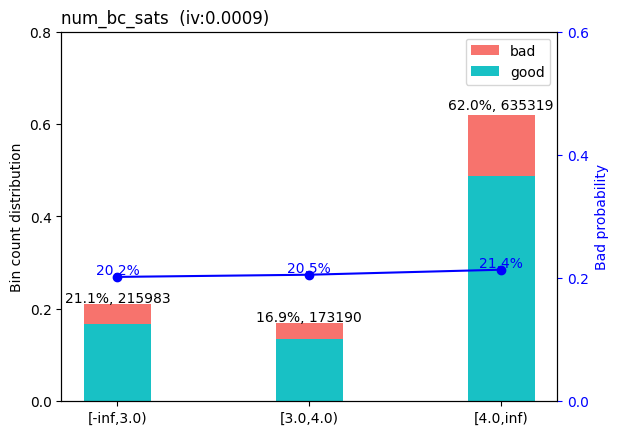

>>> Adjust breaks for (46/58) num_bc_sats?
1: next 
2: yes 
3: back
-------- 47/58 num_sats --------
>>> dt[num_sats].describe(): 
count    1.024492e+06
mean     1.158037e+01
std      5.329238e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      2.860811e+01
Name: num_sats, dtype: float64 



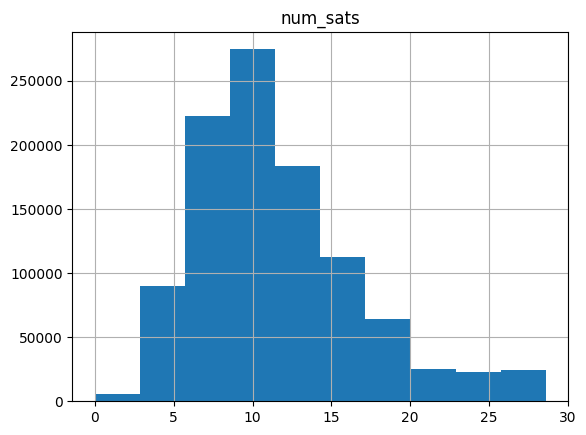

>>> Current breaks:
6.0,8.0,10.0,11.0,12.0 



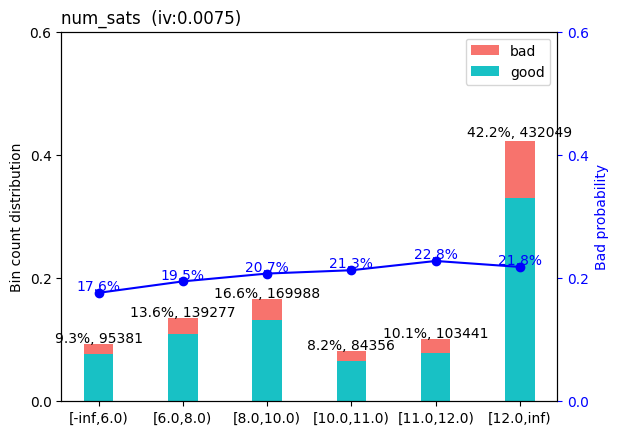

>>> Adjust breaks for (47/58) num_sats?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
6.0, 8.0, 10.0, 11.0 



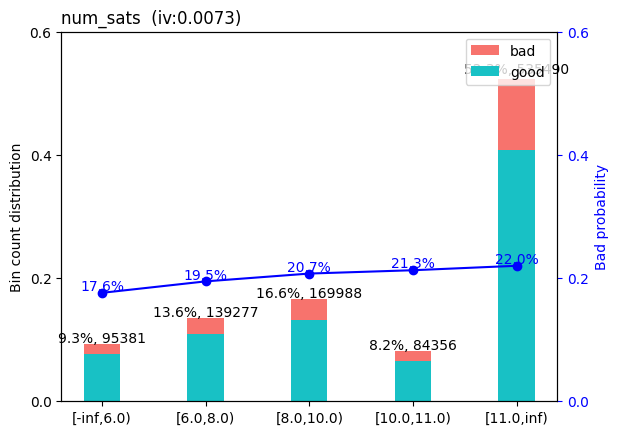

>>> Adjust breaks for (47/58) num_sats?
1: next 
2: yes 
3: back
-------- 48/58 dti --------
>>> dt[dti].describe(): 
count    1.024492e+06
mean     1.875223e+01
std      9.209024e+00
min      0.000000e+00
25%      1.206000e+01
50%      1.805000e+01
75%      2.471000e+01
max      6.096543e+01
Name: dti, dtype: float64 



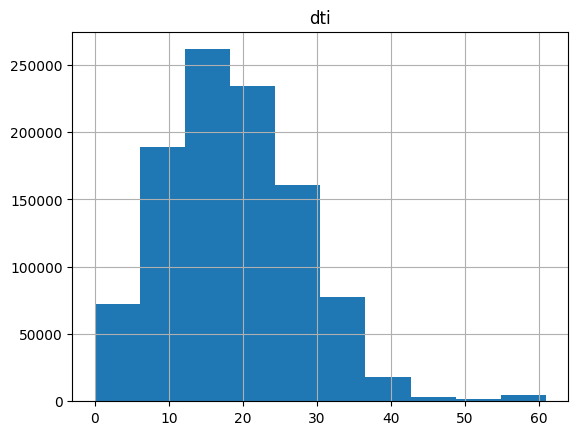

>>> Current breaks:
11.0,14.5,18.5,21.0,24.5 



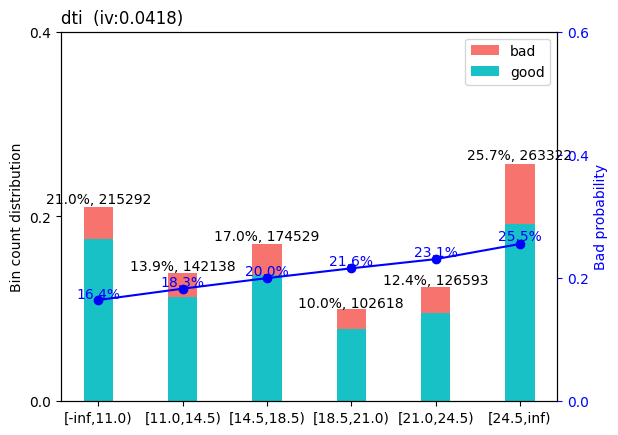

>>> Adjust breaks for (48/58) dti?
1: next 
2: yes 
3: back
-------- 49/58 pct_tl_nvr_dlq --------
>>> dt[pct_tl_nvr_dlq].describe(): 
count    1.024492e+06
mean     9.426170e+01
std      8.951462e+00
min      0.000000e+00
25%      9.170000e+01
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
Name: pct_tl_nvr_dlq, dtype: float64 



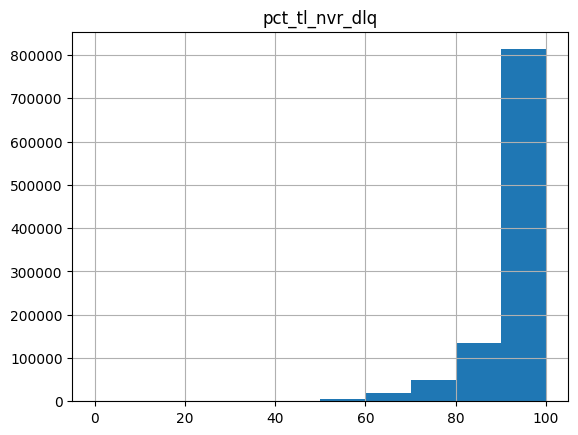

>>> Current breaks:
75.5,96.5,99.5 



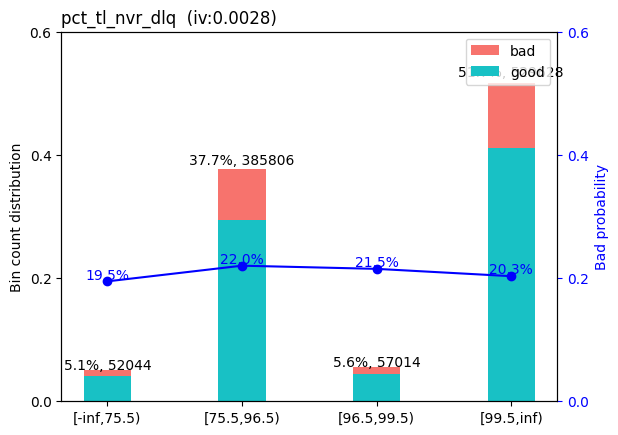

>>> Adjust breaks for (49/58) pct_tl_nvr_dlq?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
99.5, 96.5 



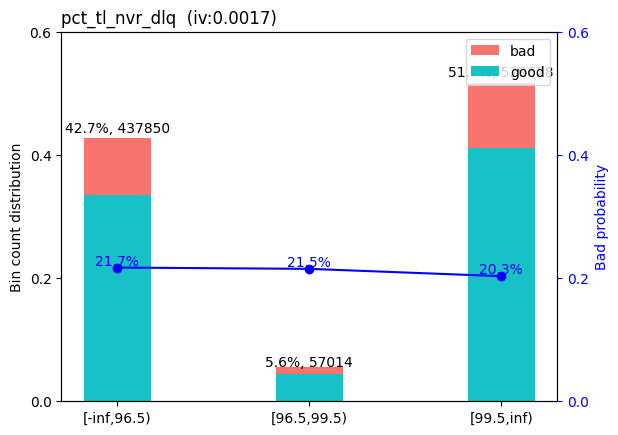

>>> Adjust breaks for (49/58) pct_tl_nvr_dlq?
1: next 
2: yes 
3: back
-------- 50/58 tot_cur_bal --------
>>> dt[tot_cur_bal].describe(): 
count    1.024492e+06
mean     1.349207e+05
std      1.403180e+05
min      0.000000e+00
25%      2.966700e+04
50%      7.632600e+04
75%      2.039760e+05
max      6.154209e+05
Name: tot_cur_bal, dtype: float64 



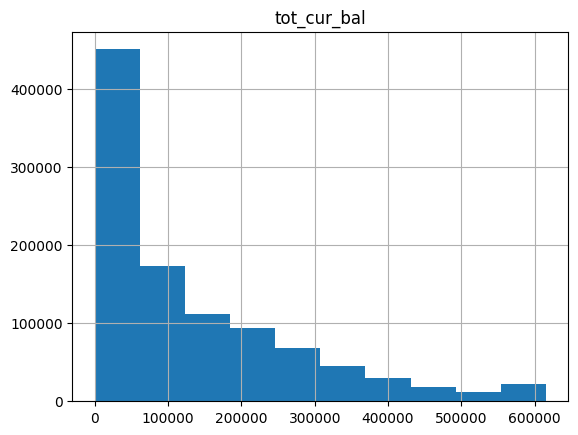

>>> Current breaks:
10000.0,20000.0,100000.0,195000.0,285000.0,430000.0 



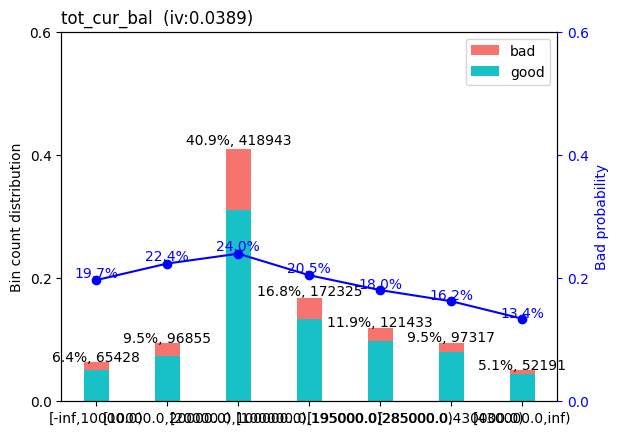

>>> Adjust breaks for (50/58) tot_cur_bal?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
285000.0, 100000.0, 430000.0, 195000.0 



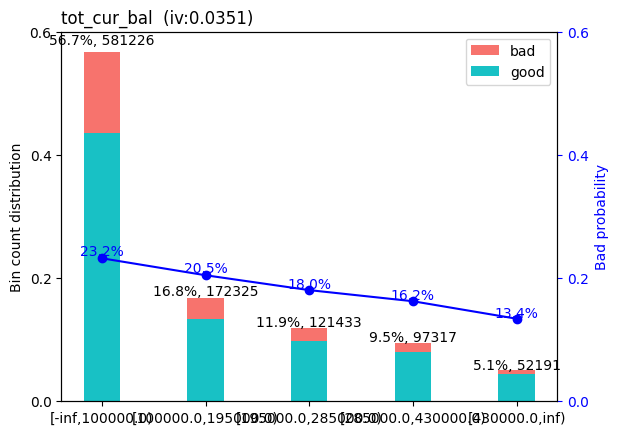

>>> Adjust breaks for (50/58) tot_cur_bal?
1: next 
2: yes 
3: back
-------- 51/58 mo_sin_old_rev_tl_op --------
>>> dt[mo_sin_old_rev_tl_op].describe(): 
count    1.024492e+06
mean     1.792032e+02
std      9.317740e+01
min      1.000000e+00
25%      1.170000e+02
50%      1.630000e+02
75%      2.280000e+02
max      4.709482e+02
Name: mo_sin_old_rev_tl_op, dtype: float64 



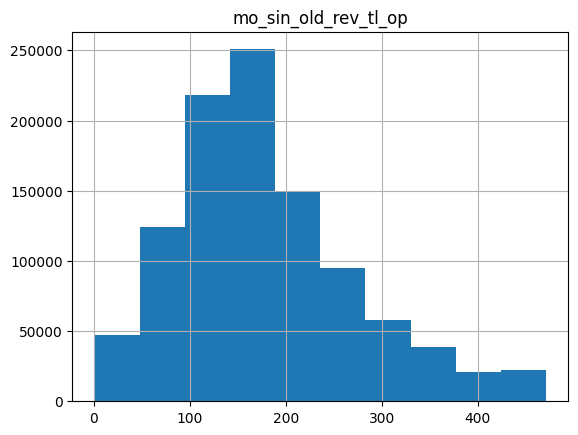

>>> Current breaks:
50.0,90.0,125.0,160.0,165.0,195.0,255.0 



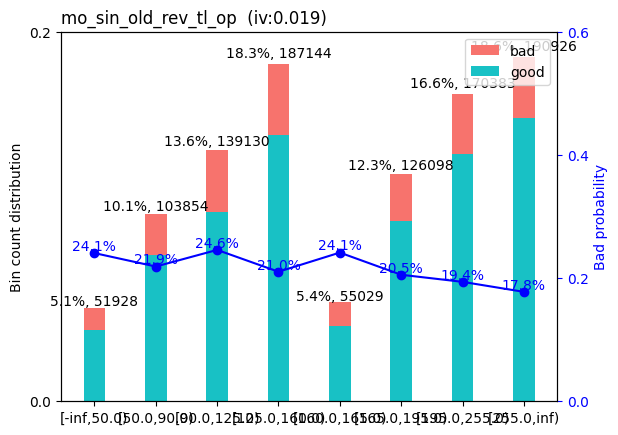

>>> Adjust breaks for (51/58) mo_sin_old_rev_tl_op?
1: next 
2: yes 
3: back
>>> Adjust breaks for (51/58) mo_sin_old_rev_tl_op?
1: next 
2: yes 
3: back
>>> Adjust breaks for (51/58) mo_sin_old_rev_tl_op?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
165.0, 125.0, 195.0, 255.0, 50.0 



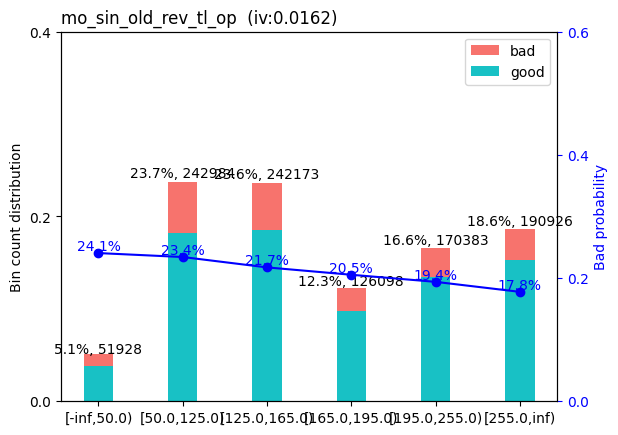

>>> Adjust breaks for (51/58) mo_sin_old_rev_tl_op?
1: next 
2: yes 
3: back
-------- 52/58 num_rev_tl_bal_gt_0 --------
>>> dt[num_rev_tl_bal_gt_0].describe(): 
count    1.024492e+06
mean     5.567228e+00
std      3.094106e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      1.557123e+01
Name: num_rev_tl_bal_gt_0, dtype: float64 



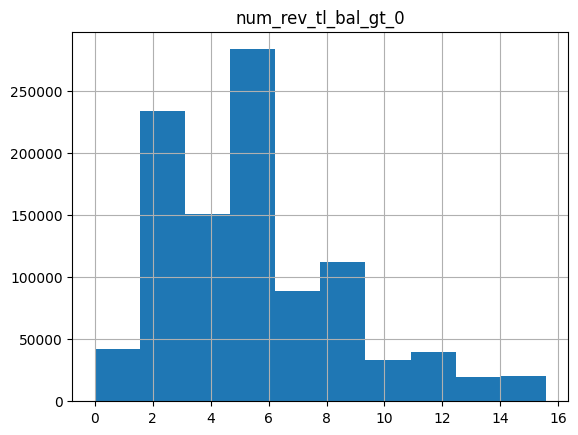

>>> Current breaks:
3.0,5.0,8.0,12.0 



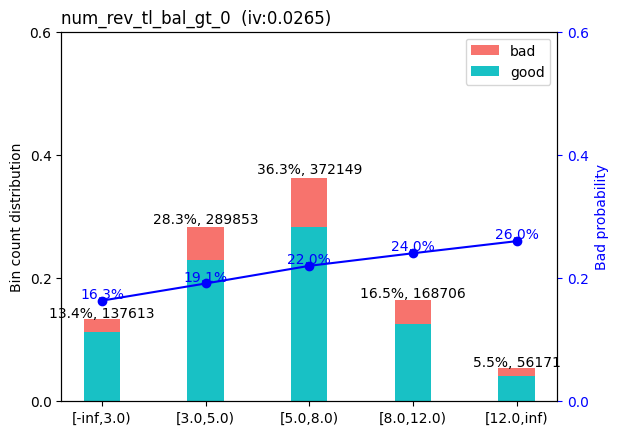

>>> Adjust breaks for (52/58) num_rev_tl_bal_gt_0?
1: next 
2: yes 
3: back
-------- 53/58 num_accts_ever_120_pd --------
>>> dt[num_accts_ever_120_pd].describe(): 
count    1.024492e+06
mean     4.342294e-01
std      9.919536e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.562961e+00
Name: num_accts_ever_120_pd, dtype: float64 

>>> dt[num_accts_ever_120_pd].value_counts(): 
0.000000    793051
1.000000    124531
2.000000     48733
4.562961     22539
3.000000     22529
4.000000     13109
Name: num_accts_ever_120_pd, dtype: int64 

>>> Current breaks:
1.0,3.0 



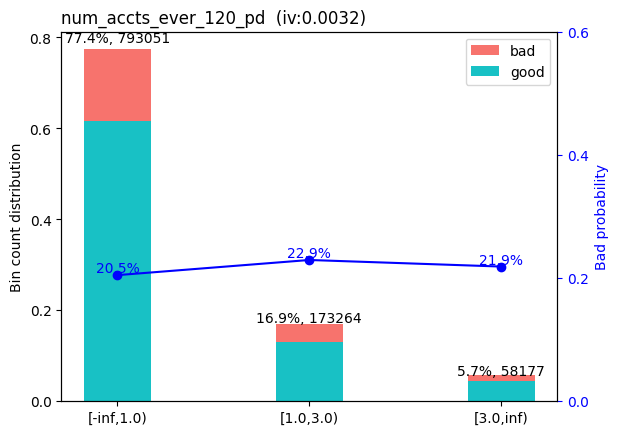

>>> Adjust breaks for (53/58) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
1.0 



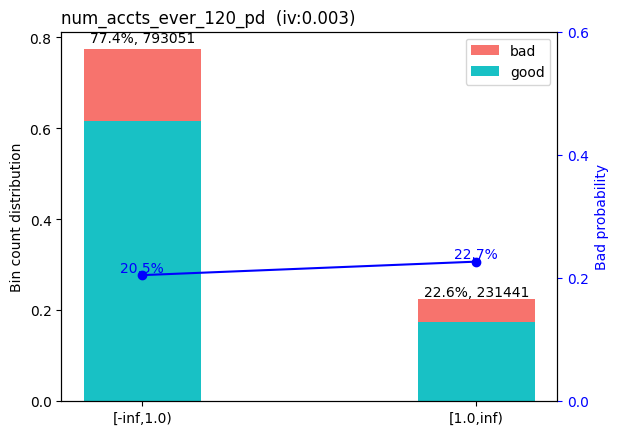

>>> Adjust breaks for (53/58) num_accts_ever_120_pd?
1: next 
2: yes 
3: back
-------- 54/58 installment --------
>>> dt[installment].describe(): 
count    1.024492e+06
mean     4.482438e+02
std      2.656541e+02
min      1.608000e+01
25%      2.550400e+02
50%      3.814400e+02
75%      5.952800e+02
max      1.250771e+03
Name: installment, dtype: float64 



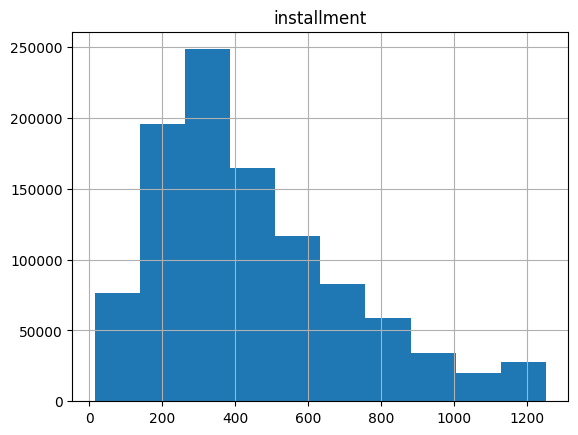

>>> Current breaks:
160.0,260.0,300.0,330.0,450.0,510.0,600.0 



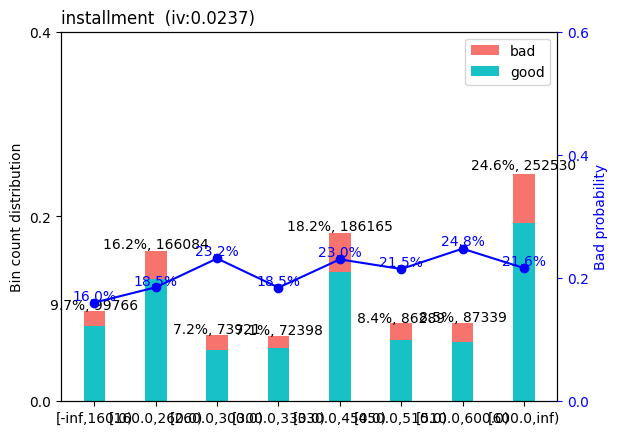

>>> Adjust breaks for (54/58) installment?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
260.0, 330.0, 510.0, 160.0 



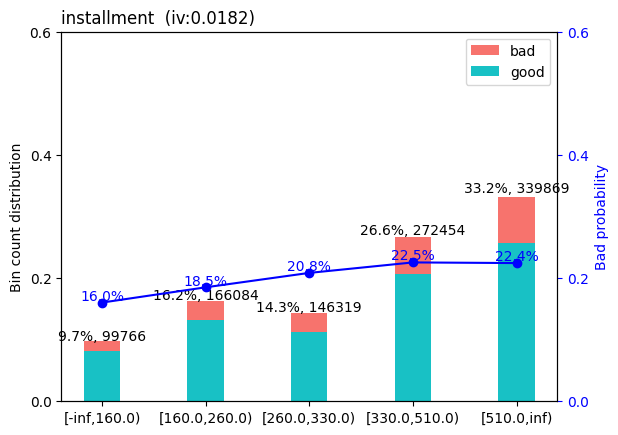

>>> Adjust breaks for (54/58) installment?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
260.0, 330.0, 160.0 



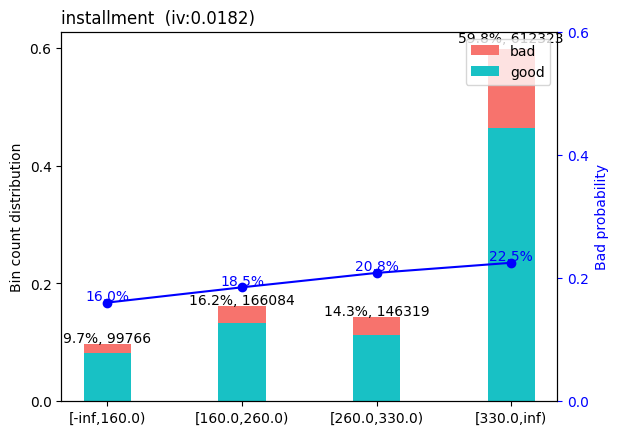

>>> Adjust breaks for (54/58) installment?
1: next 
2: yes 
3: back
-------- 55/58 log_loan_to_credit_limit --------
>>> dt[log_loan_to_credit_limit].describe(): 
count    1.024492e+06
mean     2.328272e+00
std      8.921153e-01
min      0.000000e+00
25%      1.639899e+00
50%      2.291118e+00
75%      2.934699e+00
max      5.019339e+00
Name: log_loan_to_credit_limit, dtype: float64 



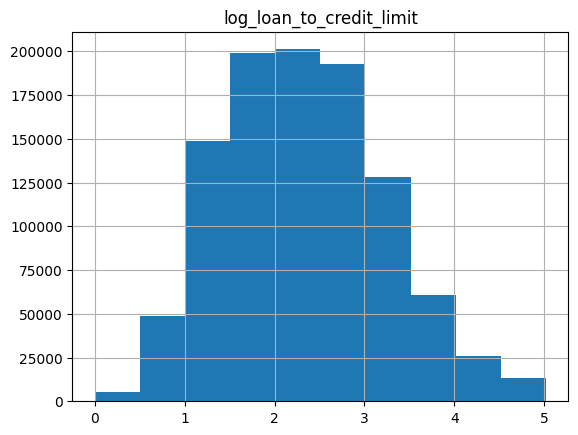

>>> Current breaks:
1.8,2.4000000000000004,2.75,3.2,3.6500000000000004 



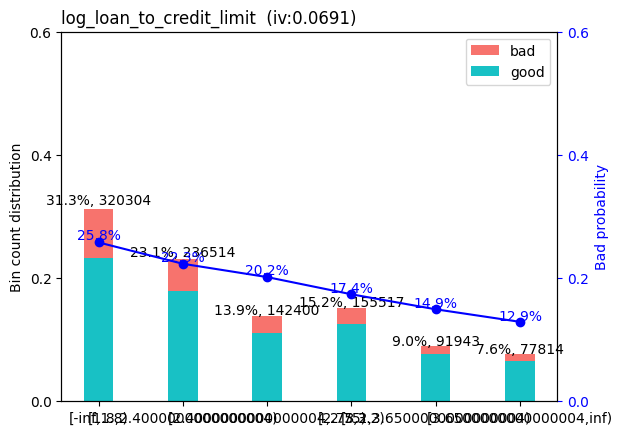

>>> Adjust breaks for (55/58) log_loan_to_credit_limit?
1: next 
2: yes 
3: back
-------- 56/58 tot_hi_cred_lim --------
>>> dt[tot_hi_cred_lim].describe(): 
count    1.024492e+06
mean     1.694388e+05
std      1.573754e+05
min      0.000000e+00
25%      5.108700e+04
50%      1.104910e+05
75%      2.468562e+05
max      7.126337e+05
Name: tot_hi_cred_lim, dtype: float64 



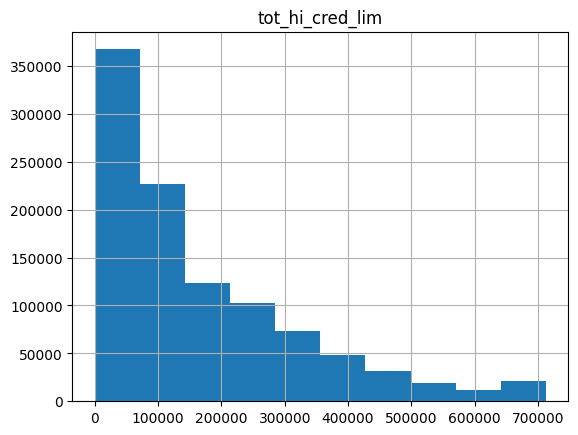

>>> Current breaks:
120000.0,200000.0,280000.0,360000.0,480000.0 



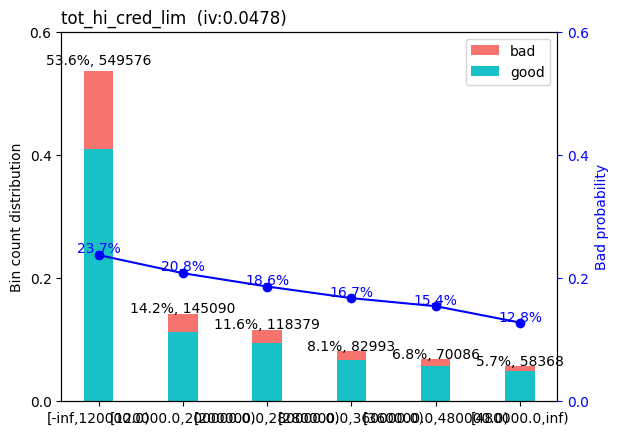

>>> Adjust breaks for (56/58) tot_hi_cred_lim?
1: next 
2: yes 
3: back
-------- 57/58 num_il_tl --------
>>> dt[num_il_tl].describe(): 
count    1.024492e+06
mean     8.220462e+00
std      6.671883e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      3.061792e+01
Name: num_il_tl, dtype: float64 



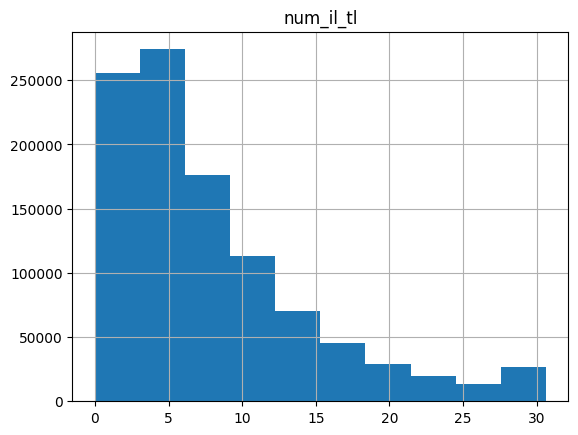

>>> Current breaks:
6.0,7.0,8.0,11.0,23.0 



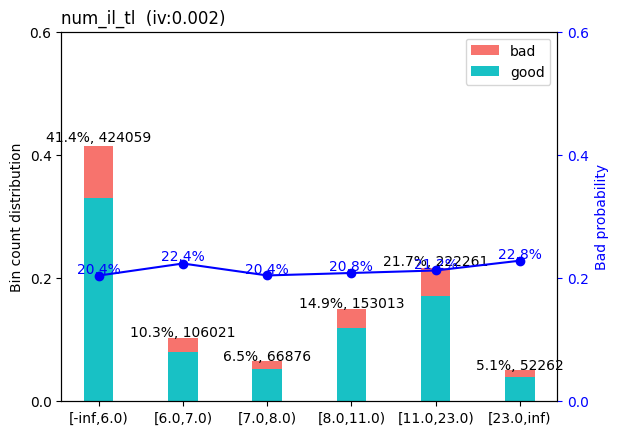

>>> Adjust breaks for (57/58) num_il_tl?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
23.0, 8.0, 11.0 



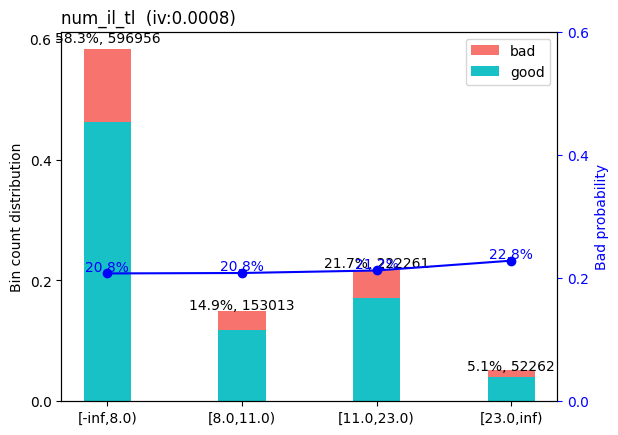

>>> Adjust breaks for (57/58) num_il_tl?
1: next 
2: yes 
3: back
[INFO] creating woe binning ...
>>> Current breaks:
23.0, 11.0 



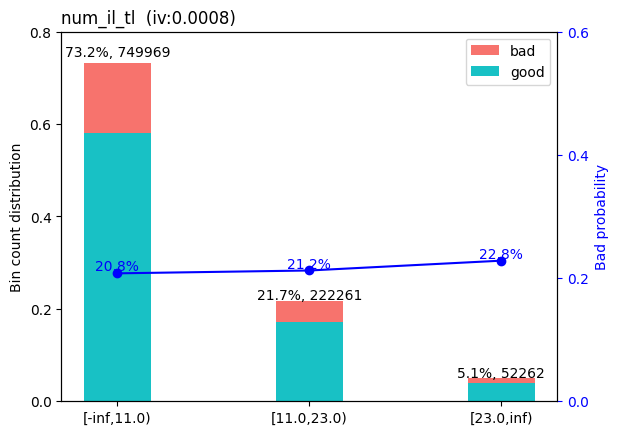

>>> Adjust breaks for (57/58) num_il_tl?
1: next 
2: yes 
3: back
-------- 58/58 delinq_2yrs --------
>>> dt[delinq_2yrs].describe(): 
count    1.024492e+06
mean     2.777002e-01
std      6.532476e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.942068e+00
Name: delinq_2yrs, dtype: float64 

>>> dt[delinq_2yrs].value_counts(): 
0.000000    830753
1.000000    128806
2.000000     37515
2.942068     27418
Name: delinq_2yrs, dtype: int64 

>>> Current breaks:
1.0,2.0 



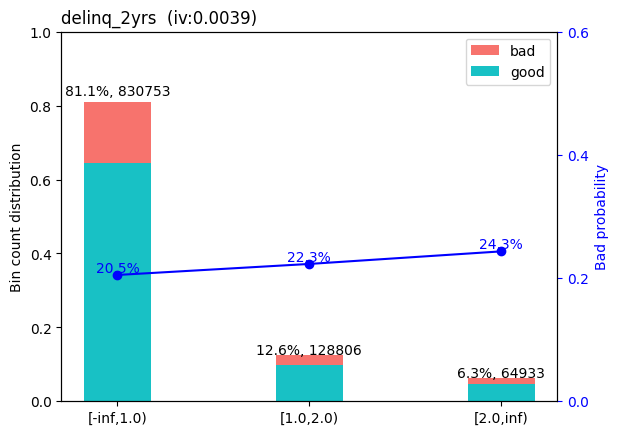

>>> Adjust breaks for (58/58) delinq_2yrs?
1: next 
2: yes 
3: back


In [19]:
breaks_adj = sc.woebin_adj(train, "loan_status", bins, adj_all_var=True)

In [20]:
pickle.dump(breaks_adj, open('Q2_breaks.pkl', 'wb'))

In [21]:
bins_adj = sc.woebin(train, y="loan_status", breaks_list=breaks_adj) # Apply new cuts
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...
Binning on 1024492 rows and 59 columns in 00:01:04
[INFO] converting into woe values ...
Woe transformating on 1024492 rows and 58 columns in 00:00:55
[INFO] converting into woe values ...
Woe transformating on 256123 rows and 58 columns in 00:00:17


# Q2 Part 1: WoE Complete

In [22]:
pickle.dump(train_woe, open('Q2_train_woe.pkl', 'wb'))
pickle.dump(test_woe, open('Q2_test_woe.pkl', 'wb'))

# Q2 Part 2: Information Value Filtering

- $IV < 0.02$: No predictive ability, remove.
- $0.02 \le IV < 0.1$: Small predictive ability, suggest to remove.
- $0.1 \le IV < 0.3$: Medium predictive ability, leave.
- $0.3 \le IV < 1$: Good predictive ability, leave.
- $1 \le IV $: Strong predictive ability. Suspicious variable. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [23]:
iv_train = sc.iv(train_woe, 'loan_status')

In [32]:
iv_train

variable  info_value
8                    unsecure_flag_woe    0.161072
0                   fico_range_low_woe    0.155970
17                 fico_range_high_woe    0.155970
11                  bc_open_to_buy_woe    0.098157
29        log_annul_inc_over_inst2_woe    0.081793
44            acc_open_past_24mths_woe    0.081268
2         log_loan_to_credit_limit_woe    0.069148
30                  total_bc_limit_woe    0.068920
21                            term_woe    0.060708
7                   inq_last_6mths_woe    0.060442
54                percent_bc_gt_75_woe    0.059761
15                         bc_util_woe    0.051775
9          avg_mths_since_rcnt_acc_woe    0.047964
35                 tot_hi_cred_lim_woe    0.047758
50                  mo_sin_rcnt_tl_woe    0.046595
27                      revol_util_woe    0.044752
47           mo_sin_rcnt_rev_tl_op_woe    0.044635
3                      avg_cur_bal_woe    0.042767
14                             dti_woe    0.041842
46           mths_since_recent_inq_woe    0.037974
39                     tot_cur_bal_woe    0.035114
49                      annual_inc_woe    0.035018
45                application_type_woe    0.032997
32            mths_since_recent_bc_woe    0.032191
34                 num_actv_rev_tl_woe    0.028076
4              num_rev_tl_bal_gt_0_woe    0.026477
6                   home_ownership_woe    0.024314
12                         purpose_woe    0.020055
24                     installment_woe    0.018219
53            mo_sin_old_rev_tl_op_woe    0.016203
48                        mort_acc_woe    0.015403
38                 funded_amnt_inv_woe    0.012912
31          mths_since_last_record_woe    0.010836
25                         pub_rec_woe    0.010778
19                       loan_amnt_woe    0.009926
40                     funded_amnt_woe    0.009908
13                   num_op_rev_tl_woe    0.009802
5                         num_sats_woe    0.007278
51                       revol_bal_woe    0.007196
22                   num_rev_accts_woe    0.006874
36                earliest_cr_line_woe    0.006729
42              mo_sin_old_il_acct_woe    0.006538
18                  num_actv_bc_tl_woe    0.006191
33                        open_acc_woe    0.005751
28            pub_rec_bankruptcies_woe    0.005275
26                    tot_coll_amt_woe    0.004563
20                     delinq_2yrs_woe    0.003898
57      total_il_high_credit_limit_woe    0.003302
56               total_bal_ex_mort_woe    0.003243
1                        num_bc_tl_woe    0.003218
37                       total_acc_woe    0.003064
10           num_accts_ever_120_pd_woe    0.002992
16        mths_since_recent_bc_dlq_woe    0.002250
52                  pct_tl_nvr_dlq_woe    0.001725
23  mths_since_recent_revol_delinq_woe    0.001659
43                     num_bc_sats_woe    0.000922
55                       num_il_tl_woe    0.000783
41                      emp_length_woe    0.000010

In [33]:
iv_variables = iv_train[iv_train.info_value >= 0.1].variable.values
iv_variables

array(['unsecure_flag_woe', 'fico_range_low_woe', 'fico_range_high_woe'],
      dtype=object)

Taking the 0.1 as threshold would result in many variables dropped. Change to 0.02 to include more variables.

In [34]:
iv_variables = iv_train[iv_train.info_value >= 0.02].variable.values
iv_variables

array(['unsecure_flag_woe', 'fico_range_low_woe', 'fico_range_high_woe',
       'bc_open_to_buy_woe', 'log_annul_inc_over_inst2_woe',
       'acc_open_past_24mths_woe', 'log_loan_to_credit_limit_woe',
       'total_bc_limit_woe', 'term_woe', 'inq_last_6mths_woe',
       'percent_bc_gt_75_woe', 'bc_util_woe',
       'avg_mths_since_rcnt_acc_woe', 'tot_hi_cred_lim_woe',
       'mo_sin_rcnt_tl_woe', 'revol_util_woe',
       'mo_sin_rcnt_rev_tl_op_woe', 'avg_cur_bal_woe', 'dti_woe',
       'mths_since_recent_inq_woe', 'tot_cur_bal_woe', 'annual_inc_woe',
       'application_type_woe', 'mths_since_recent_bc_woe',
       'num_actv_rev_tl_woe', 'num_rev_tl_bal_gt_0_woe',
       'home_ownership_woe', 'purpose_woe'], dtype=object)

In [35]:
train_woe_iv = train_woe.loc[:, np.append(iv_variables,"loan_status")]
test_woe_iv = test_woe.loc[:, np.append(iv_variables,"loan_status")]

# Q2 Part 2: IV Variable Selection Complete

In [36]:
pickle.dump(train_woe_iv, open('Q2_train_woe_iv.pkl', 'wb'))
pickle.dump(test_woe_iv, open('Q2_test_woe_iv.pkl', 'wb'))

# Q2 Part 3: Correlation Filter

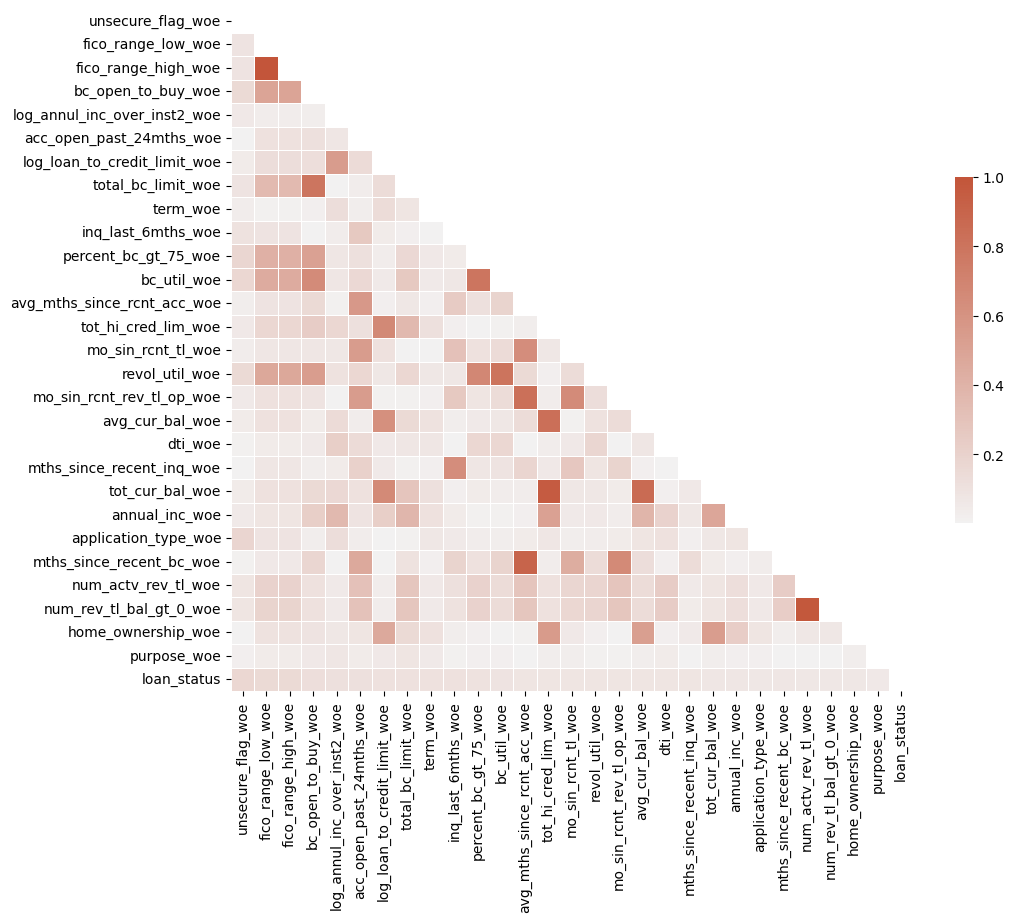

In [37]:
corr = train_woe_iv.corr()
corr = np.abs(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [38]:
train_woe_iv.corr()

unsecure_flag_woe  fico_range_low_woe  \
unsecure_flag_woe                      1.000000            0.090401   
fico_range_low_woe                     0.090401            1.000000   
fico_range_high_woe                    0.090401            1.000000   
bc_open_to_buy_woe                     0.150801            0.500212   
log_annul_inc_over_inst2_woe           0.056345            0.033471   
acc_open_past_24mths_woe               0.001748            0.103628   
log_loan_to_credit_limit_woe           0.042109            0.133275   
total_bc_limit_woe                     0.093566            0.354850   
term_woe                               0.038865           -0.010038   
inq_last_6mths_woe                     0.095786            0.093478   
percent_bc_gt_75_woe                   0.179643            0.419837   
bc_util_woe                            0.166974            0.447198   
avg_mths_since_rcnt_acc_woe            0.026930            0.089163   
tot_hi_cred_lim_woe                    0.060066            0.166332   
mo_sin_rcnt_tl_woe                     0.034856            0.073500   
revol_util_woe                         0.153633            0.473653   
mo_sin_rcnt_rev_tl_op_woe              0.054208            0.104164   
avg_cur_bal_woe                        0.039609            0.105159   
dti_woe                               -0.012486            0.046498   
mths_since_recent_inq_woe              0.007816            0.073601   
tot_cur_bal_woe                        0.044781            0.107766   
annual_inc_woe                         0.049623            0.082265   
application_type_woe                   0.186714            0.088329   
mths_since_recent_bc_woe               0.011743            0.060875   
num_actv_rev_tl_woe                    0.080609            0.196100   
num_rev_tl_bal_gt_0_woe                0.082666            0.190725   
home_ownership_woe                     0.001681            0.099893   
purpose_woe                            0.023778            0.040367   
loan_status                            0.165182            0.149816   

                              fico_range_high_woe  bc_open_to_buy_woe  \
unsecure_flag_woe                        0.090401            0.150801   
fico_range_low_woe                       1.000000            0.500212   
fico_range_high_woe                      1.000000            0.500212   
bc_open_to_buy_woe                       0.500212            1.000000   
log_annul_inc_over_inst2_woe             0.033471            0.025394   
acc_open_past_24mths_woe                 0.103628           -0.111968   
log_loan_to_credit_limit_woe             0.133275            0.120256   
total_bc_limit_woe                       0.354850            0.789836   
term_woe                                -0.010038           -0.023155   
inq_last_6mths_woe                       0.093478           -0.006647   
percent_bc_gt_75_woe                     0.419837            0.510996   
bc_util_woe                              0.447198            0.654389   
avg_mths_since_rcnt_acc_woe              0.089163           -0.150733   
tot_hi_cred_lim_woe                      0.166332            0.235799   
mo_sin_rcnt_tl_woe                       0.073500           -0.074140   
revol_util_woe                           0.473653            0.535714   
mo_sin_rcnt_rev_tl_op_woe                0.104164           -0.087265   
avg_cur_bal_woe                          0.105159            0.046955   
dti_woe                                  0.046498            0.048151   
mths_since_recent_inq_woe                0.073601           -0.028284   
tot_cur_bal_woe                          0.107766            0.155553   
annual_inc_woe                           0.082265            0.222361   
application_type_woe                     0.088329            0.025995   
mths_since_recent_bc_woe                 0.060875           -0.174174   
num_actv_rev_tl_woe                      0.196100           -0.102246   
n

### `fico_range_high_woe` & `fico_range_low_woe`

In [39]:
corr.loc[["loan_status","fico_range_high_woe","fico_range_low_woe"],["fico_range_high_woe", "fico_range_low_woe"]]

fico_range_high_woe  fico_range_low_woe
loan_status                     0.149816            0.149816
fico_range_high_woe             1.000000            1.000000
fico_range_low_woe              1.000000            1.000000

In [40]:
train_woe_iv.drop(columns="fico_range_low_woe", inplace=True)
test_woe_iv.drop(columns="fico_range_low_woe", inplace=True)

### `bc_open_to_buy_woe` vs `total_bc_limit_woe`

In [41]:
corr.loc[["loan_status","bc_open_to_buy_woe","total_bc_limit_woe"],["bc_open_to_buy_woe", "total_bc_limit_woe"]]

bc_open_to_buy_woe  total_bc_limit_woe
loan_status                   0.120588            0.102324
bc_open_to_buy_woe            1.000000            0.789836
total_bc_limit_woe            0.789836            1.000000

In [42]:
train_woe_iv.drop(columns="total_bc_limit_woe", inplace=True)
test_woe_iv.drop(columns="total_bc_limit_woe", inplace=True)

### `percent_bc_gt_75_woe` vs `bc_util_woe`

In [43]:
corr.loc[["loan_status","percent_bc_gt_75_woe","bc_util_woe"],["percent_bc_gt_75_woe", "bc_util_woe"]]

percent_bc_gt_75_woe  bc_util_woe
loan_status                       0.097495     0.091312
percent_bc_gt_75_woe              1.000000     0.790667
bc_util_woe                       0.790667     1.000000

In [44]:
train_woe_iv.drop(columns="bc_util_woe", inplace=True)
test_woe_iv.drop(columns="bc_util_woe", inplace=True)

### `avg_mths_since_rcnt_acc_woe` & `mo_sin_rcnt_rev_tl_op_woe` & `mths_since_recent_bc_woe`

In [45]:
corr.loc[["loan_status","avg_mths_since_rcnt_acc_woe","mo_sin_rcnt_rev_tl_op_woe", "mths_since_recent_bc_woe"],["avg_mths_since_rcnt_acc_woe", "mo_sin_rcnt_rev_tl_op_woe", "mths_since_recent_bc_woe"]]

avg_mths_since_rcnt_acc_woe  \
loan_status                                     0.086283   
avg_mths_since_rcnt_acc_woe                     1.000000   
mo_sin_rcnt_rev_tl_op_woe                       0.822468   
mths_since_recent_bc_woe                        0.906133   

                             mo_sin_rcnt_rev_tl_op_woe  \
loan_status                                   0.083040   
avg_mths_since_rcnt_acc_woe                   0.822468   
mo_sin_rcnt_rev_tl_op_woe                     1.000000   
mths_since_recent_bc_woe                      0.657275   

                             mths_since_recent_bc_woe  
loan_status                                  0.071584  
avg_mths_since_rcnt_acc_woe                  0.906133  
mo_sin_rcnt_rev_tl_op_woe                    0.657275  
mths_since_recent_bc_woe                     1.000000

In [46]:
train_woe_iv.drop(columns="mo_sin_rcnt_rev_tl_op_woe", inplace=True)
test_woe_iv.drop(columns="mo_sin_rcnt_rev_tl_op_woe", inplace=True)
train_woe_iv.drop(columns="mths_since_recent_bc_woe", inplace=True)
test_woe_iv.drop(columns="mths_since_recent_bc_woe", inplace=True)

### `tot_hi_cred_lim_woe` & `tot_cur_bal_woe` & `avg_cur_bal_woe`

In [47]:
corr.loc[["loan_status","tot_hi_cred_lim_woe","tot_cur_bal_woe", "avg_cur_bal_woe"],["tot_hi_cred_lim_woe", "tot_cur_bal_woe", "avg_cur_bal_woe"]]

tot_hi_cred_lim_woe  tot_cur_bal_woe  avg_cur_bal_woe
loan_status                     0.085334         0.073364         0.080665
tot_hi_cred_lim_woe             1.000000         0.959823         0.828484
tot_cur_bal_woe                 0.959823         1.000000         0.853103
avg_cur_bal_woe                 0.828484         0.853103         1.000000

In [48]:
train_woe_iv.drop(columns="tot_cur_bal_woe", inplace=True)
test_woe_iv.drop(columns="tot_cur_bal_woe", inplace=True)
train_woe_iv.drop(columns="avg_cur_bal_woe", inplace=True)
test_woe_iv.drop(columns="avg_cur_bal_woe", inplace=True)

### `num_rev_tl_bal_gt_0_woe` vs `num_actv_rev_tl_woe`

In [49]:
corr.loc[["loan_status","num_rev_tl_bal_gt_0_woe","num_actv_rev_tl_woe"],["num_rev_tl_bal_gt_0_woe", "num_actv_rev_tl_woe"]]

num_rev_tl_bal_gt_0_woe  num_actv_rev_tl_woe
loan_status                             0.065567             0.067509
num_rev_tl_bal_gt_0_woe                 1.000000             0.977763
num_actv_rev_tl_woe                     0.977763             1.000000

In [50]:
train_woe_iv.drop(columns="num_rev_tl_bal_gt_0_woe", inplace=True)
test_woe_iv.drop(columns="num_rev_tl_bal_gt_0_woe", inplace=True)

# Part 3 Final Correlation Check

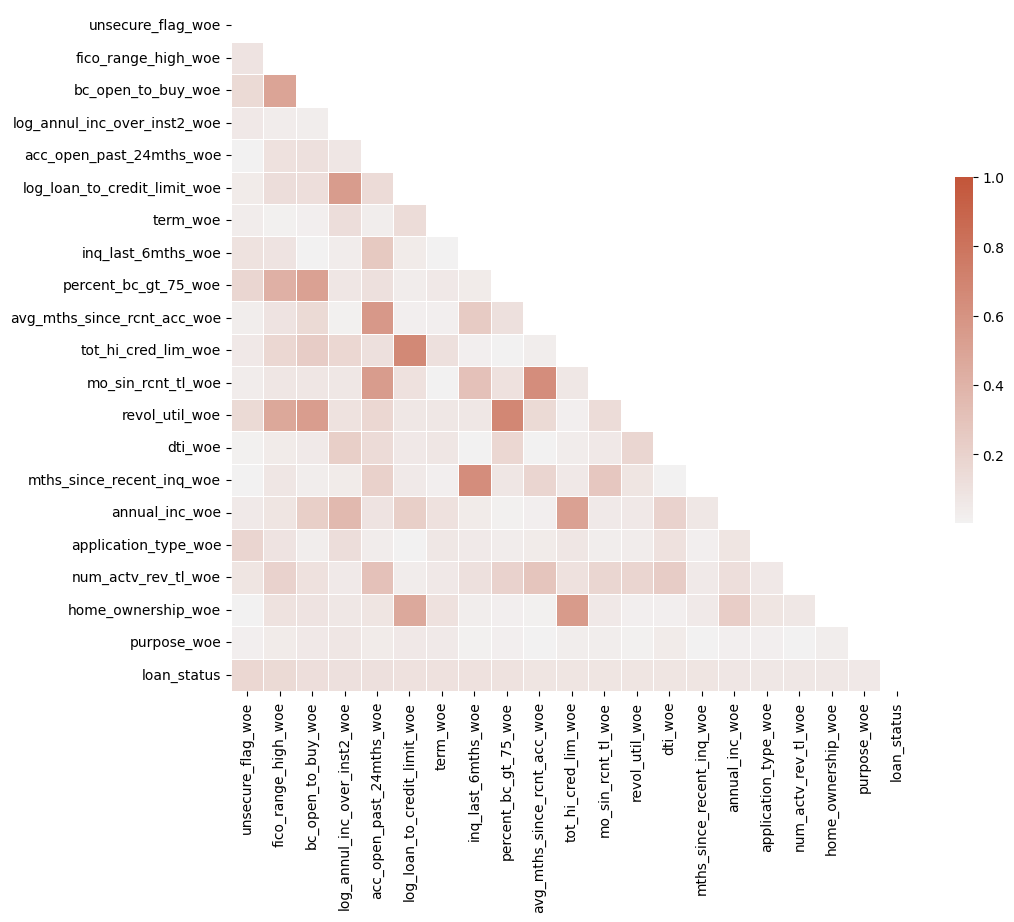

In [51]:
corr = train_woe_iv.corr()
corr = np.abs(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [56]:
corr

unsecure_flag_woe  fico_range_high_woe  \
unsecure_flag_woe                      1.000000             0.090401   
fico_range_high_woe                    0.090401             1.000000   
bc_open_to_buy_woe                     0.150801             0.500212   
log_annul_inc_over_inst2_woe           0.056345             0.033471   
acc_open_past_24mths_woe               0.001748             0.103628   
log_loan_to_credit_limit_woe           0.042109             0.133275   
term_woe                               0.038865             0.010038   
inq_last_6mths_woe                     0.095786             0.093478   
percent_bc_gt_75_woe                   0.179643             0.419837   
avg_mths_since_rcnt_acc_woe            0.026930             0.089163   
tot_hi_cred_lim_woe                    0.060066             0.166332   
mo_sin_rcnt_tl_woe                     0.034856             0.073500   
revol_util_woe                         0.153633             0.473653   
dti_woe                                0.012486             0.046498   
mths_since_recent_inq_woe              0.007816             0.073601   
annual_inc_woe                         0.049623             0.082265   
application_type_woe                   0.186714             0.088329   
num_actv_rev_tl_woe                    0.080609             0.196100   
home_ownership_woe                     0.001681             0.099893   
purpose_woe                            0.023778             0.040367   
loan_status                            0.165182             0.149816   

                              bc_open_to_buy_woe  \
unsecure_flag_woe                       0.150801   
fico_range_high_woe                     0.500212   
bc_open_to_buy_woe                      1.000000   
log_annul_inc_over_inst2_woe            0.025394   
acc_open_past_24mths_woe                0.111968   
log_loan_to_credit_limit_woe            0.120256   
term_woe                                0.023155   
inq_last_6mths_woe                      0.006647   
percent_bc_gt_75_woe                    0.510996   
avg_mths_since_rcnt_acc_woe             0.150733   
tot_hi_cred_lim_woe                     0.235799   
mo_sin_rcnt_tl_woe                      0.074140   
revol_util_woe                          0.535714   
dti_woe                                 0.048151   
mths_since_recent_inq_woe               0.028284   
annual_inc_woe                          0.222361   
application_type_woe                    0.025995   
num_actv_rev_tl_woe                     0.102246   
home_ownership_woe                      0.091877   
purpose_woe                             0.061878   
loan_status                             0.120588   

                              log_annul_inc_over_inst2_woe  \
unsecure_flag_woe                                 0.056345   
fico_range_high_woe                               0.033471   
bc_open_to_buy_woe                                0.025394   
log_annul_inc_over_inst2_woe                      1.000000   
acc_open_past_24mths_woe                          0.072620   
log_loan_to_credit_limit_woe                      0.541364   
term_woe                                          0.127091   
inq_last_6mths_woe                                0.037083   
percent_bc_gt_75_woe                              0.075680   
avg_mths_since_rcnt_acc_woe                       0.013283   
tot_hi_cred_lim_woe                               0.166722   
mo_sin_rcnt_tl_woe                                0.066451   
revol_util_woe                                    0.095812   
dti_woe                                           0.226092   
mths_since_recent_inq_woe                         0.042062   
annual_inc_woe                                    0.365625   
application_type_woe                              0.131231   
num_actv_rev_tl_woe                               0.048618   
home_ownership_woe                                0.064087   
purpose_woe                                       0.072861  

# Q2 WoE, IV, and Correlation Filter Complete

In [57]:
pickle.dump(train_woe_iv, open('Q2_train_woe_iv_cf.pkl', 'wb'))
pickle.dump(test_woe_iv, open('Q2_test_woe_iv_cf.pkl', 'wb'))

In [ ]:
pickle.dump(train_woe_iv, open('Q2.pkl', 'wb'))
pickle.dump(test_woe_iv, open('Q2.pkl', 'wb'))